## Forecast Gold Prices

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('white')
%matplotlib inline
from xgboost import XGBRegressor
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [6]:
# Read Data Set
df=pd.read_csv("C:/Users/tusha/Downloads/Gold_data.csv")
df.head()

date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75

In [7]:
df.tail()

date   price
2177  2021-12-17  4394.4
2178  2021-12-18  4389.5
2179  2021-12-19  4389.5
2180  2021-12-20  4354.1
2181  2021-12-21  4346.5

* # <font color = 'blue'> <u> Exploratory Data Analysis </u>

* ## <font color ='Green'> <u> Data Summary </u>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

date     0
price    0
dtype: int64

* ## <font color ='Green'> <u> Descriptive Statistics </u>

In [11]:
df.describe().T

count         mean         std     min      25%     50%       75%  \
price  2182.0  3284.450046  719.564434  2252.6  2697.02  2879.8  4147.325   

          max  
price  4966.3

* ##### Here we have the Price data of Gold from 2016 to 2021 on Date basis.
* ##### There are total 2182 records. 
* ##### There are No missing value.
* ##### There are No duplicat value.
* ##### Mean Price for this six years period is 3284.45

In [12]:
### changing data-type of date column
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


* ## <font color ='Green'> <u> Histogram & Density Plot </u>

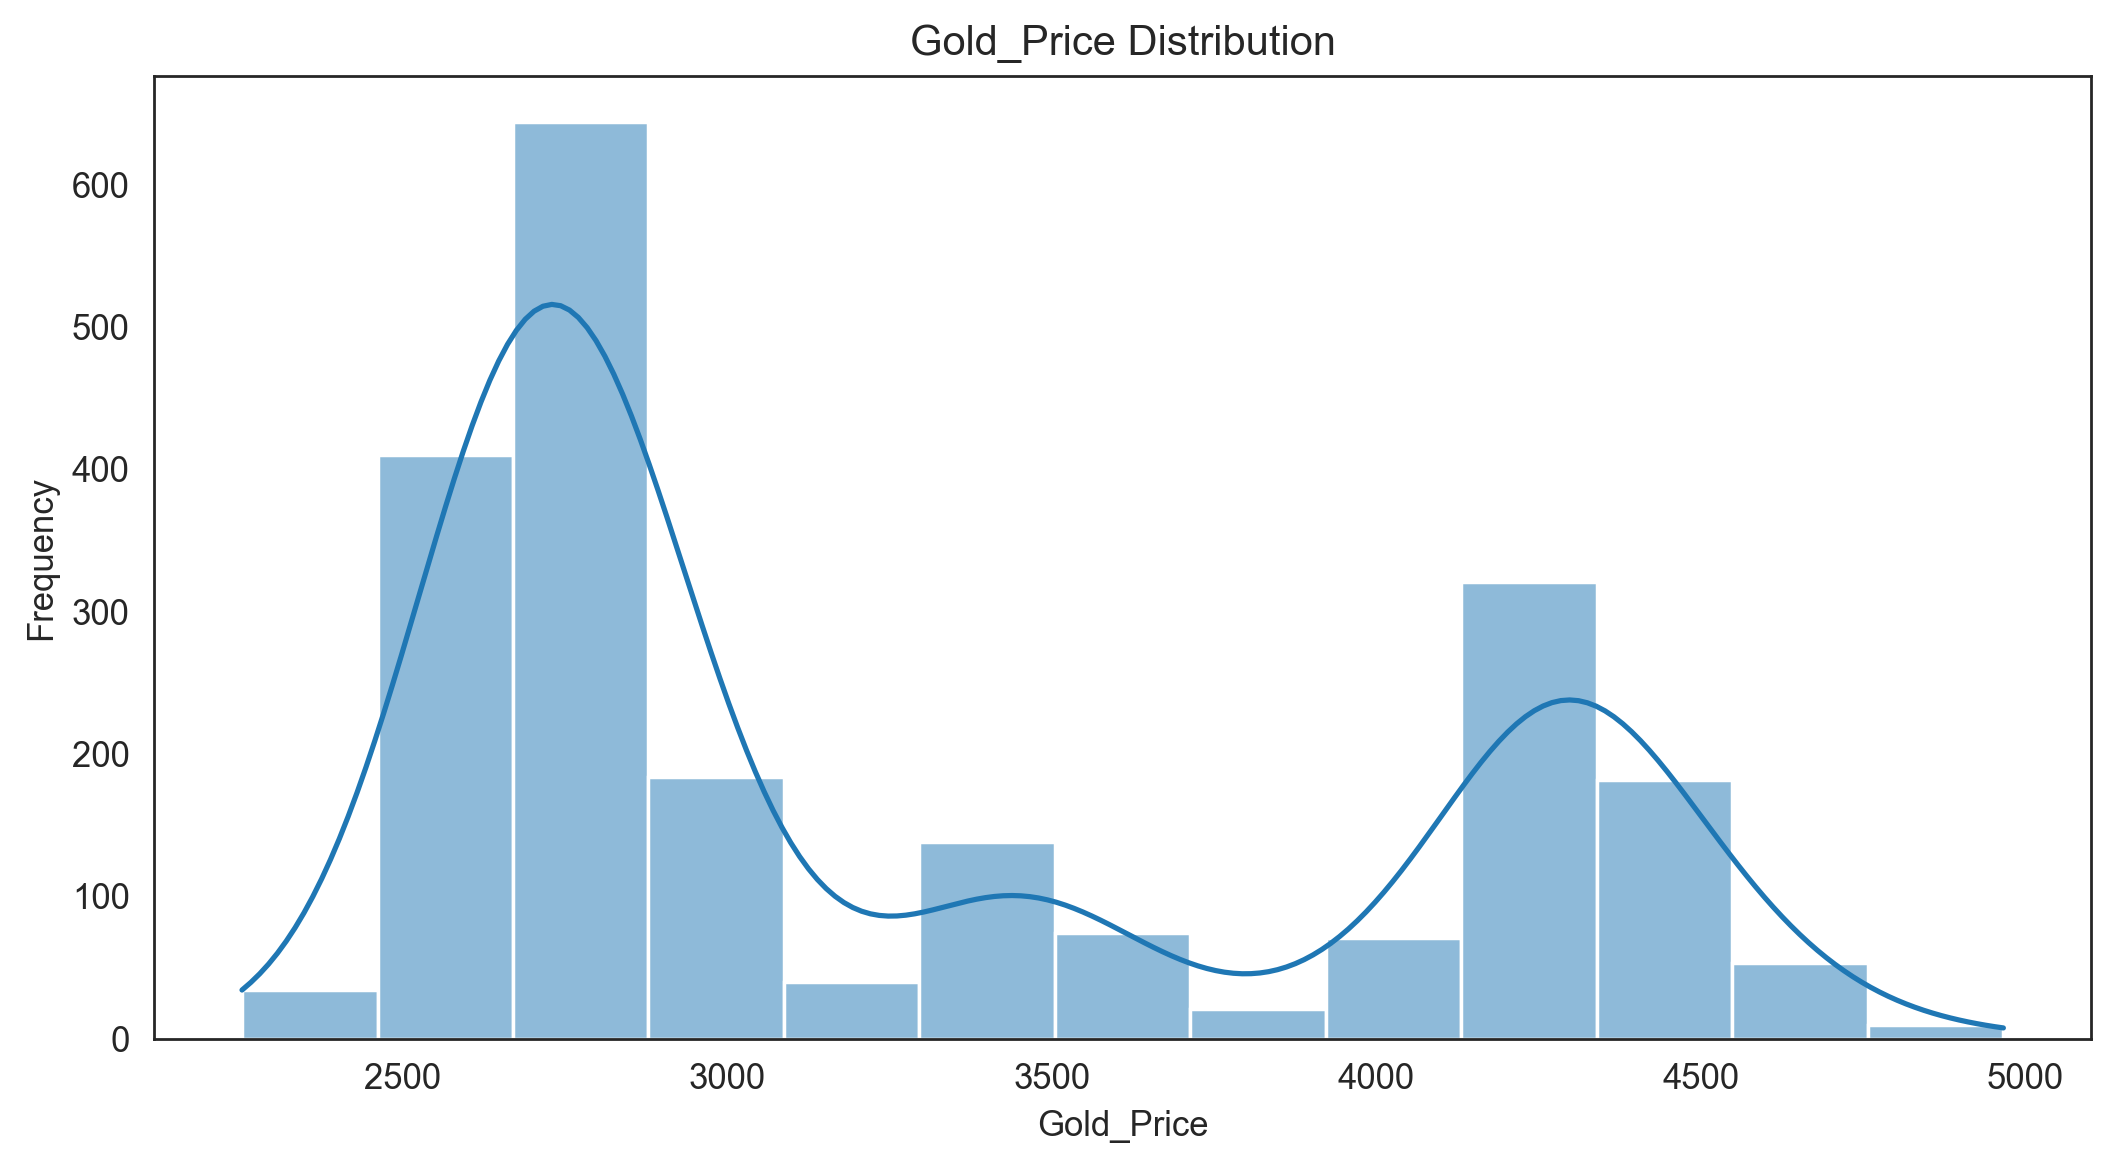

In [13]:
sns.set_style("white") 
sns.histplot(df['price'],kde=True)
plt.title('Gold_Price Distribution')
plt.xlabel('Gold_Price')
plt.ylabel('Frequency')
plt.show()

##### Interpretation:
* ##### The density plot shows two peaks, the data is bimodal — meaning there are two distinct groups of prices (one around 2800 and another around 4300).
* ##### The gold prices in the dataset tend to cluster around two main levels, possibly indicating two different time periods, market conditions, or data segments.

* ##### There might be external factors (e.g. economic changes, policy shifts) causing these distinct price groupings.

* ## <font color ='Green'> <u> Boxplot </u>

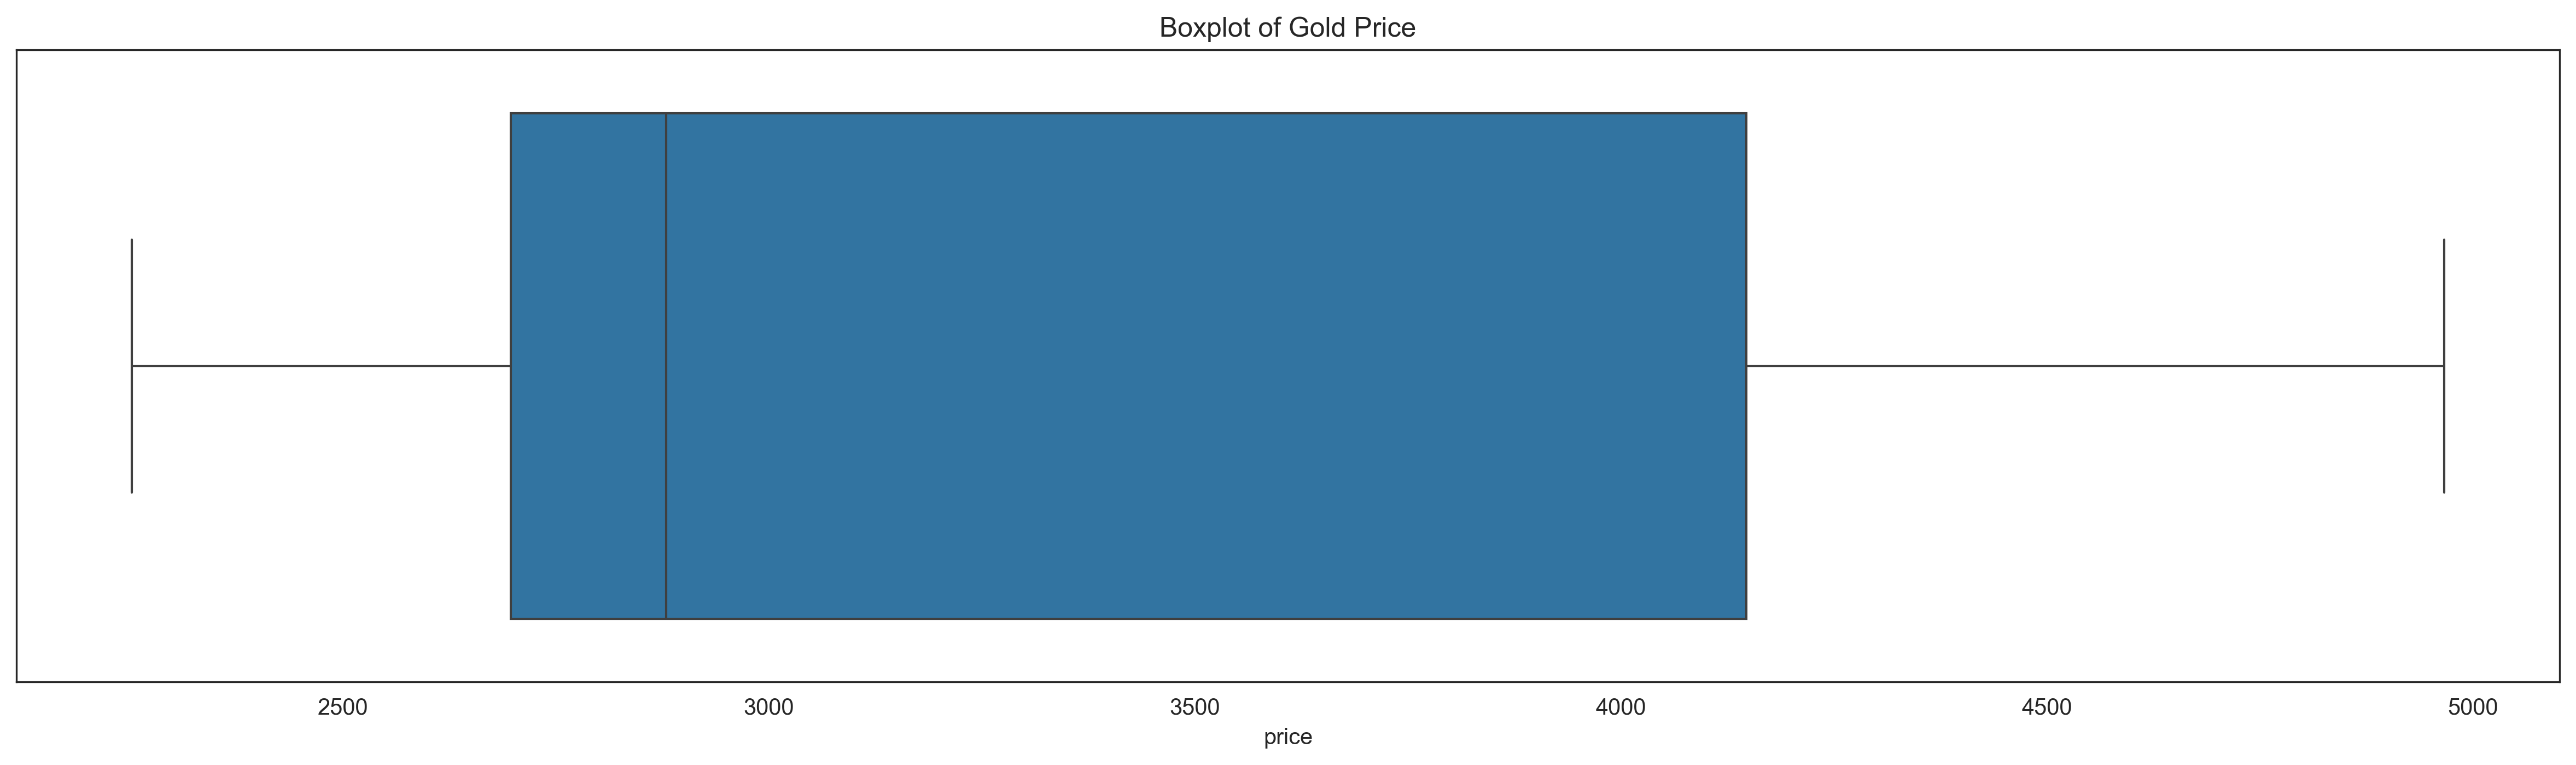

In [14]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300
sns.boxplot(x=df['price'])
sns.set_style("white")
plt.title("Boxplot of Gold Price")
plt.show()

##### Interpretation:
* ##### There is no indication of outliers, as there are no individual points plotted beyond the Box Plot.

* ## <font color ='Green'> <u> Heatmap </u>

In [15]:
# Assuming 'Date' is a datetime column and 'Gold_Price' is the value
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [16]:
# Create pivot table
pivot = df.pivot_table(values='price', index='Month', columns='Year', aggfunc='mean')

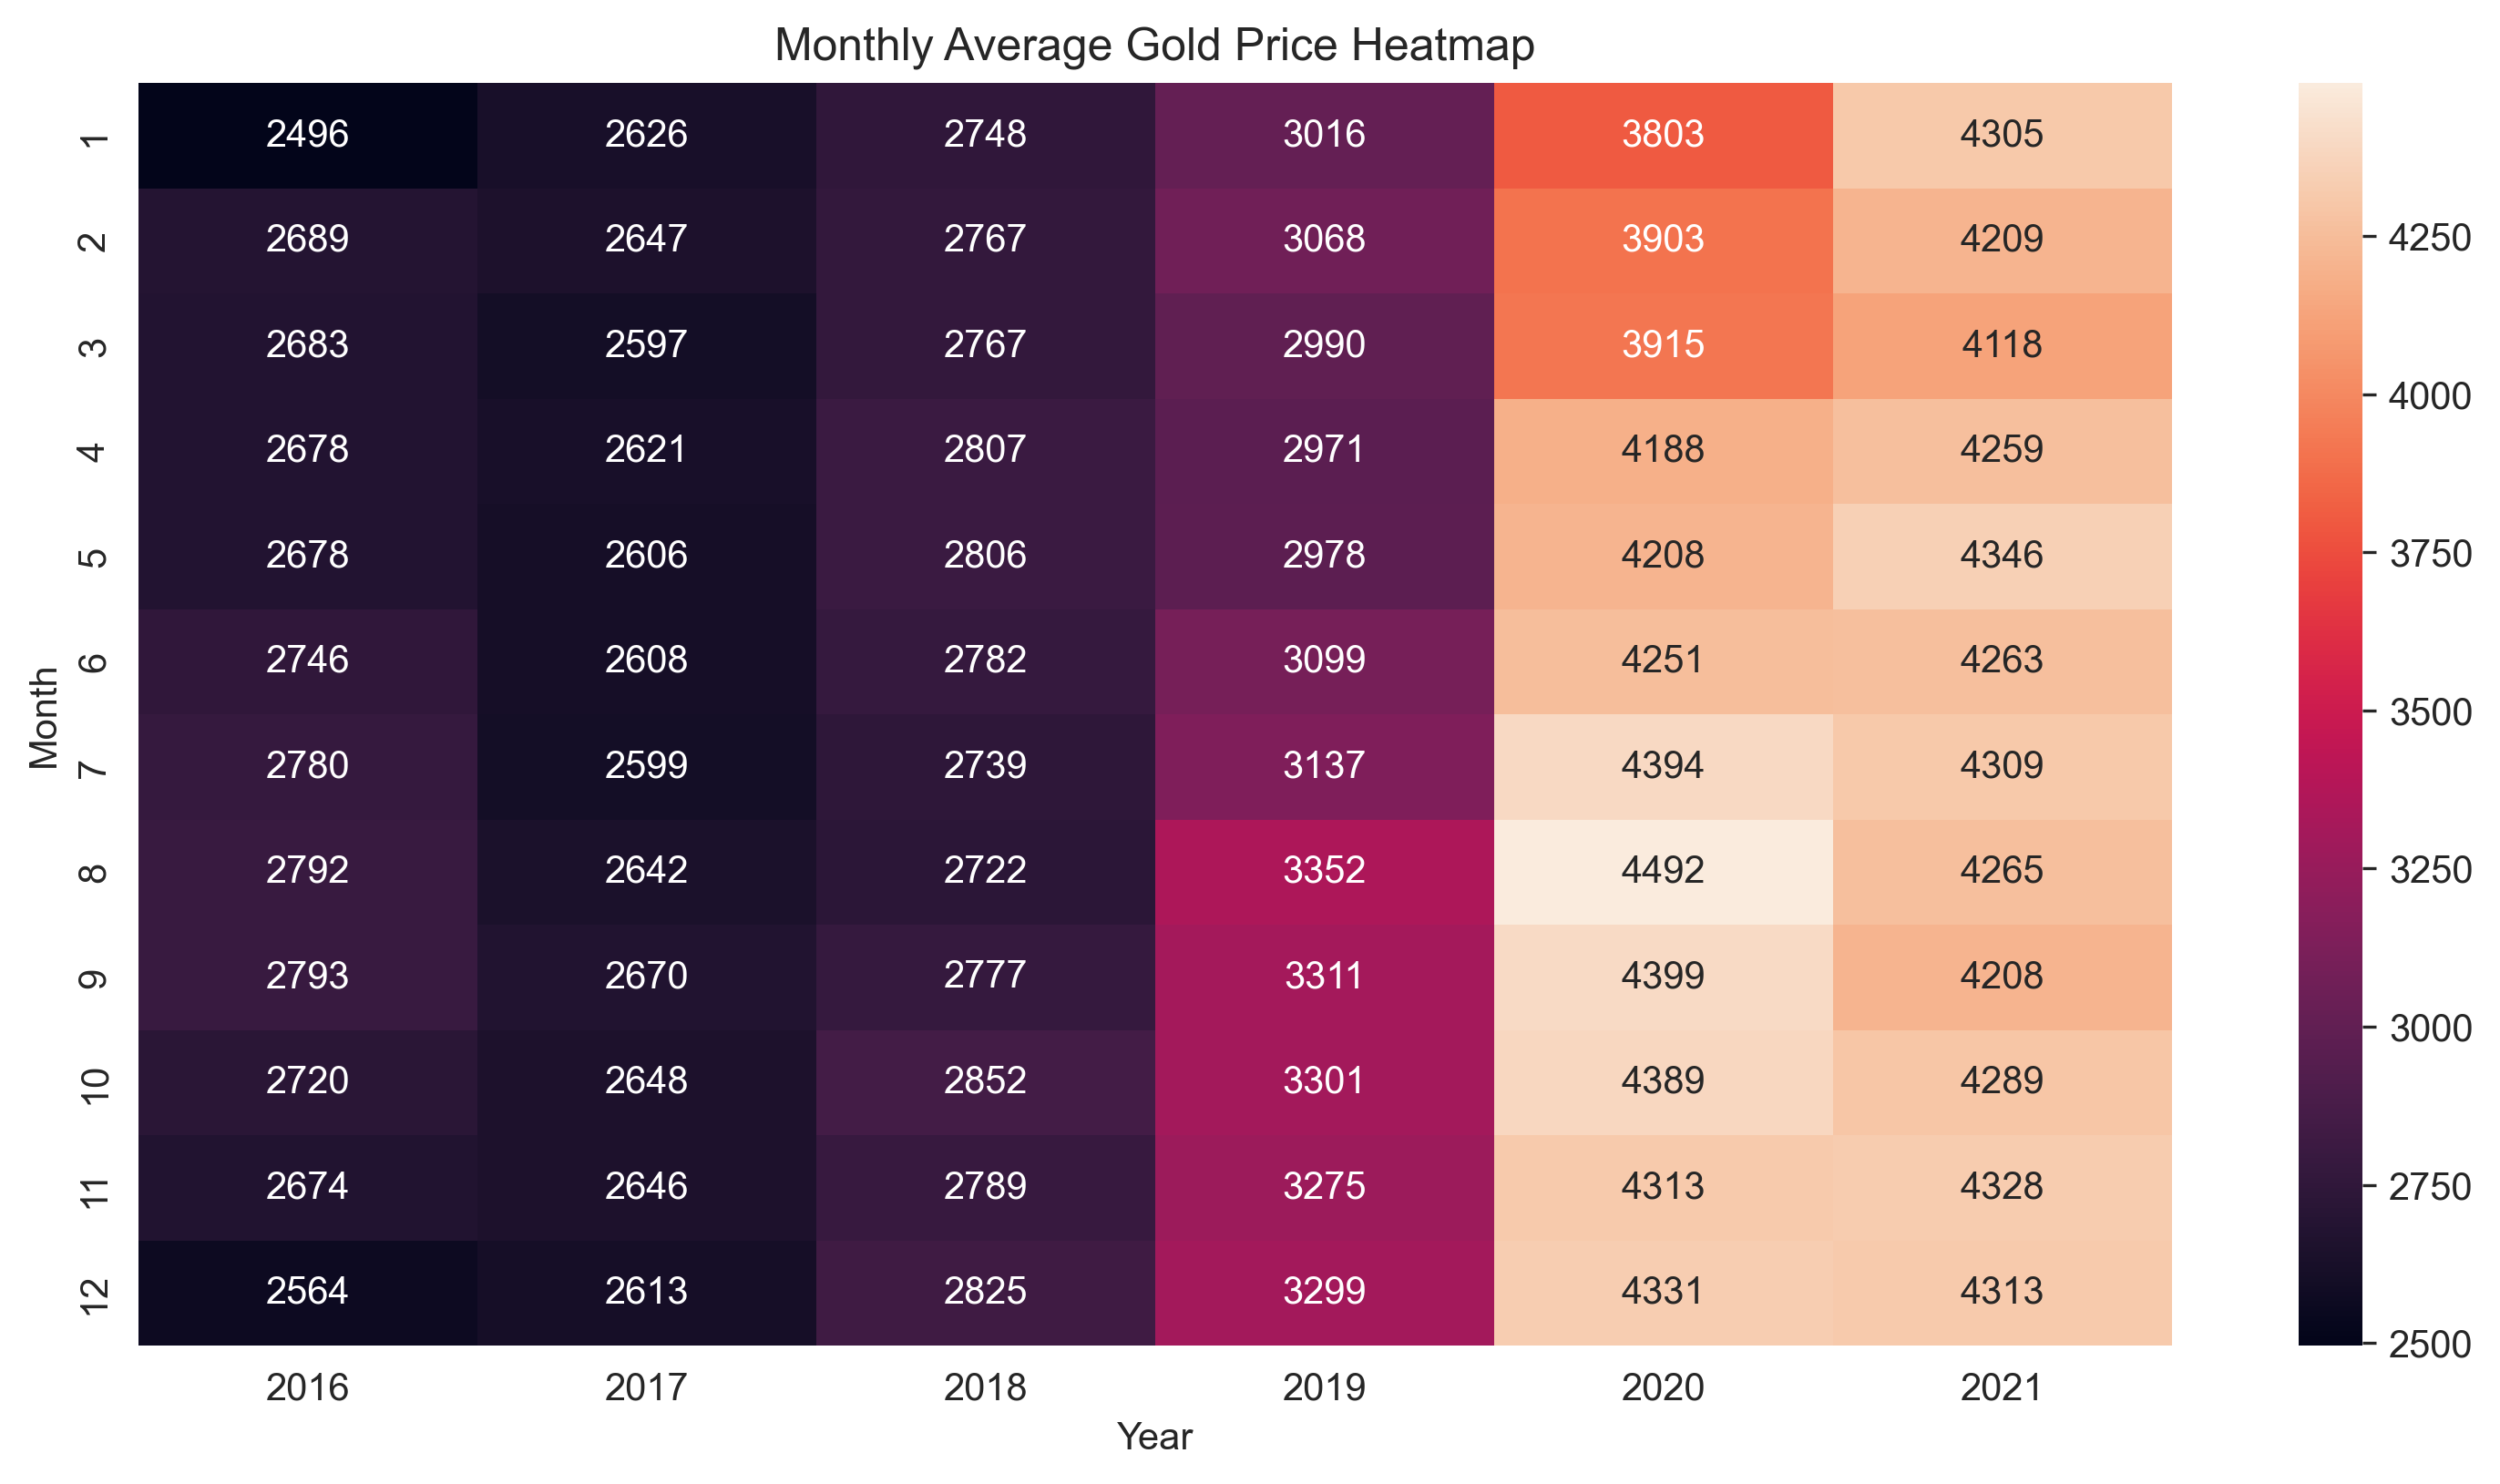

In [17]:
# Plot heatmap
plt.figure(figsize=(12, 6)) 
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Monthly Average Gold Price Heatmap")
plt.show()

#####  Interpretation :
* ##### This heatmap clearly shows a year-over-year increase in average gold prices from 2016 to 2020.
    * ##### The rise is particularly sharp in 2020, likely due to global uncertainty (e.g., COVID-19).
* ##### Some months especially July to October—often show higher prices compared to earlier months like January–March.
    * ##### This could indicate seasonal demand, such as during festivals or weddings in India.

## Resampling

In [18]:
df.set_index('date', inplace=True)
# monthly wise average gold price
monthly_data = df.resample('M').mean()
print(monthly_data.head())
# quarterly wise average gold price
quarterly = df.resample('Q').mean()
print(quarterly.head())

                  price  Month    Year
date                                  
2016-01-31  2495.832258    1.0  2016.0
2016-02-29  2688.703448    2.0  2016.0
2016-03-31  2682.854839    3.0  2016.0
2016-04-30  2677.790000    4.0  2016.0
2016-05-31  2677.650000    5.0  2016.0
                  price     Month    Year
date                                     
2016-03-31  2621.007692   2.00000  2016.0
2016-06-30  2700.096154   5.00000  2016.0
2016-09-30  2788.126630   7.98913  2016.0
2016-12-31  2652.572645  11.00000  2016.0
2017-03-31  2622.654630   2.00000  2017.0


## Check Trend of Data
* ## <font color ='Green'> <u> Line plot (Daily, Monthly, Quarterly) </u>

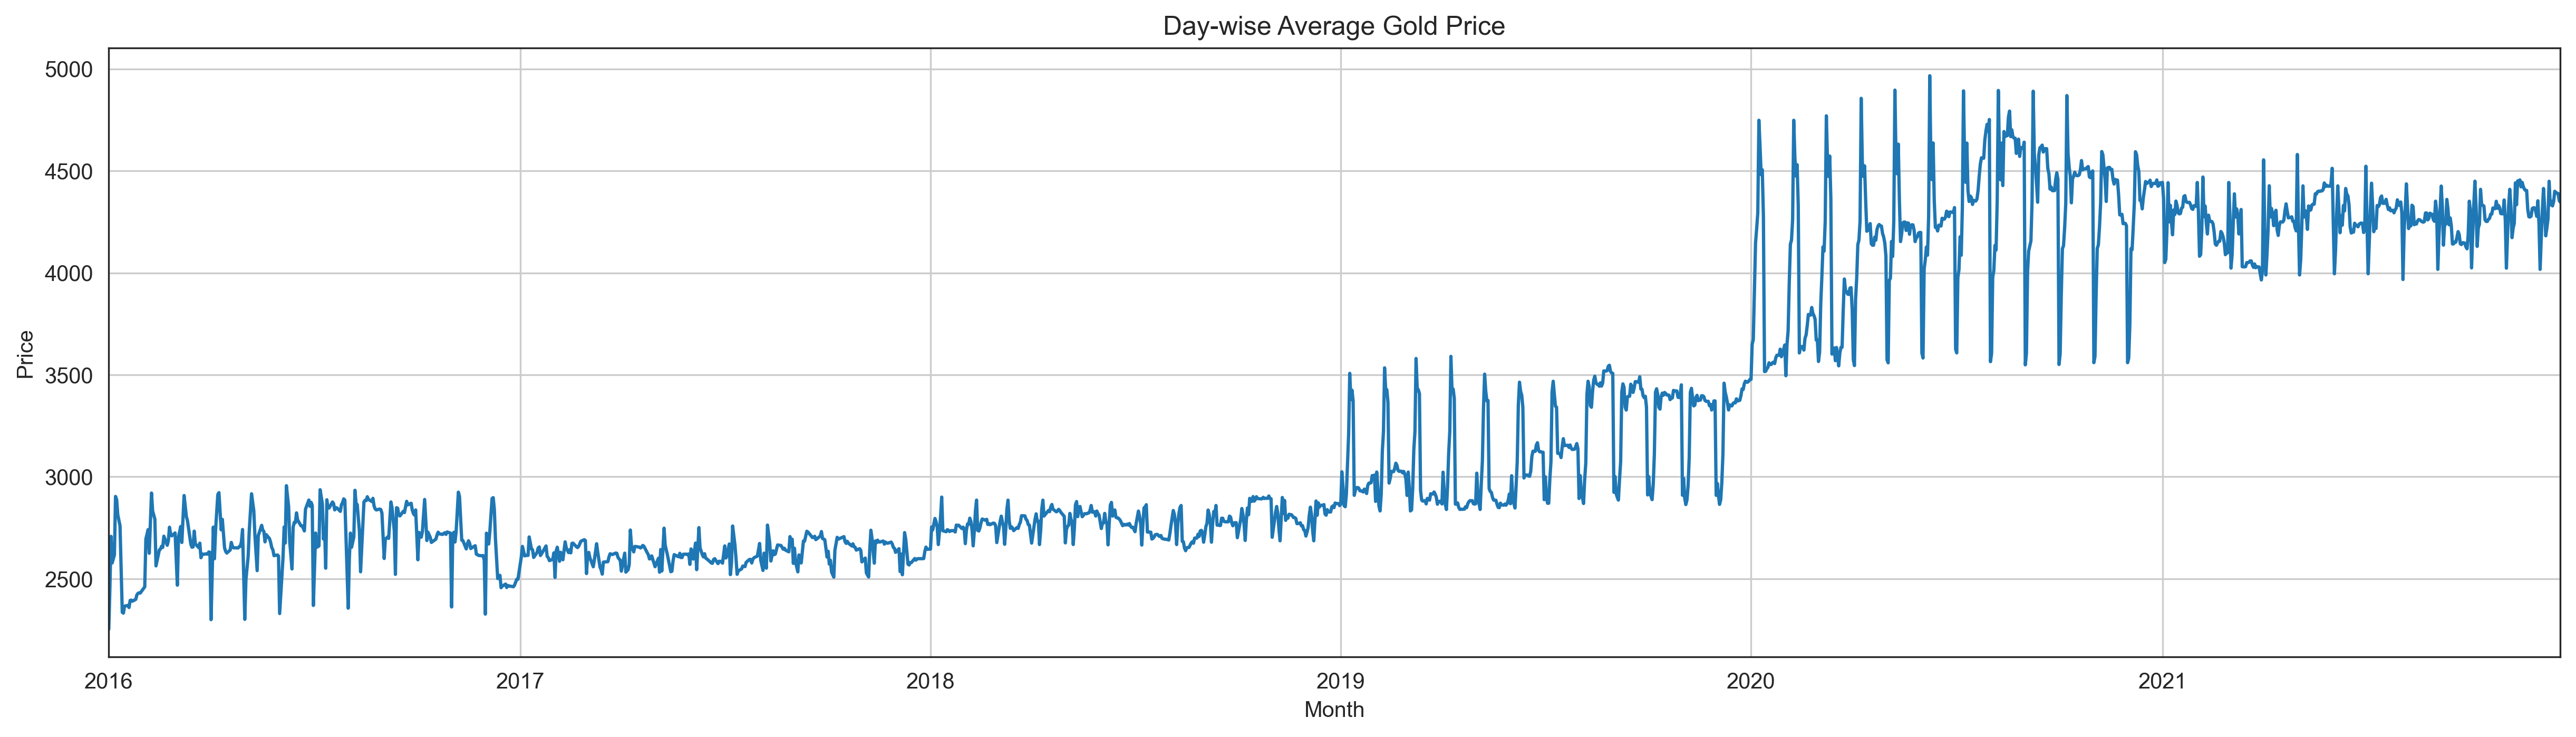

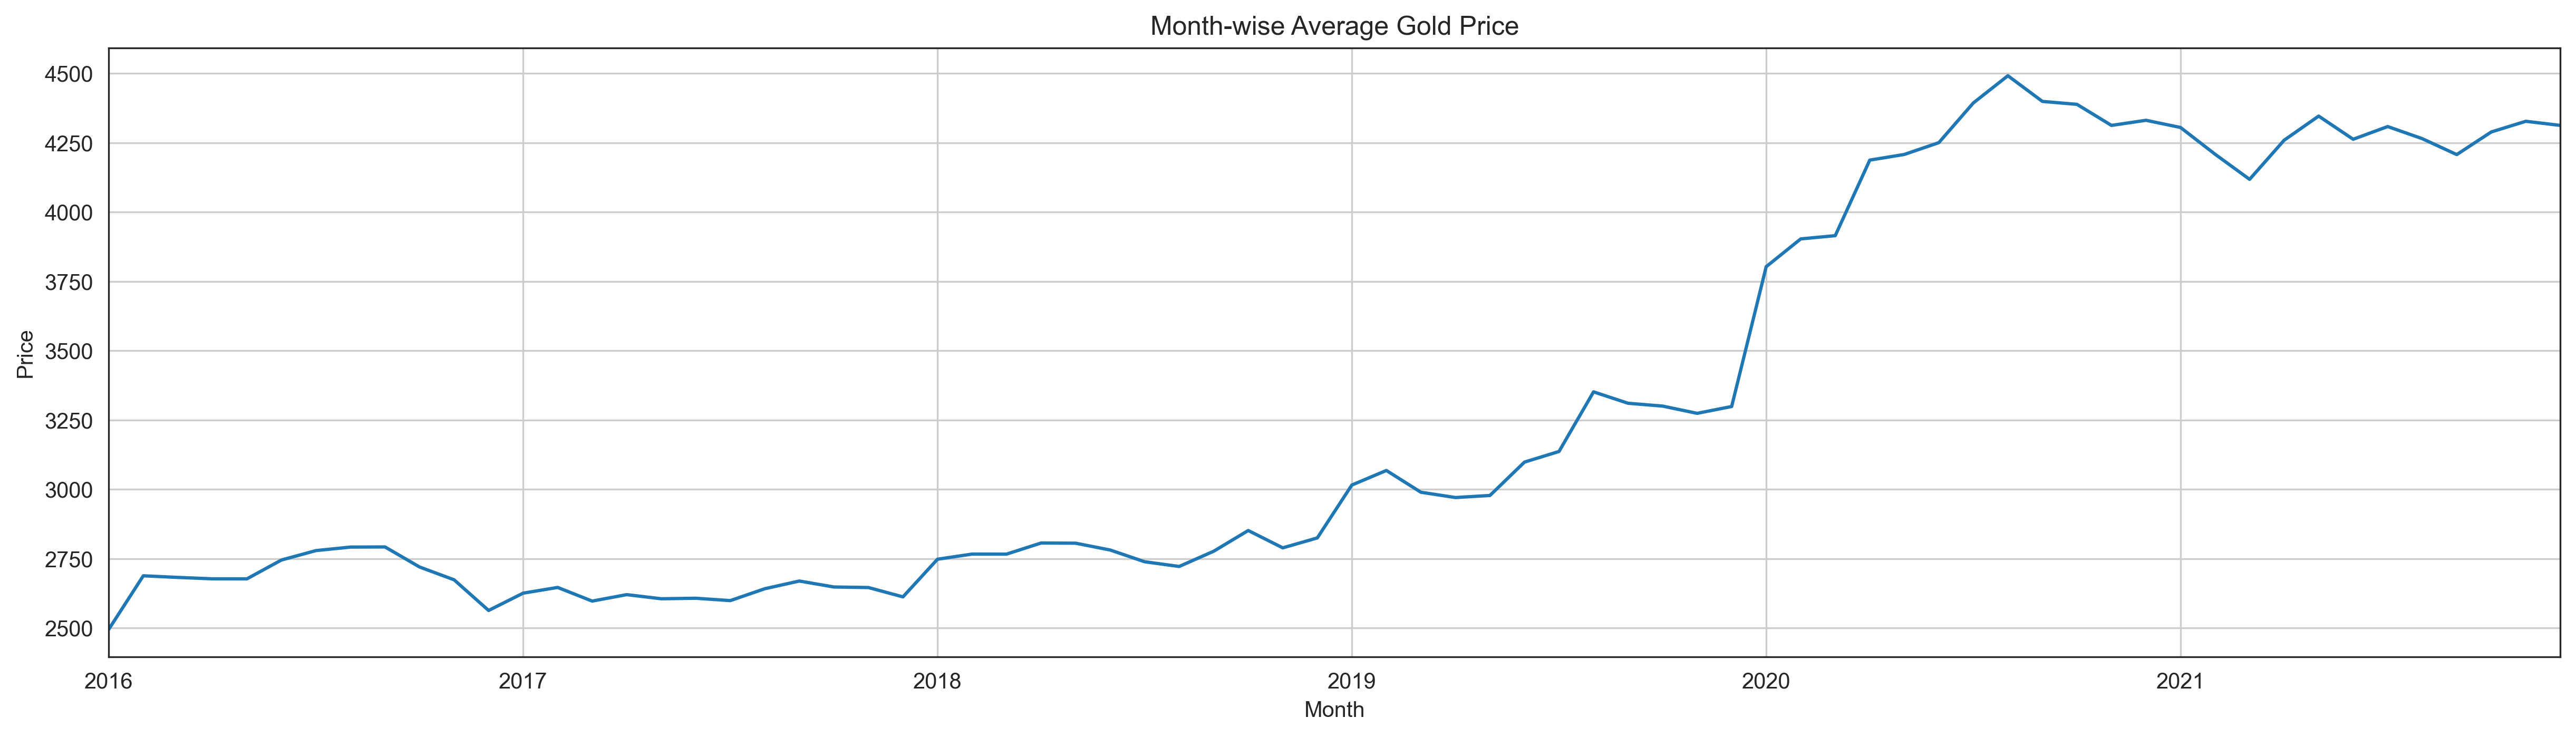

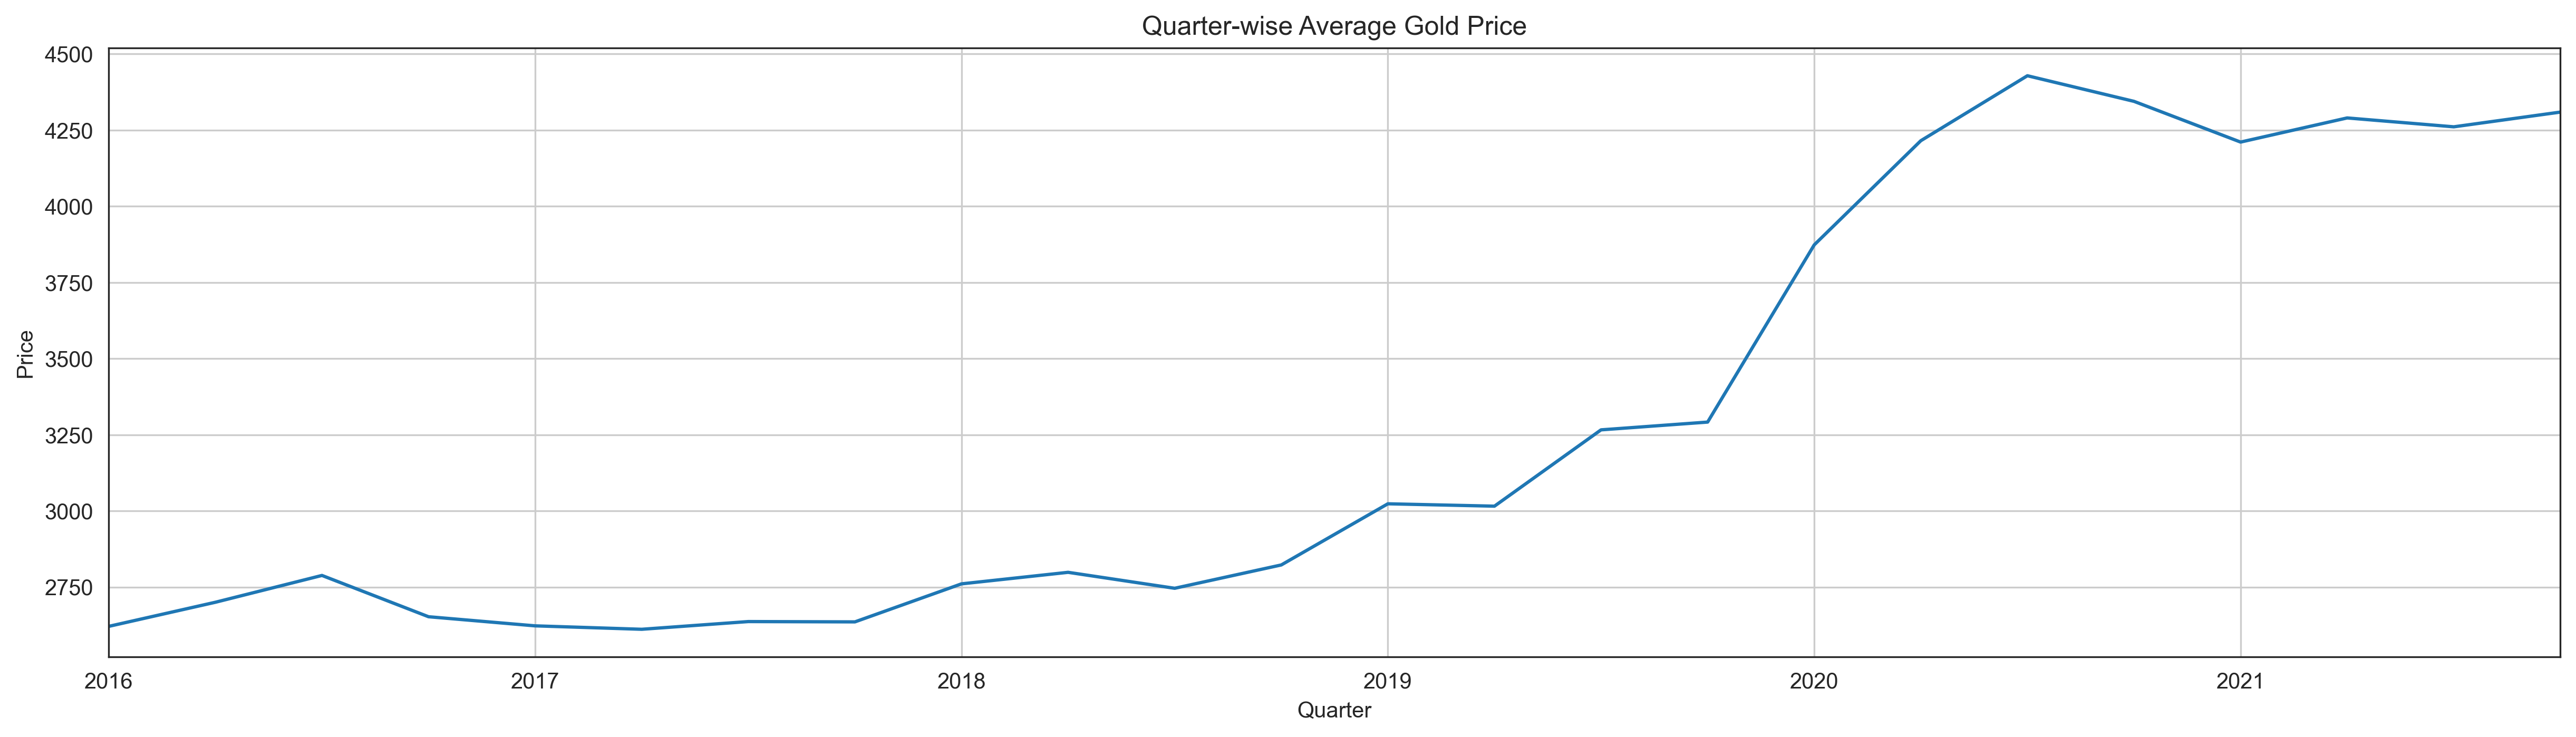

In [19]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300

df['price'].plot()
plt.title('Day-wise Average Gold Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

monthly_data['price'].plot()
plt.title('Month-wise Average Gold Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

quarterly['price'].plot()
plt.title('Quarter-wise Average Gold Price')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()
plt.show()

#### Interpretation :
* ##### This line plot shows the Day-Wise, Month-wise and Quarter-wise average gold price over time from 2016 to 2021.
* ##### This plot shows a strong upward trend in gold prices, especially starting from late 2019, likely influenced by global uncertainties(COVID-19 pandemic).
* #### Non-linear increasing upward trend: 
    * #### The overall direction of the data is upward, but not in a straight line. It could be showing Exponential trends.
* #### Multiplicative seasonality:
    * #### The seasonal fluctuations in the data change in size over time, with the amplitude of the seasonality growing or shrinking in proportion to the trend. In other words, the seasonal effect is not constant; it gets larger or smaller depending on the overall level of the series.

### Lag Plot

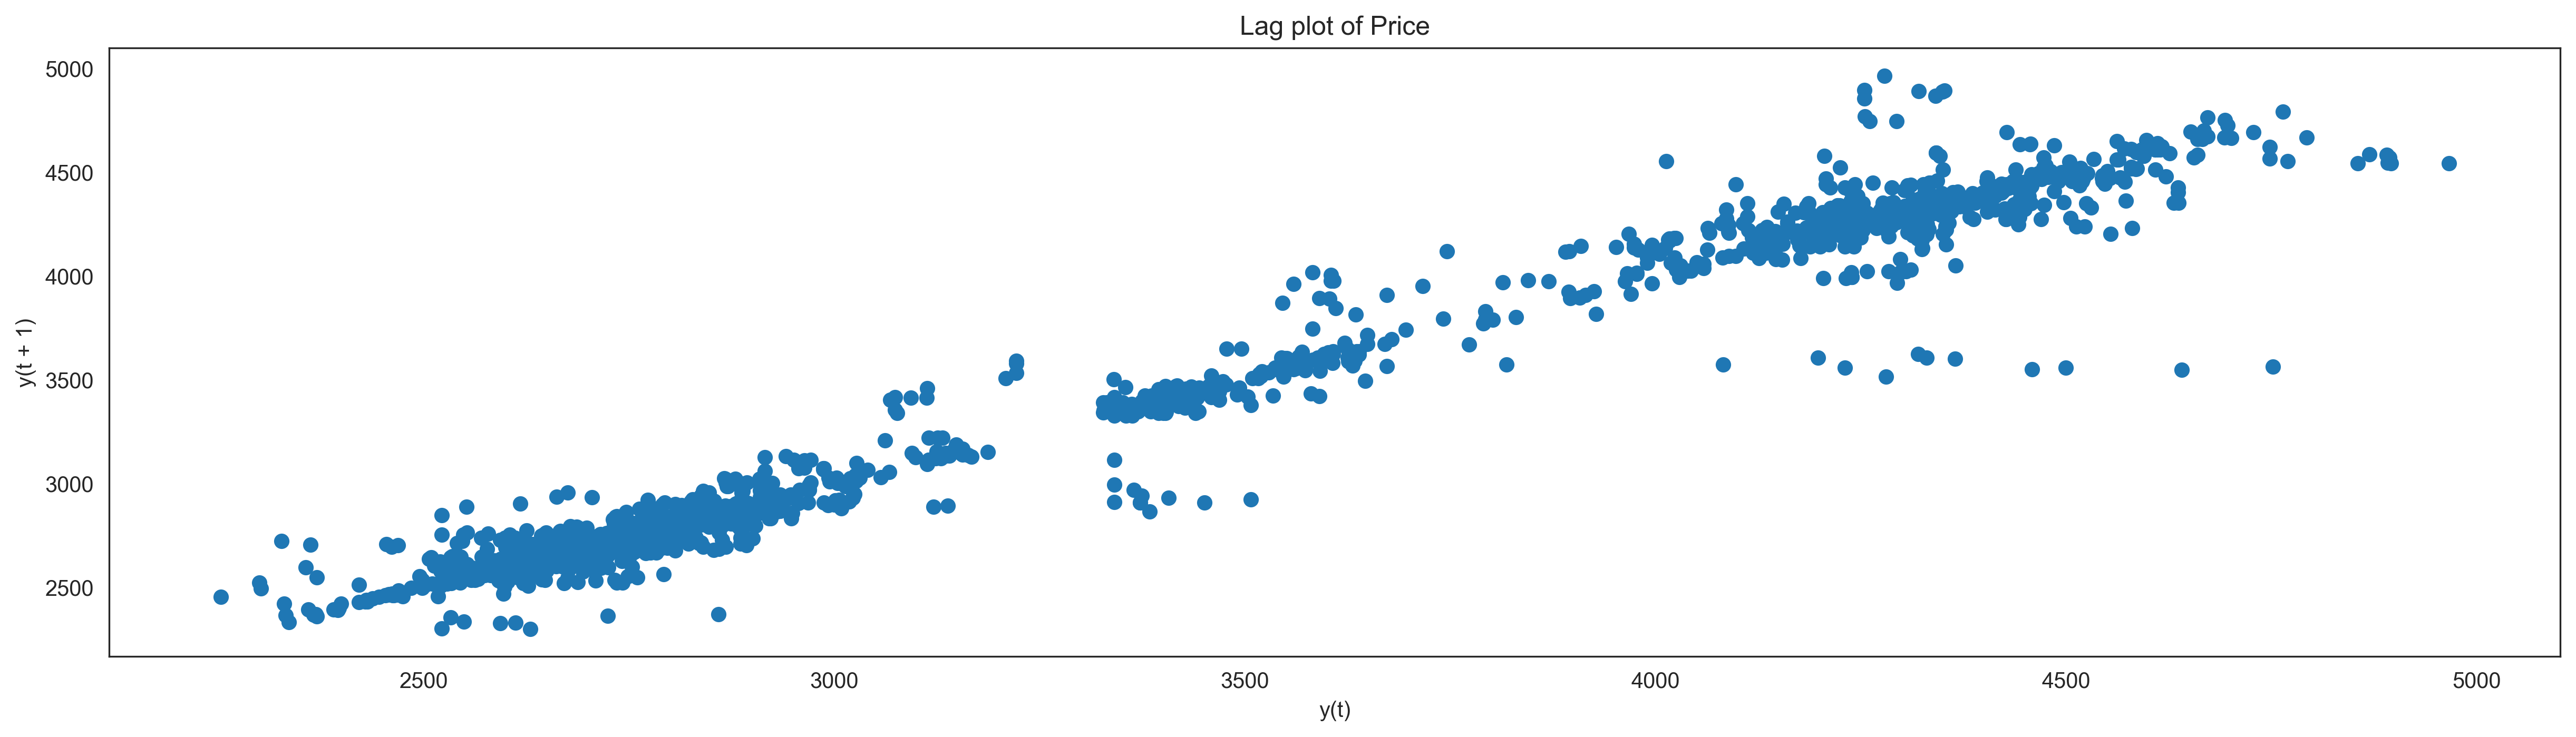

In [20]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300
lag_plot(df['price'])
plt.title("Lag plot of Price")
plt.show()

### Plot Autocorrelation & Partial Autocorrelation

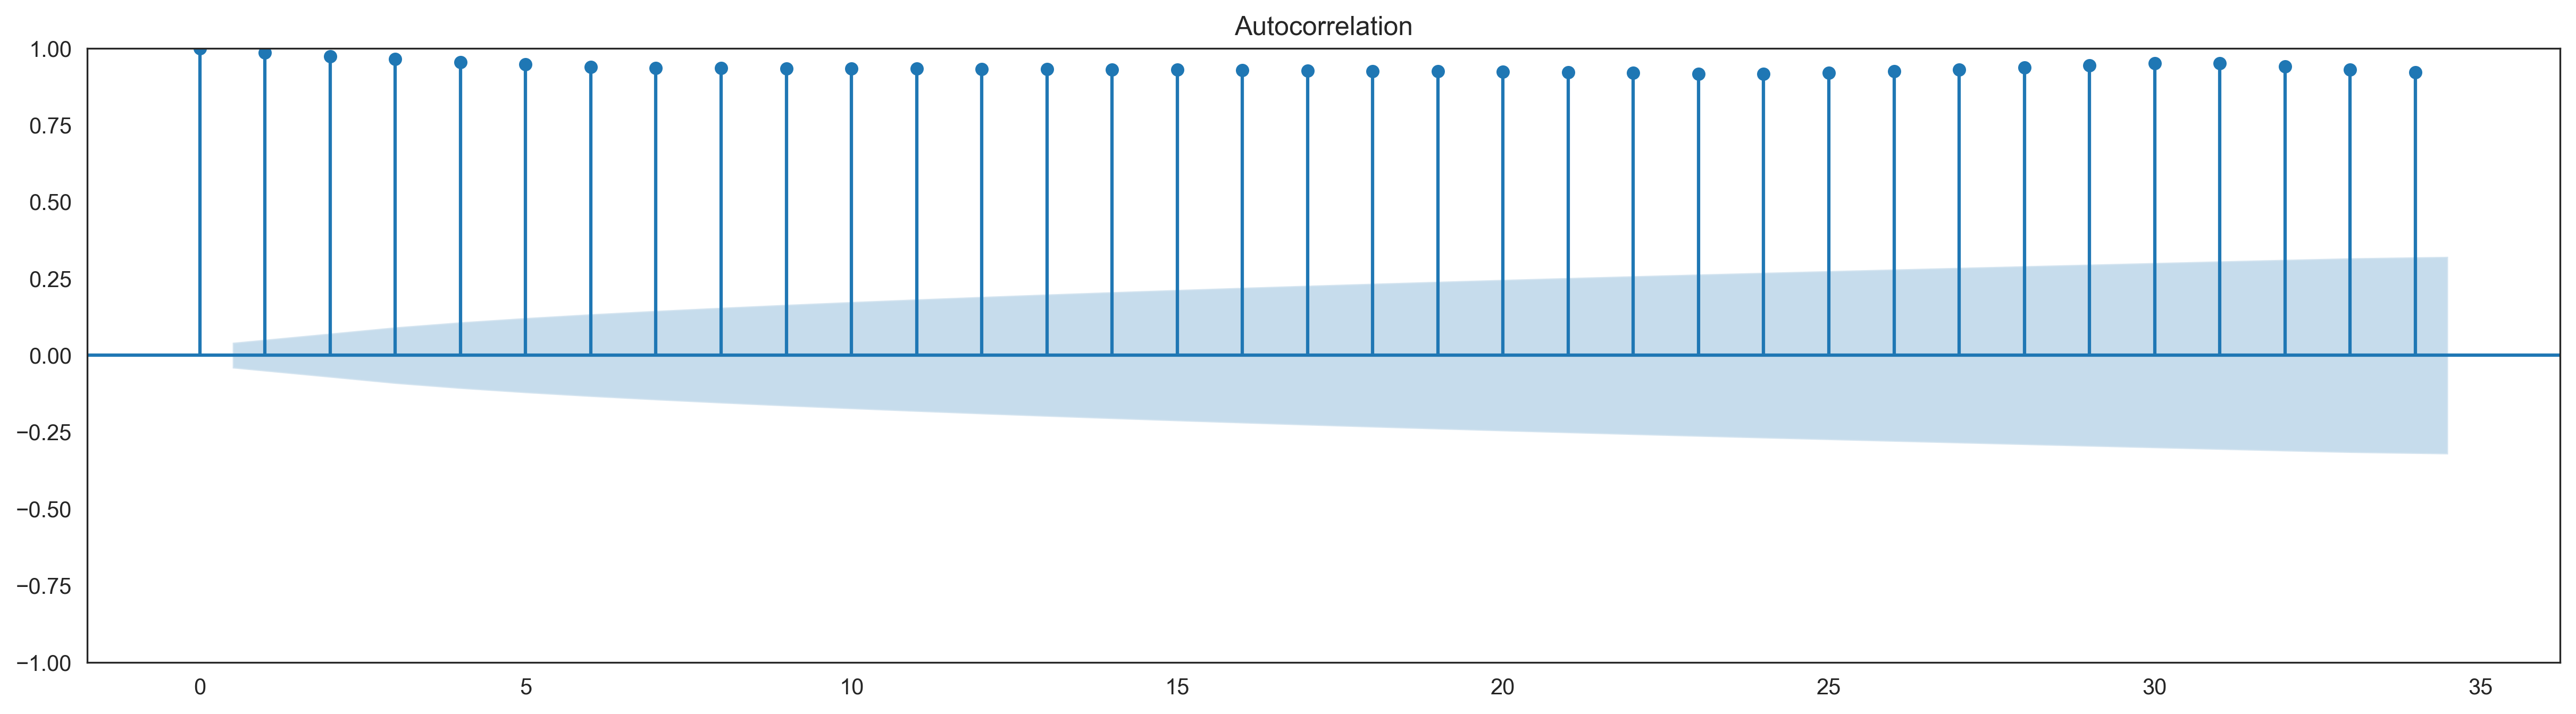

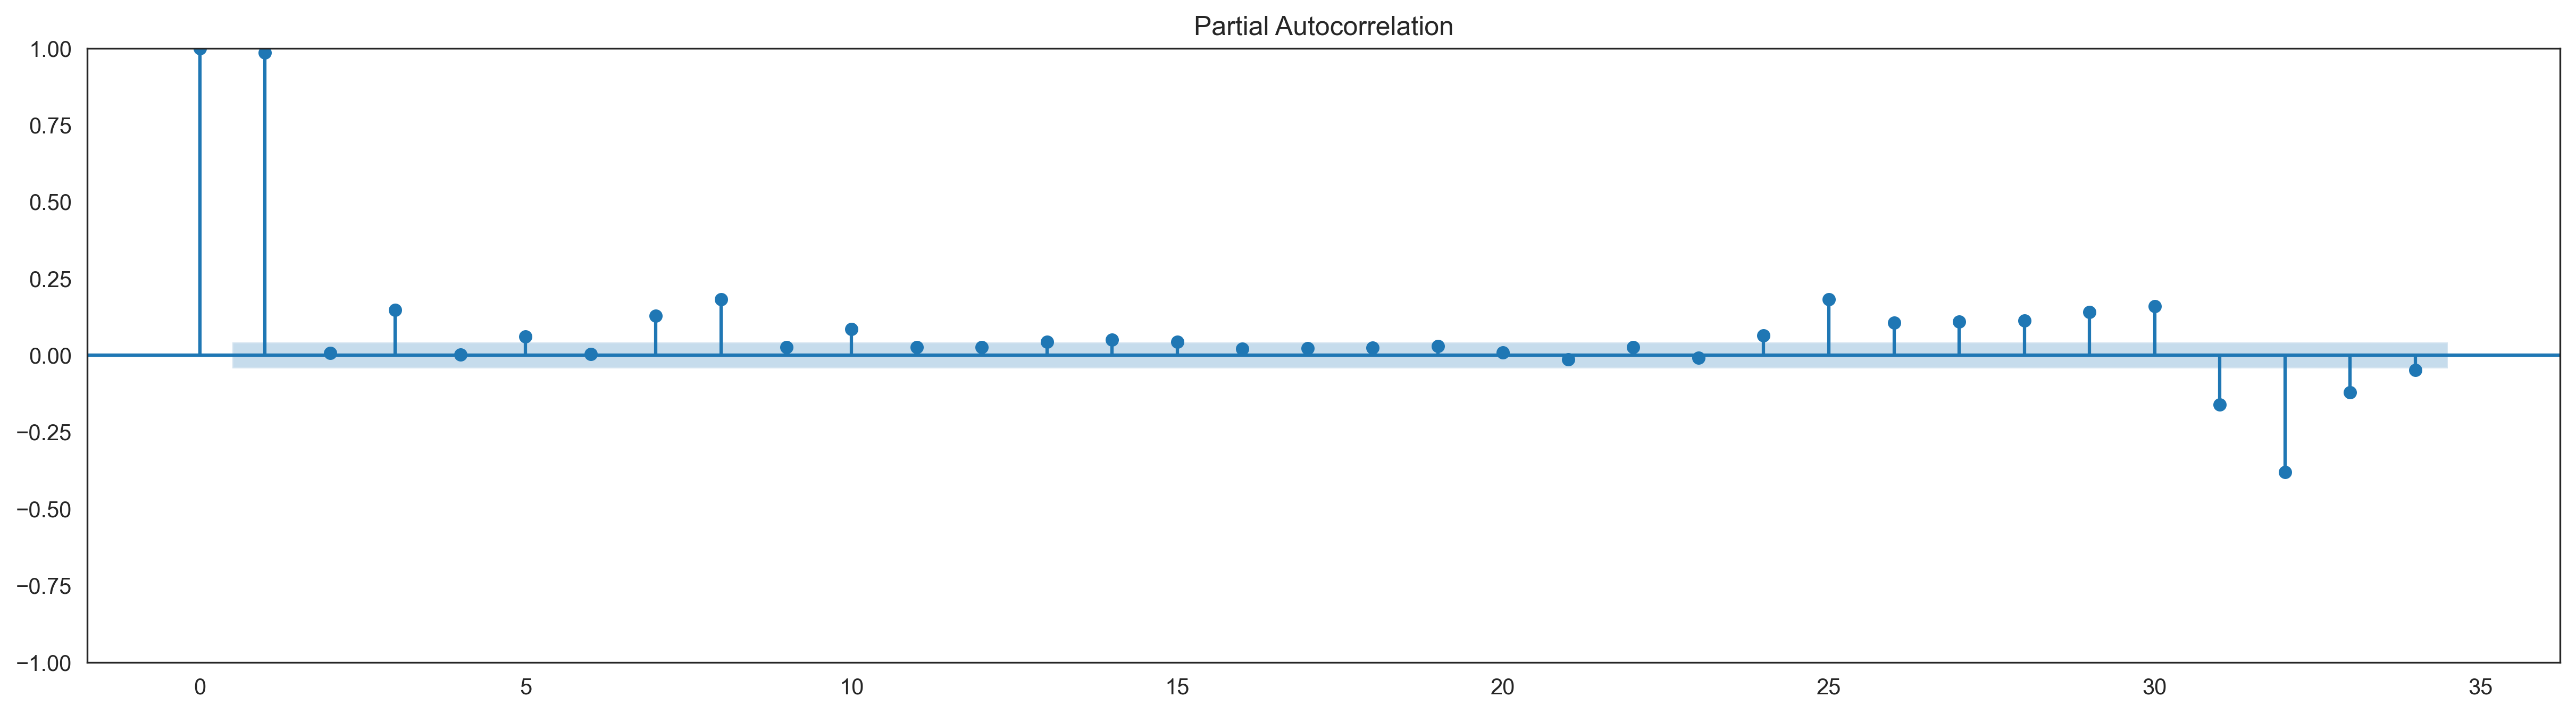

In [21]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300
plot_acf(df['price'])
plot_pacf(df['price'])
plt.show()

# Decomposition of Gold_Price

### Additive Decomposition

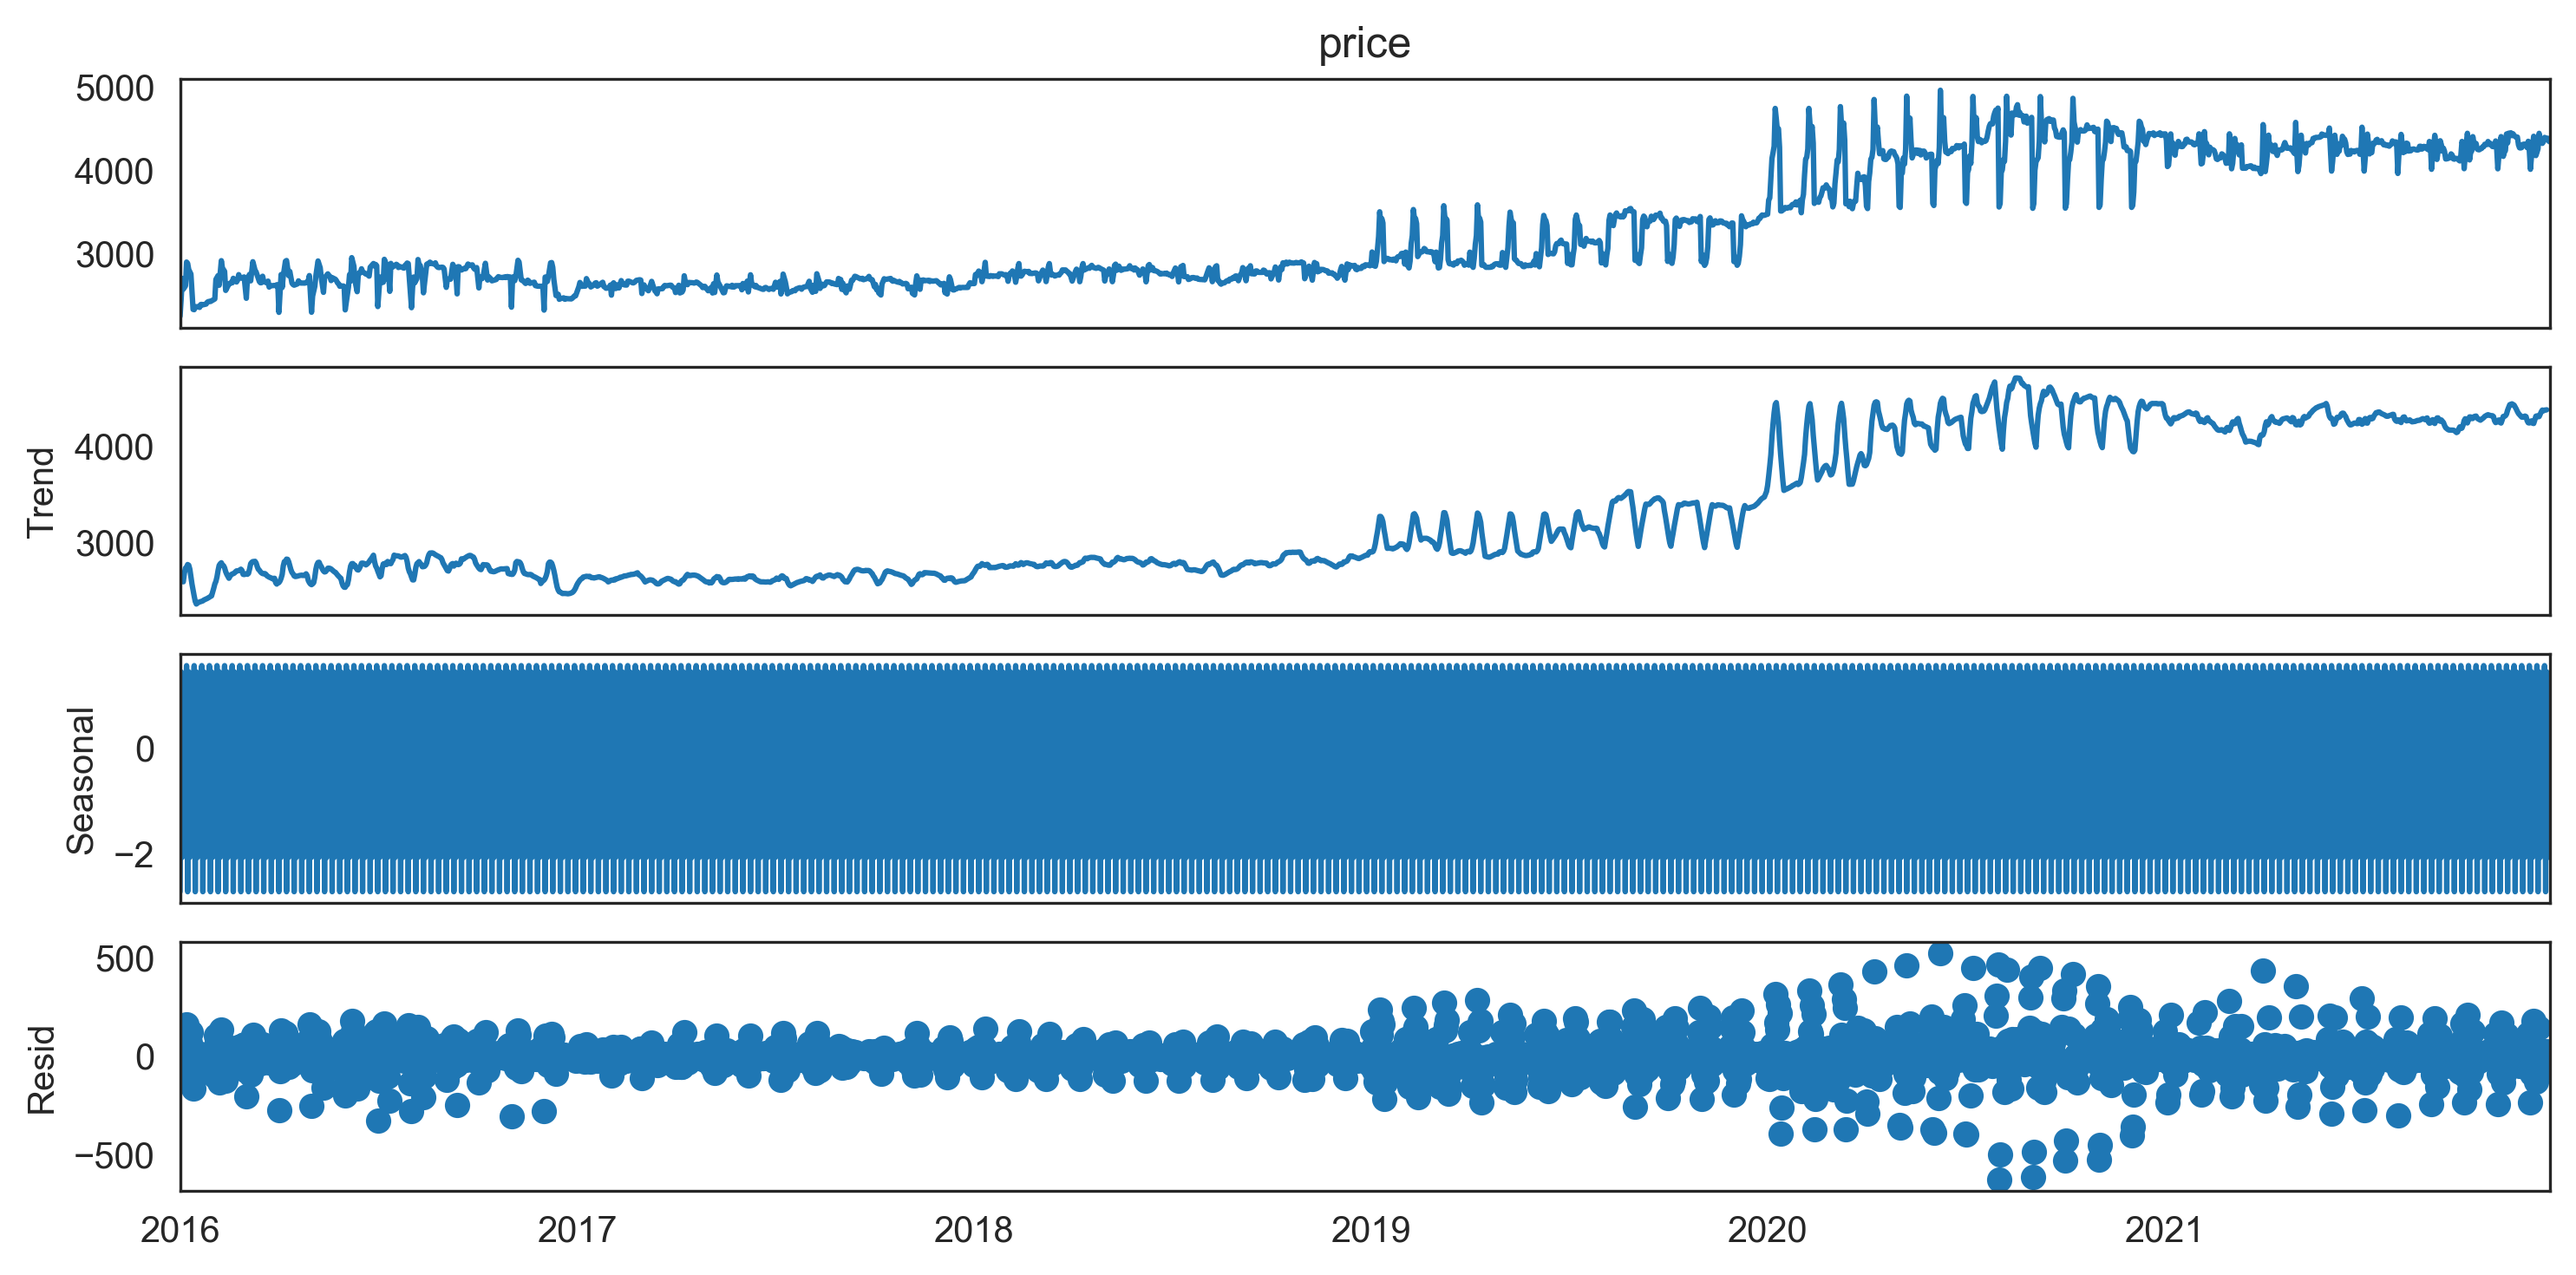

In [22]:
Additive= seasonal_decompose(df['price'], model='additive')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
Additive.plot()
plt.show()

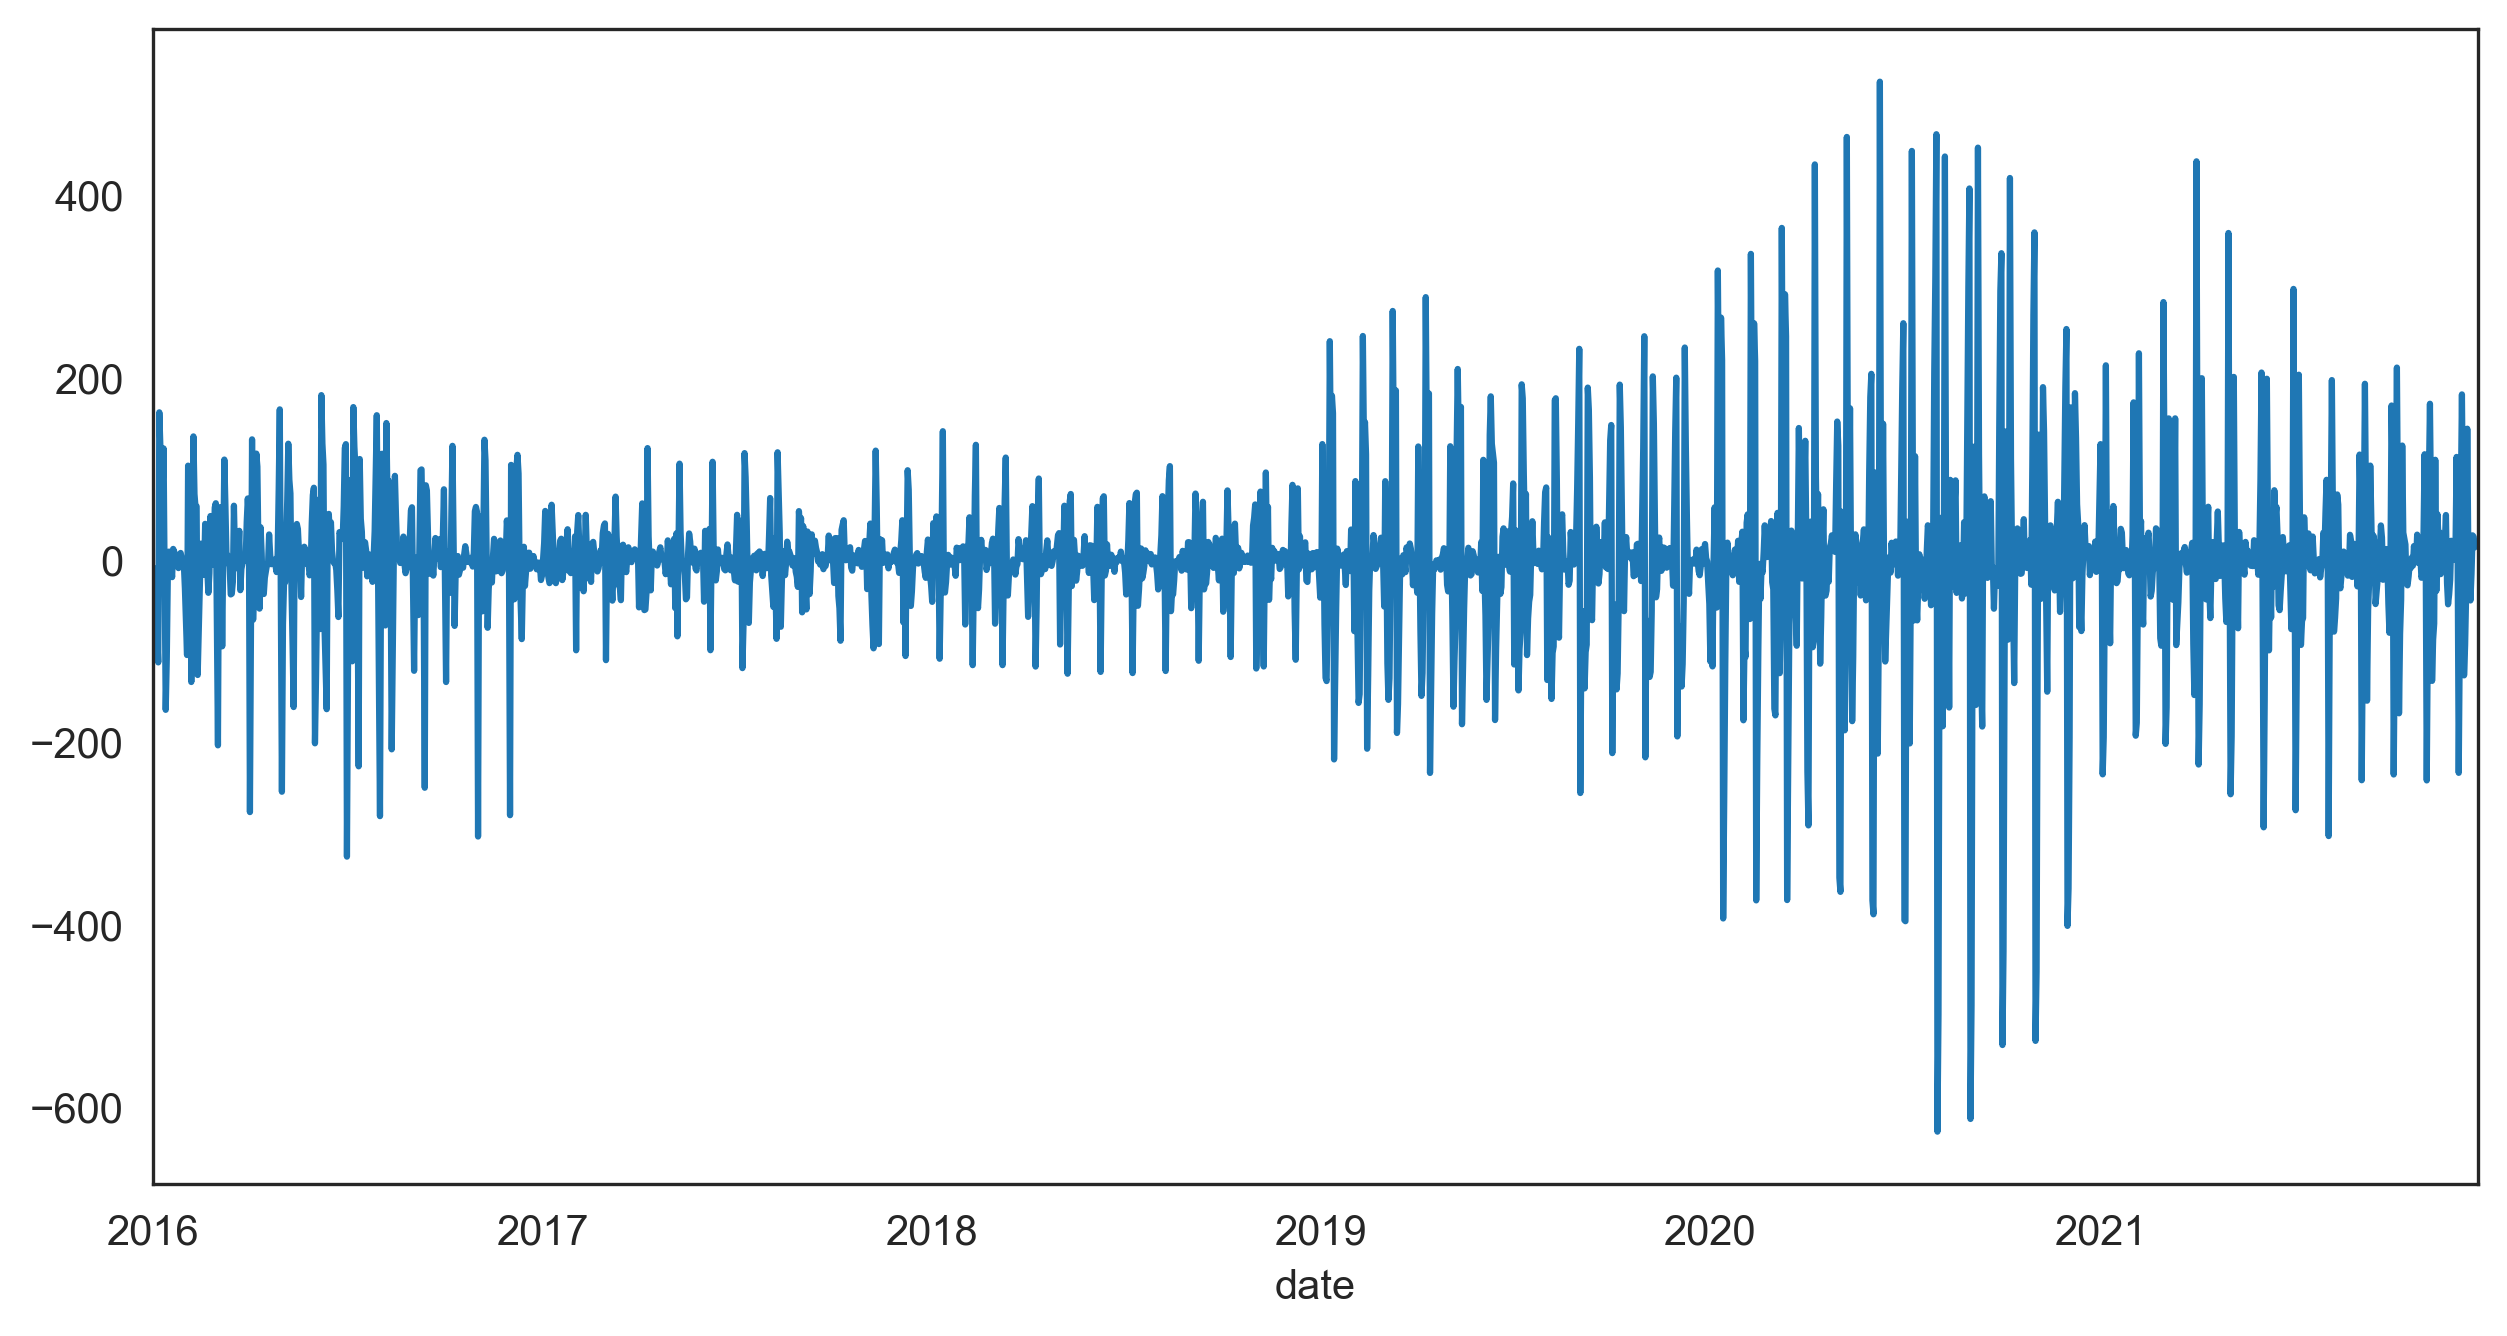

In [23]:
Additive.resid.plot()
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [24]:
#Coefficient of Variation of the Seasonal Adjusted residuals
CVSA = Additive.resid.std()/Additive.resid.mean()
CVSA

3584.654281985597

### Interpretation:
* #### The above Additive Decomposition plot shows peck year of gold price data is 2019 to 2020.
* #### It also shows that the clear upward trend starting in late 2019, peaking mid-2020.
* #### Both trend and seasonality are present.
* #### The above plot show residue are spread and is not in a straight line.
* ### Coefficient of variation of the Seasonal Adjusted residuals are very high is 3584.65.

### Multiplicative Decomposition 

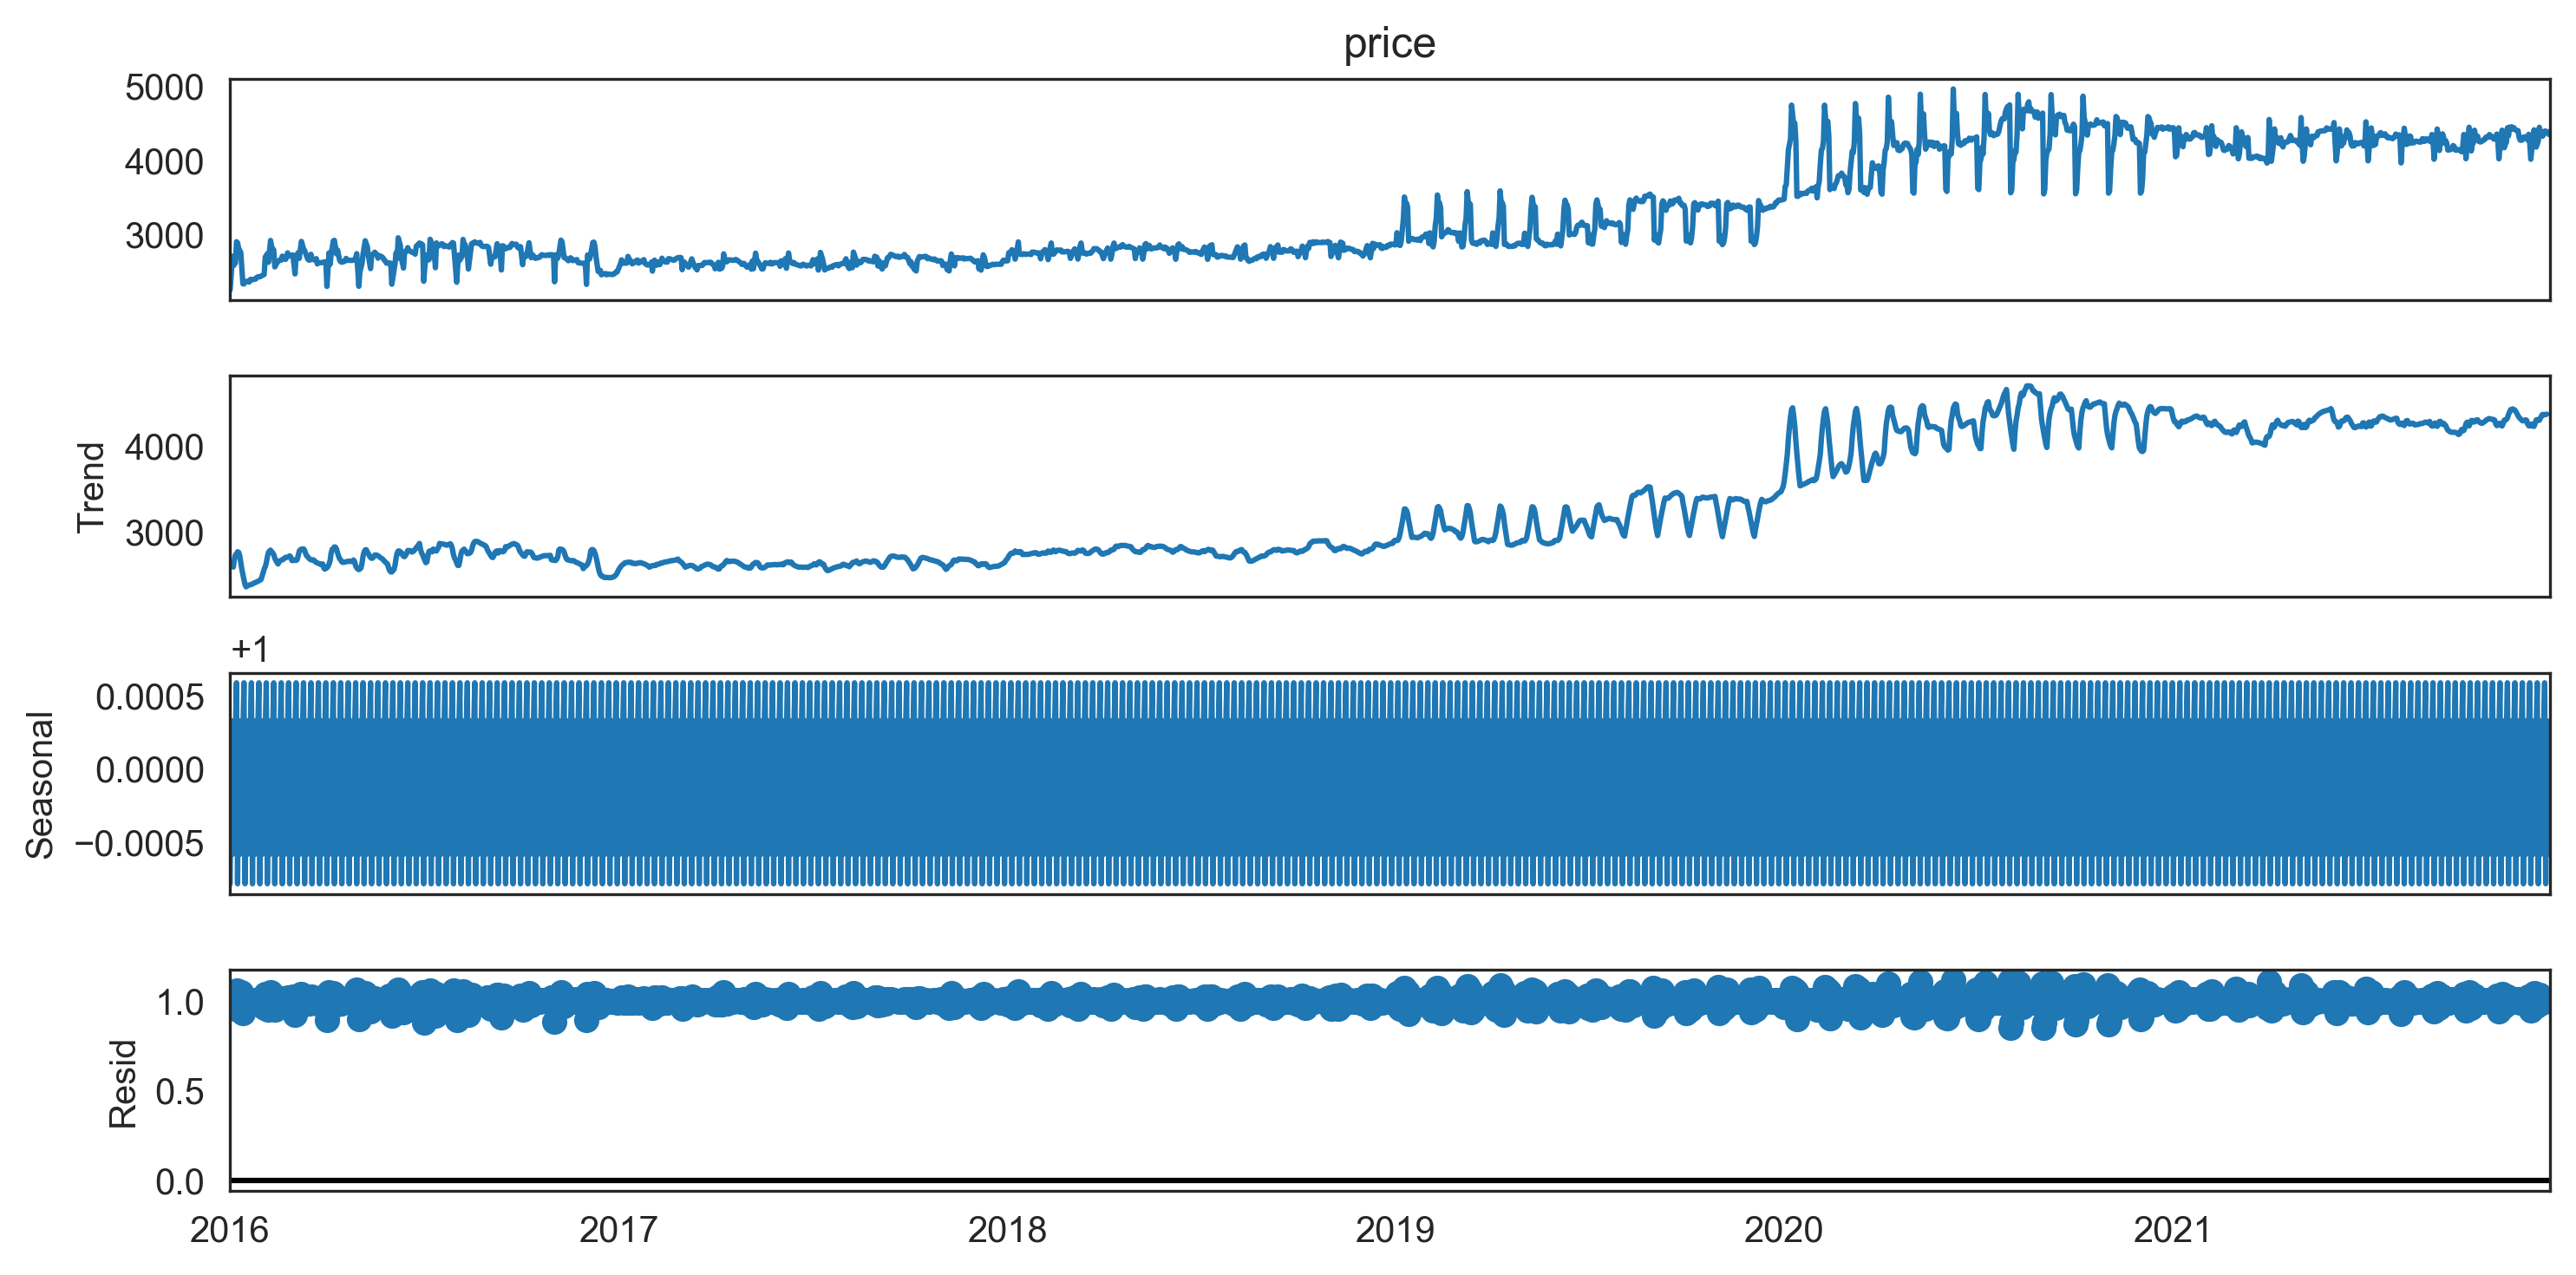

In [25]:
Multiplicative = seasonal_decompose(df['price'], model='multiplicative')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
Multiplicative.plot()
plt.show()

<Axes: xlabel='date'>

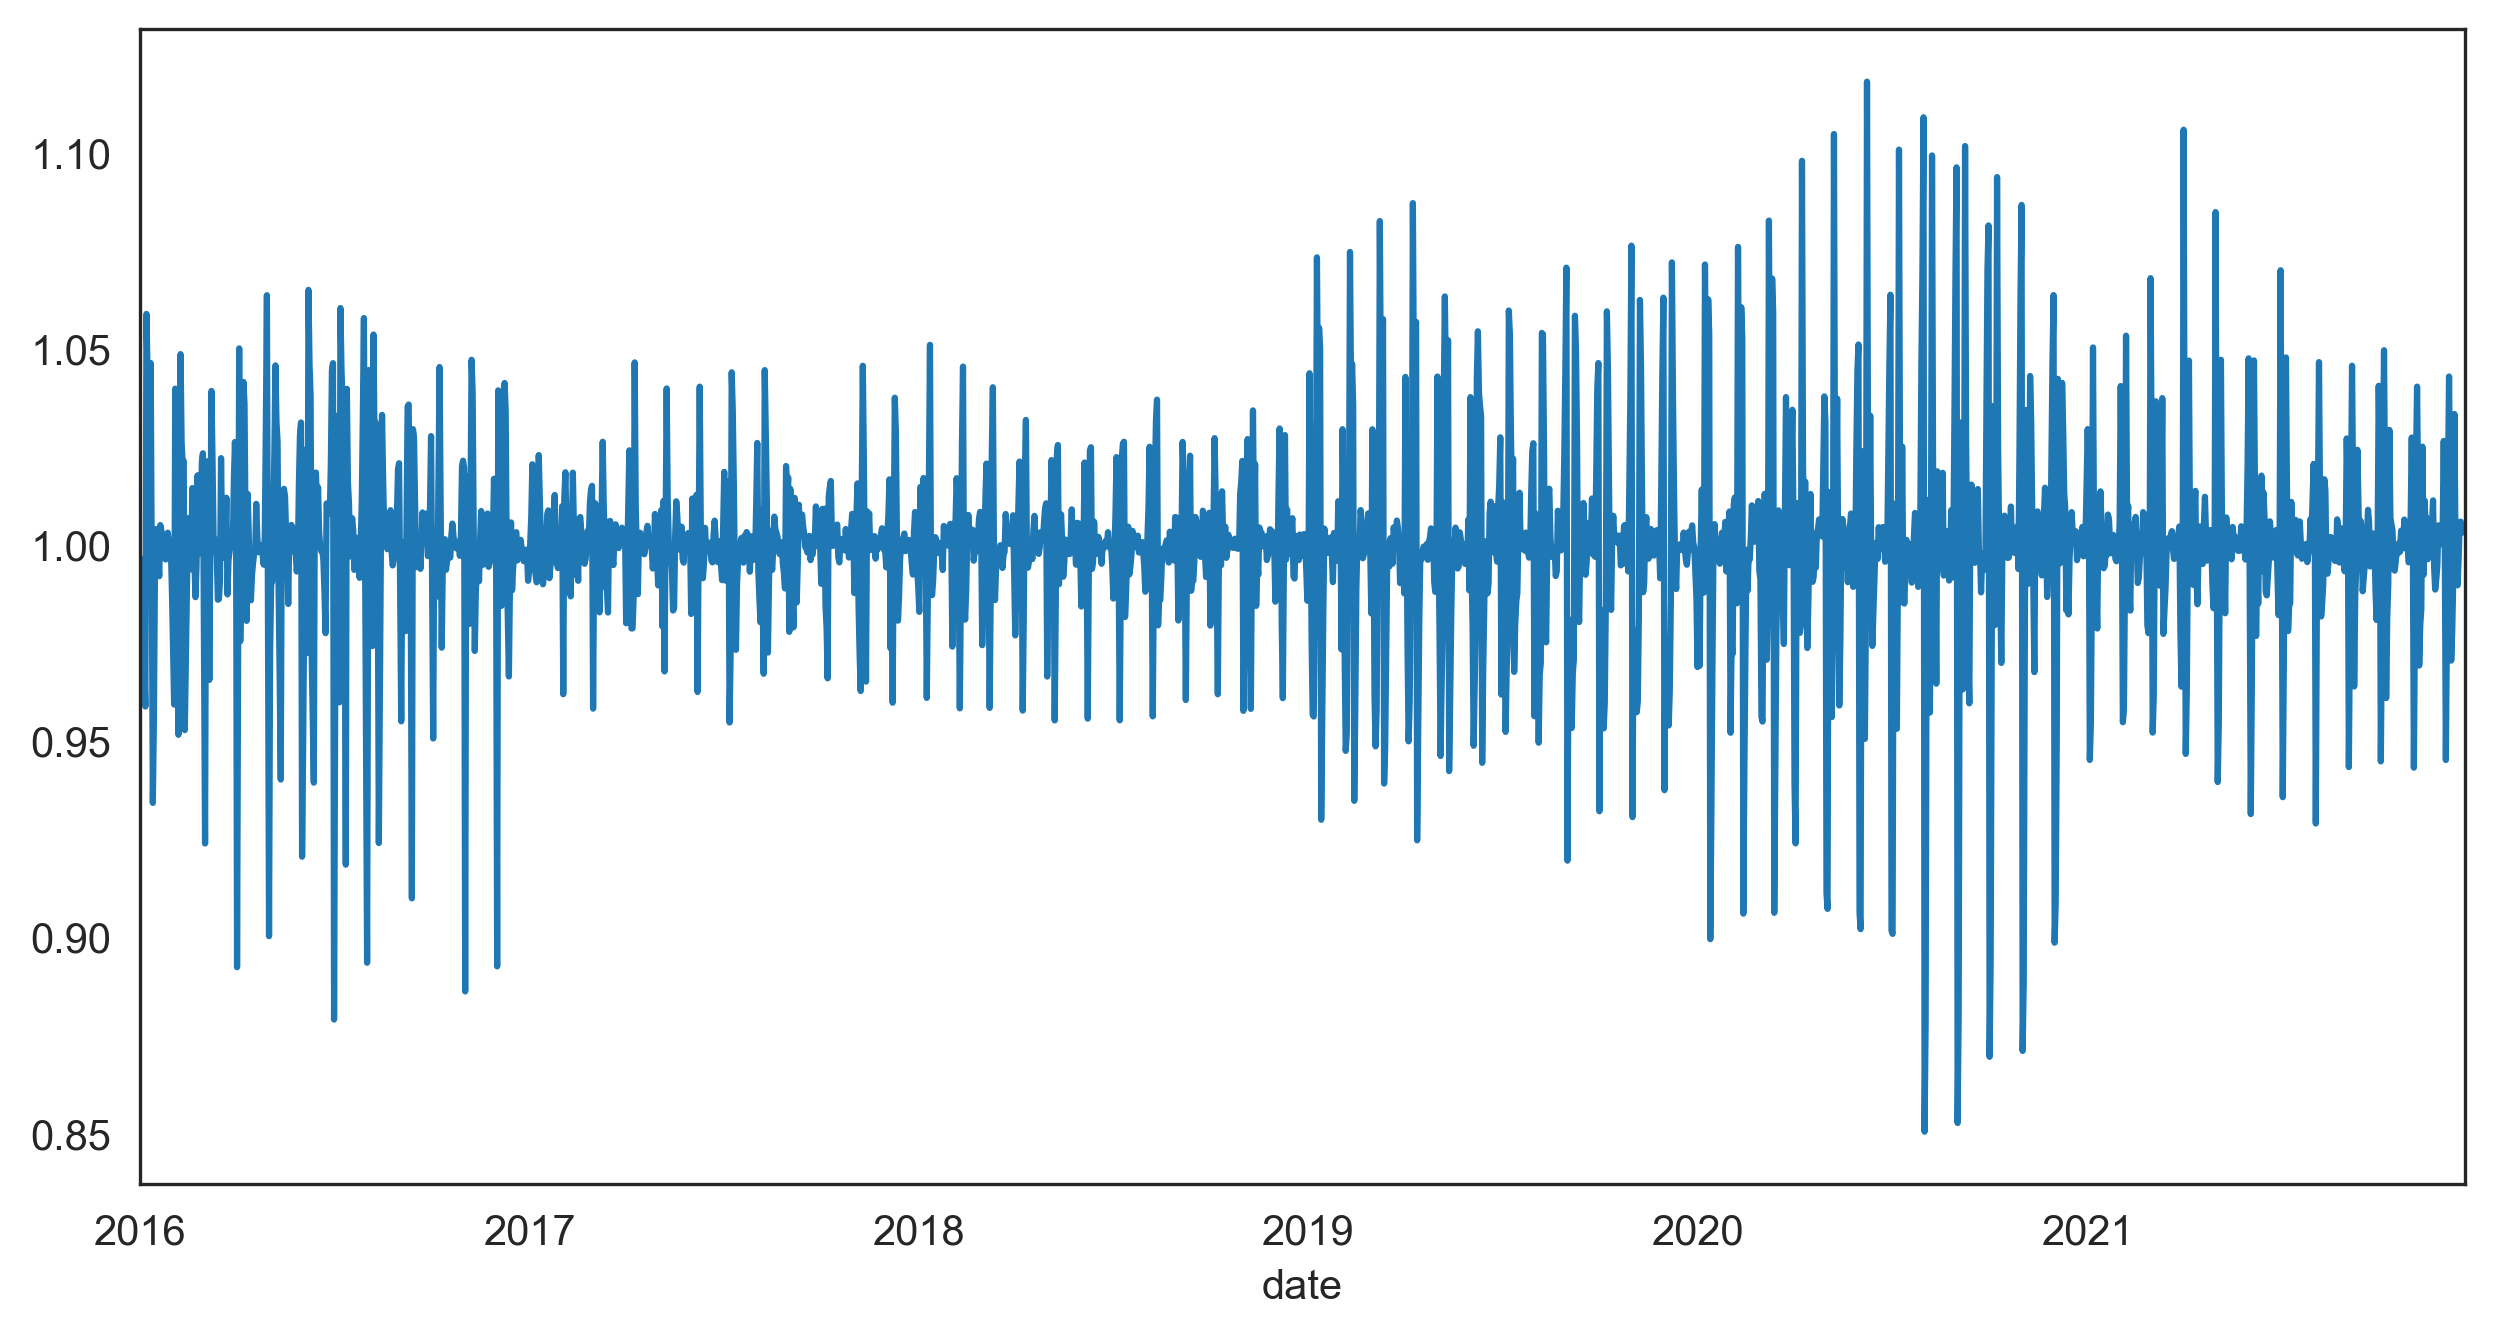

In [26]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
Multiplicative.resid.plot()

In [27]:
#Coefficient of Variation of the Seasonal Adjusted residualsA
CVSA = Multiplicative.resid.std()/Multiplicative.resid.mean()
CVSA

0.024879936612483666

## Interpretation:
* #### The above Multiplicative Decomposition plot shows peck year of gold price data is 2019 to 2020.
* #### It also shows that the clear upward trend starting in late 2019, peaking mid-2020.
* #### Both trend and seasonality are present.
* #### The above plot show most residuals spread close to 1.0.
* #### A low CVSA(Coefficient of Variation like 2.48%) means: The random noise in your data is small relative to the mean.
* ## We selected the multiplicative model because its residuals were more stable, had a smaller range, and exhibited a lower CV.

# =============================================================

# Split the data into train and test and plot the training and test data.

In [28]:
train =df[:-436]

test =df[-436:]

In [29]:
print(train.shape)

print(test.shape)

(1746, 3)
(436, 3)


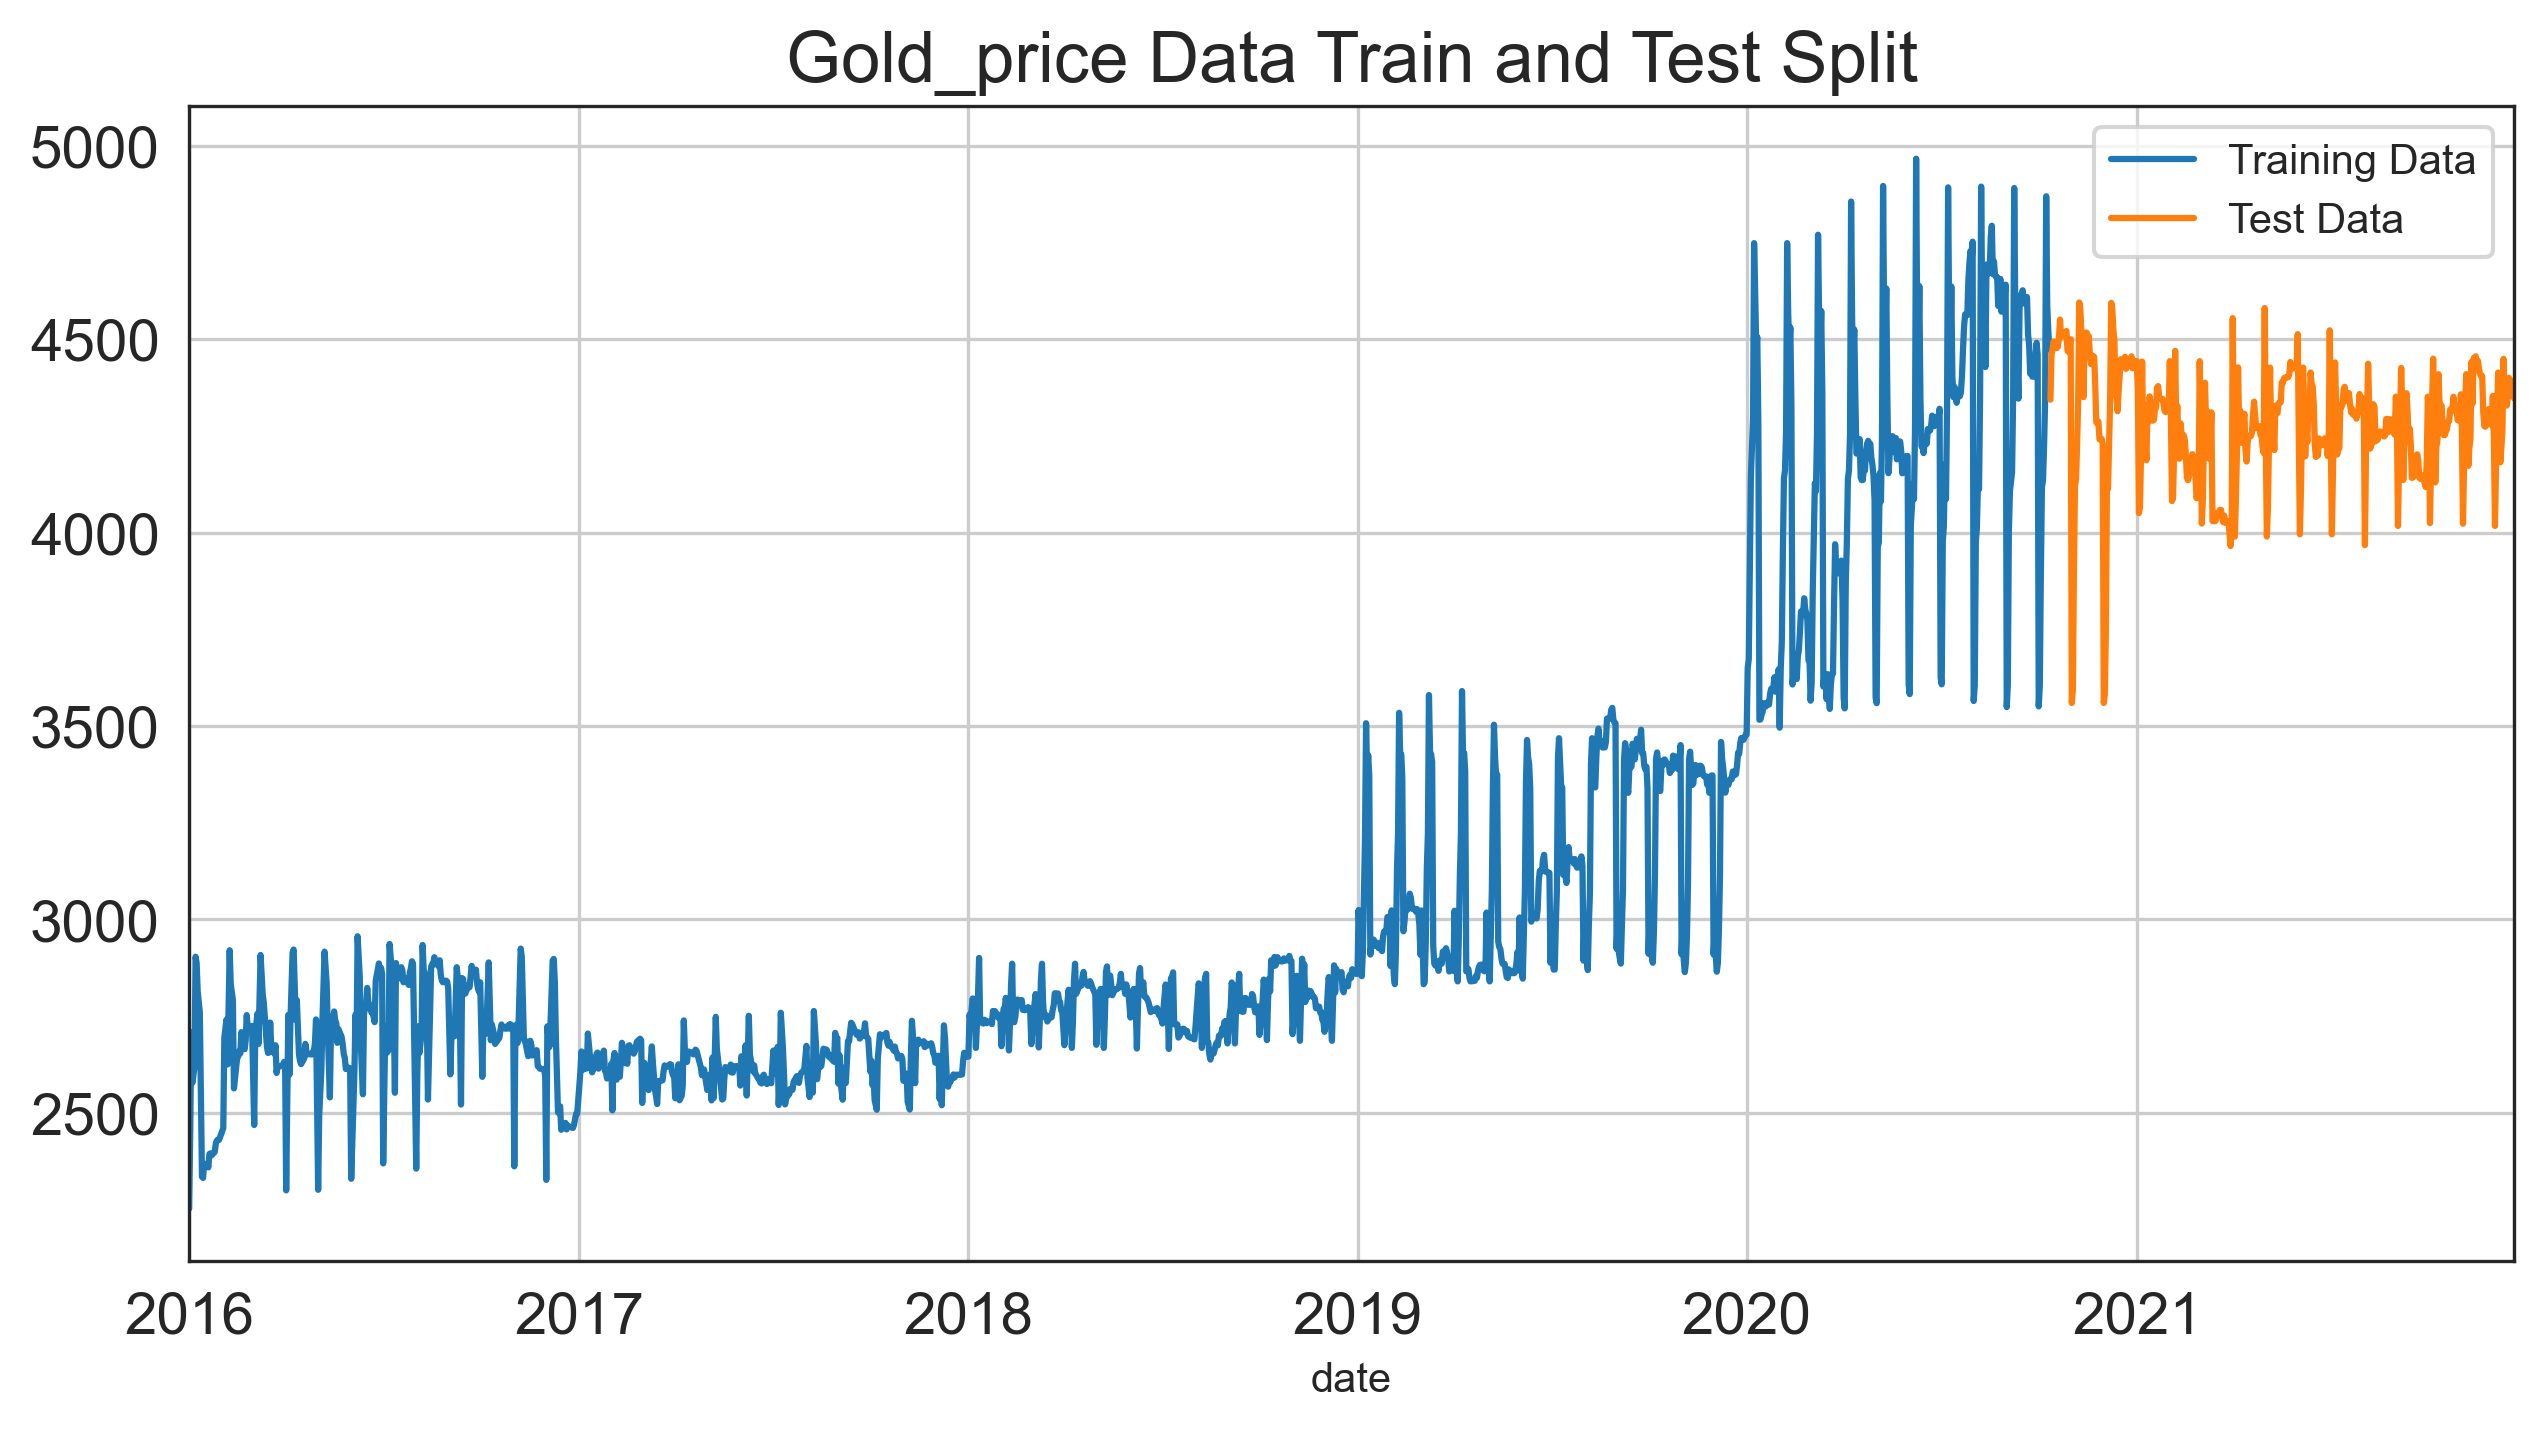

In [30]:
# Gold_Price DATA TRAIN TEST SPLIT TIME SERIES line Plot

train['price'].plot(fontsize=14)
test['price'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Gold_price Data Train and Test Split', fontsize=17)
plt.show();

# Model Building 

## Holt’s Linear Trend Method or Double Exponential Smoothing (SES)
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

In [31]:
# Initializing the Double Exponential Smoothing Model
model_1 = ExponentialSmoothing(train['price'], trend='add', seasonal=None)

In [32]:
# Fitting the model
fitted_model_1 = model_1.fit()
print('')
print('Holt model Double Exponential Smoothing Estimated Parameters :')
print('')
print(fitted_model_1.params)


Holt model Double Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.9714285714285713, 'smoothing_trend': 0.02312925170068027, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2352.7533333333317, 'initial_trend': 55.87484848484866, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [33]:
# Forecasting using this model for the duration of the test data
forecast_1 = fitted_model_1.forecast(len(test))
forecast_1

2020-10-12    4477.248077
2020-10-13    4479.429685
2020-10-14    4481.611293
2020-10-15    4483.792901
2020-10-16    4485.974509
                 ...     
2021-12-17    5417.521116
2021-12-18    5419.702724
2021-12-19    5421.884332
2021-12-20    5424.065940
2021-12-21    5426.247548
Freq: D, Length: 436, dtype: float64

## Plotting the Training data, Test data and the forecasted values

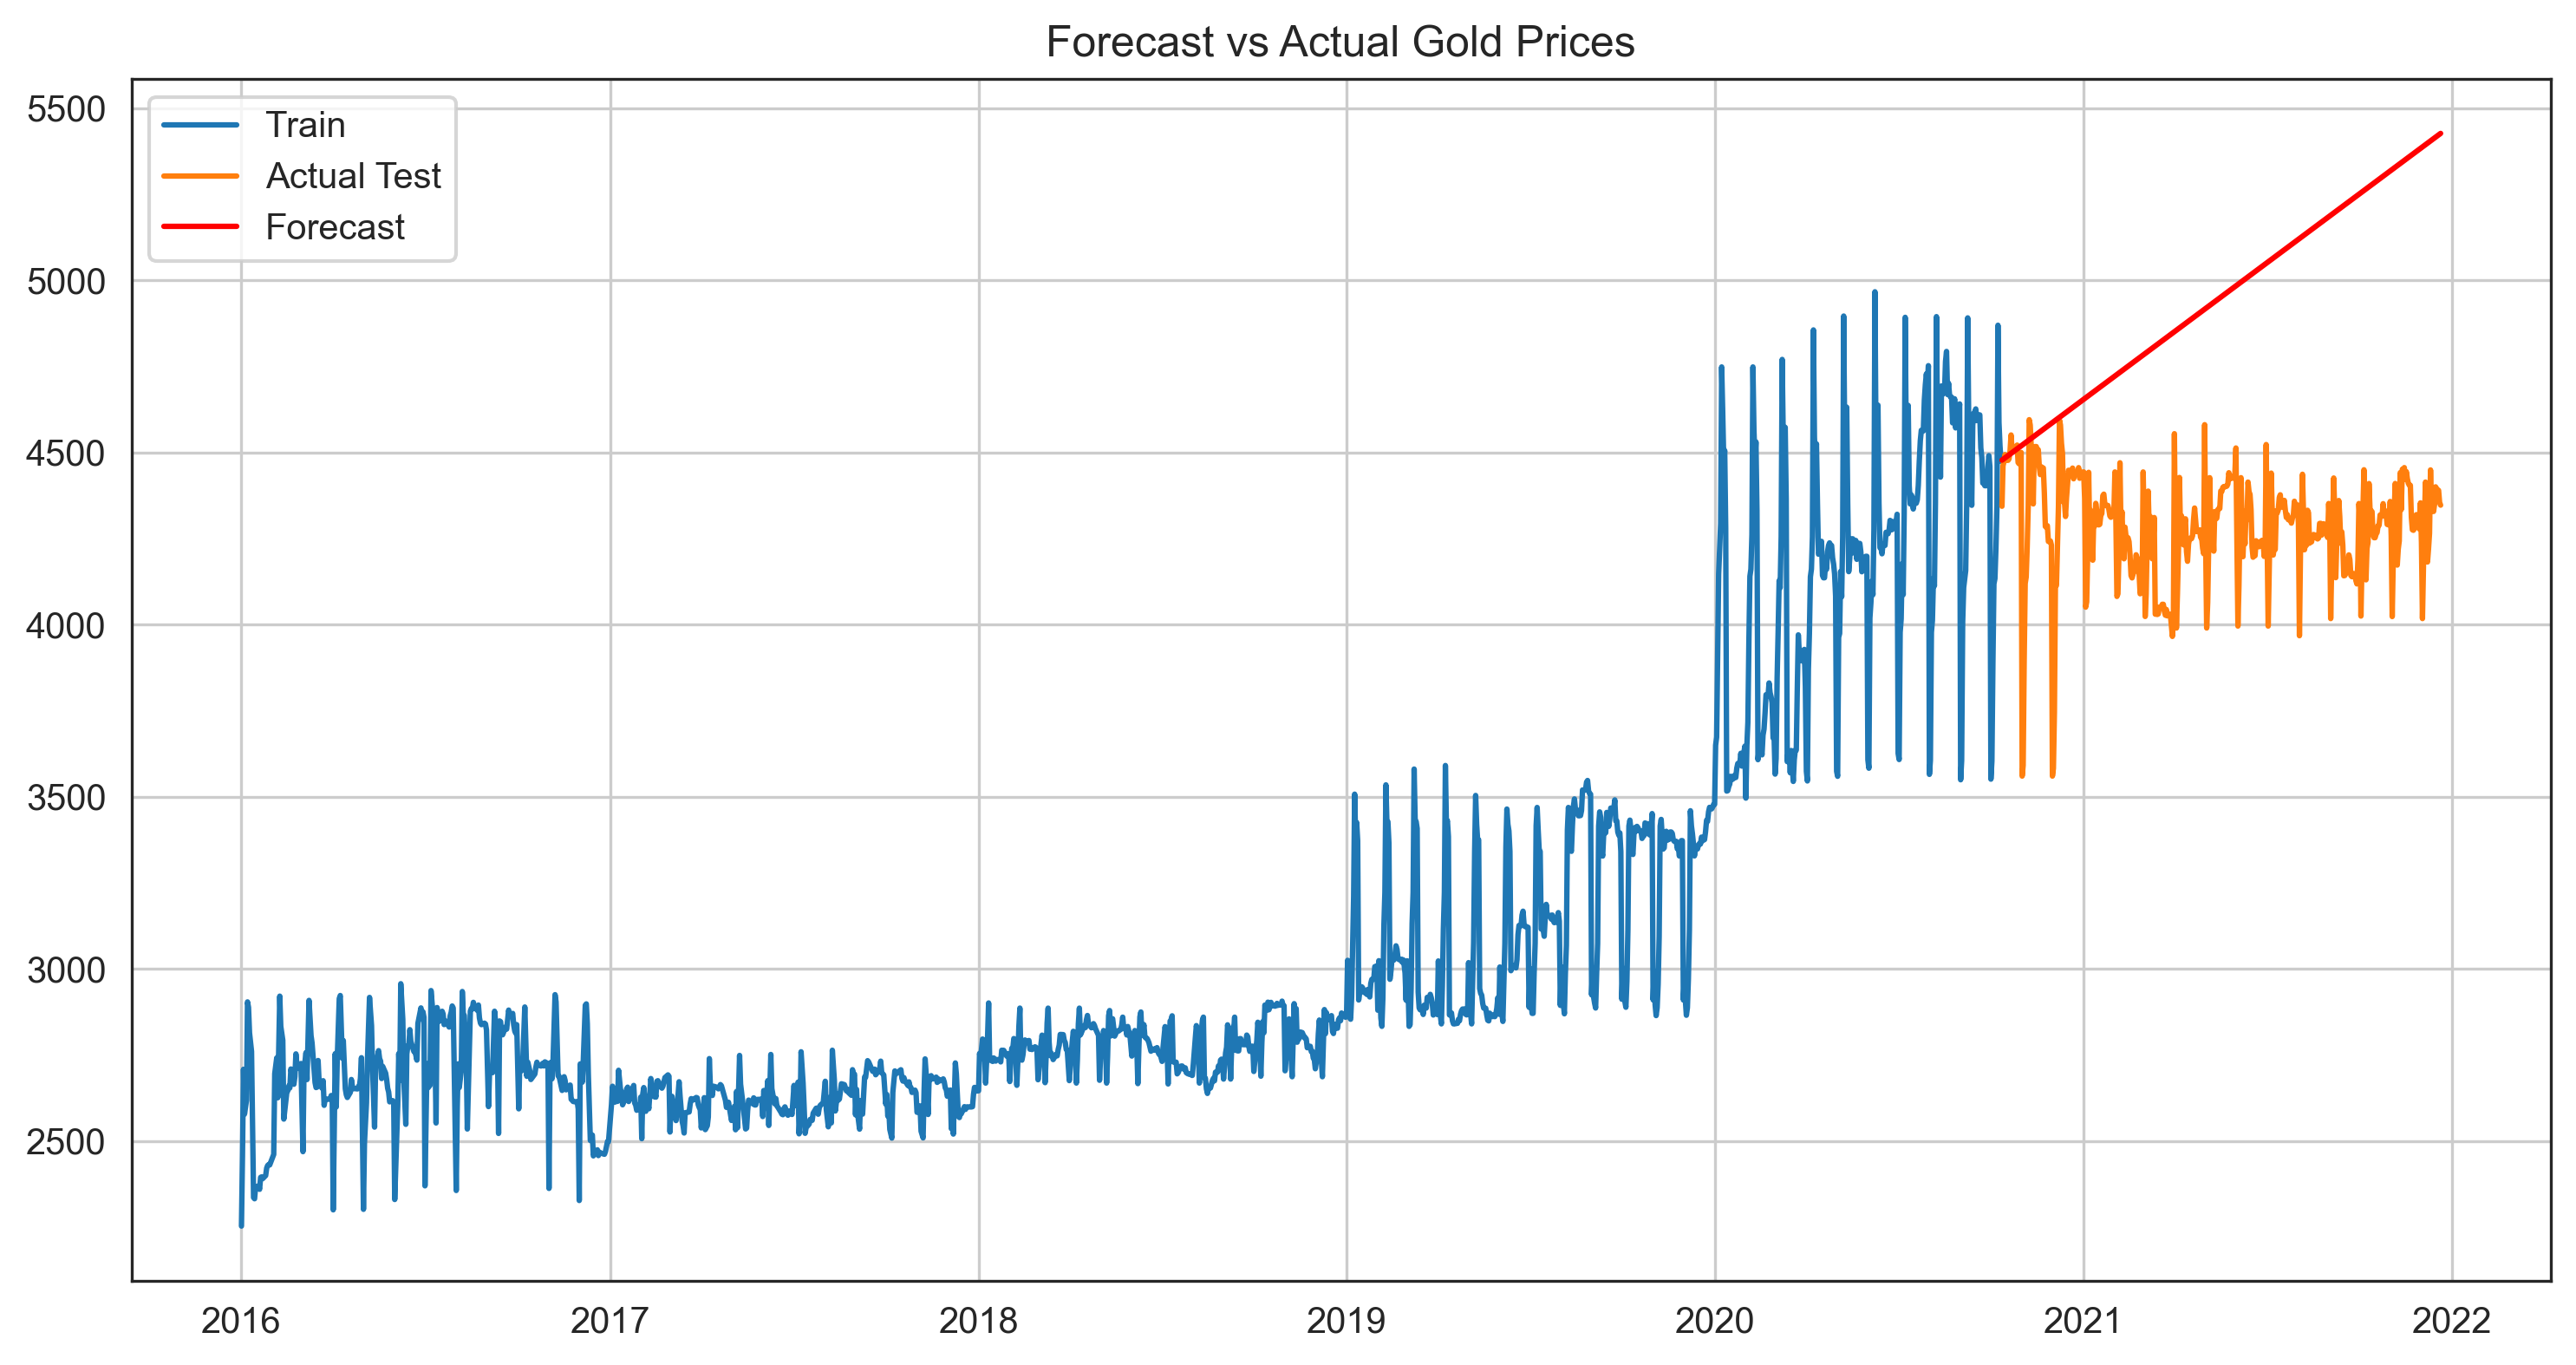

In [34]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Actual Test')
plt.plot(test.index, forecast_1 , label='Forecast', color='red')
plt.title("Forecast vs Actual Gold Prices")
plt.legend()
plt.grid()
plt.show()

In [35]:
result_DESM = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], forecast_1, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], forecast_1)]},
                           index=['Double Exponential Smoothing'])
result_DESM

RMSE Gold_price  MAE Gold_price
Double Exponential Smoothing       740.557856      668.042904

# Holt-Winters Exponential Smoothing
* This model is an extension of SES known as Triple Exponential model which estimates three smoothing parameters.
* Applicable when data has Trend and seasonality.

### Holt-Winters Exponential Smoothing Model:( trend = additive & seasonal= additive)

In [36]:
model_2 = ExponentialSmoothing(train['price'], trend='additive',seasonal='additive',
                              initialization_method='estimated',damped_trend=True,seasonal_periods=365)

In [37]:
# Fitting the model
fitted_model_2 = model_2.fit()

In [38]:
# Forecasting using this model for the duration of the test data
forecast_2 = fitted_model_2.forecast(len(test))
forecast_2

2020-10-12    4499.157538
2020-10-13    4503.643041
2020-10-14    4510.342538
2020-10-15    4511.677888
2020-10-16    4510.072422
                 ...     
2021-12-17    4443.293131
2021-12-18    4444.179170
2021-12-19    4443.713942
2021-12-20    4442.249281
2021-12-21    4439.427966
Freq: D, Length: 436, dtype: float64

### Plotting the Training data, Test data and the forecasted values

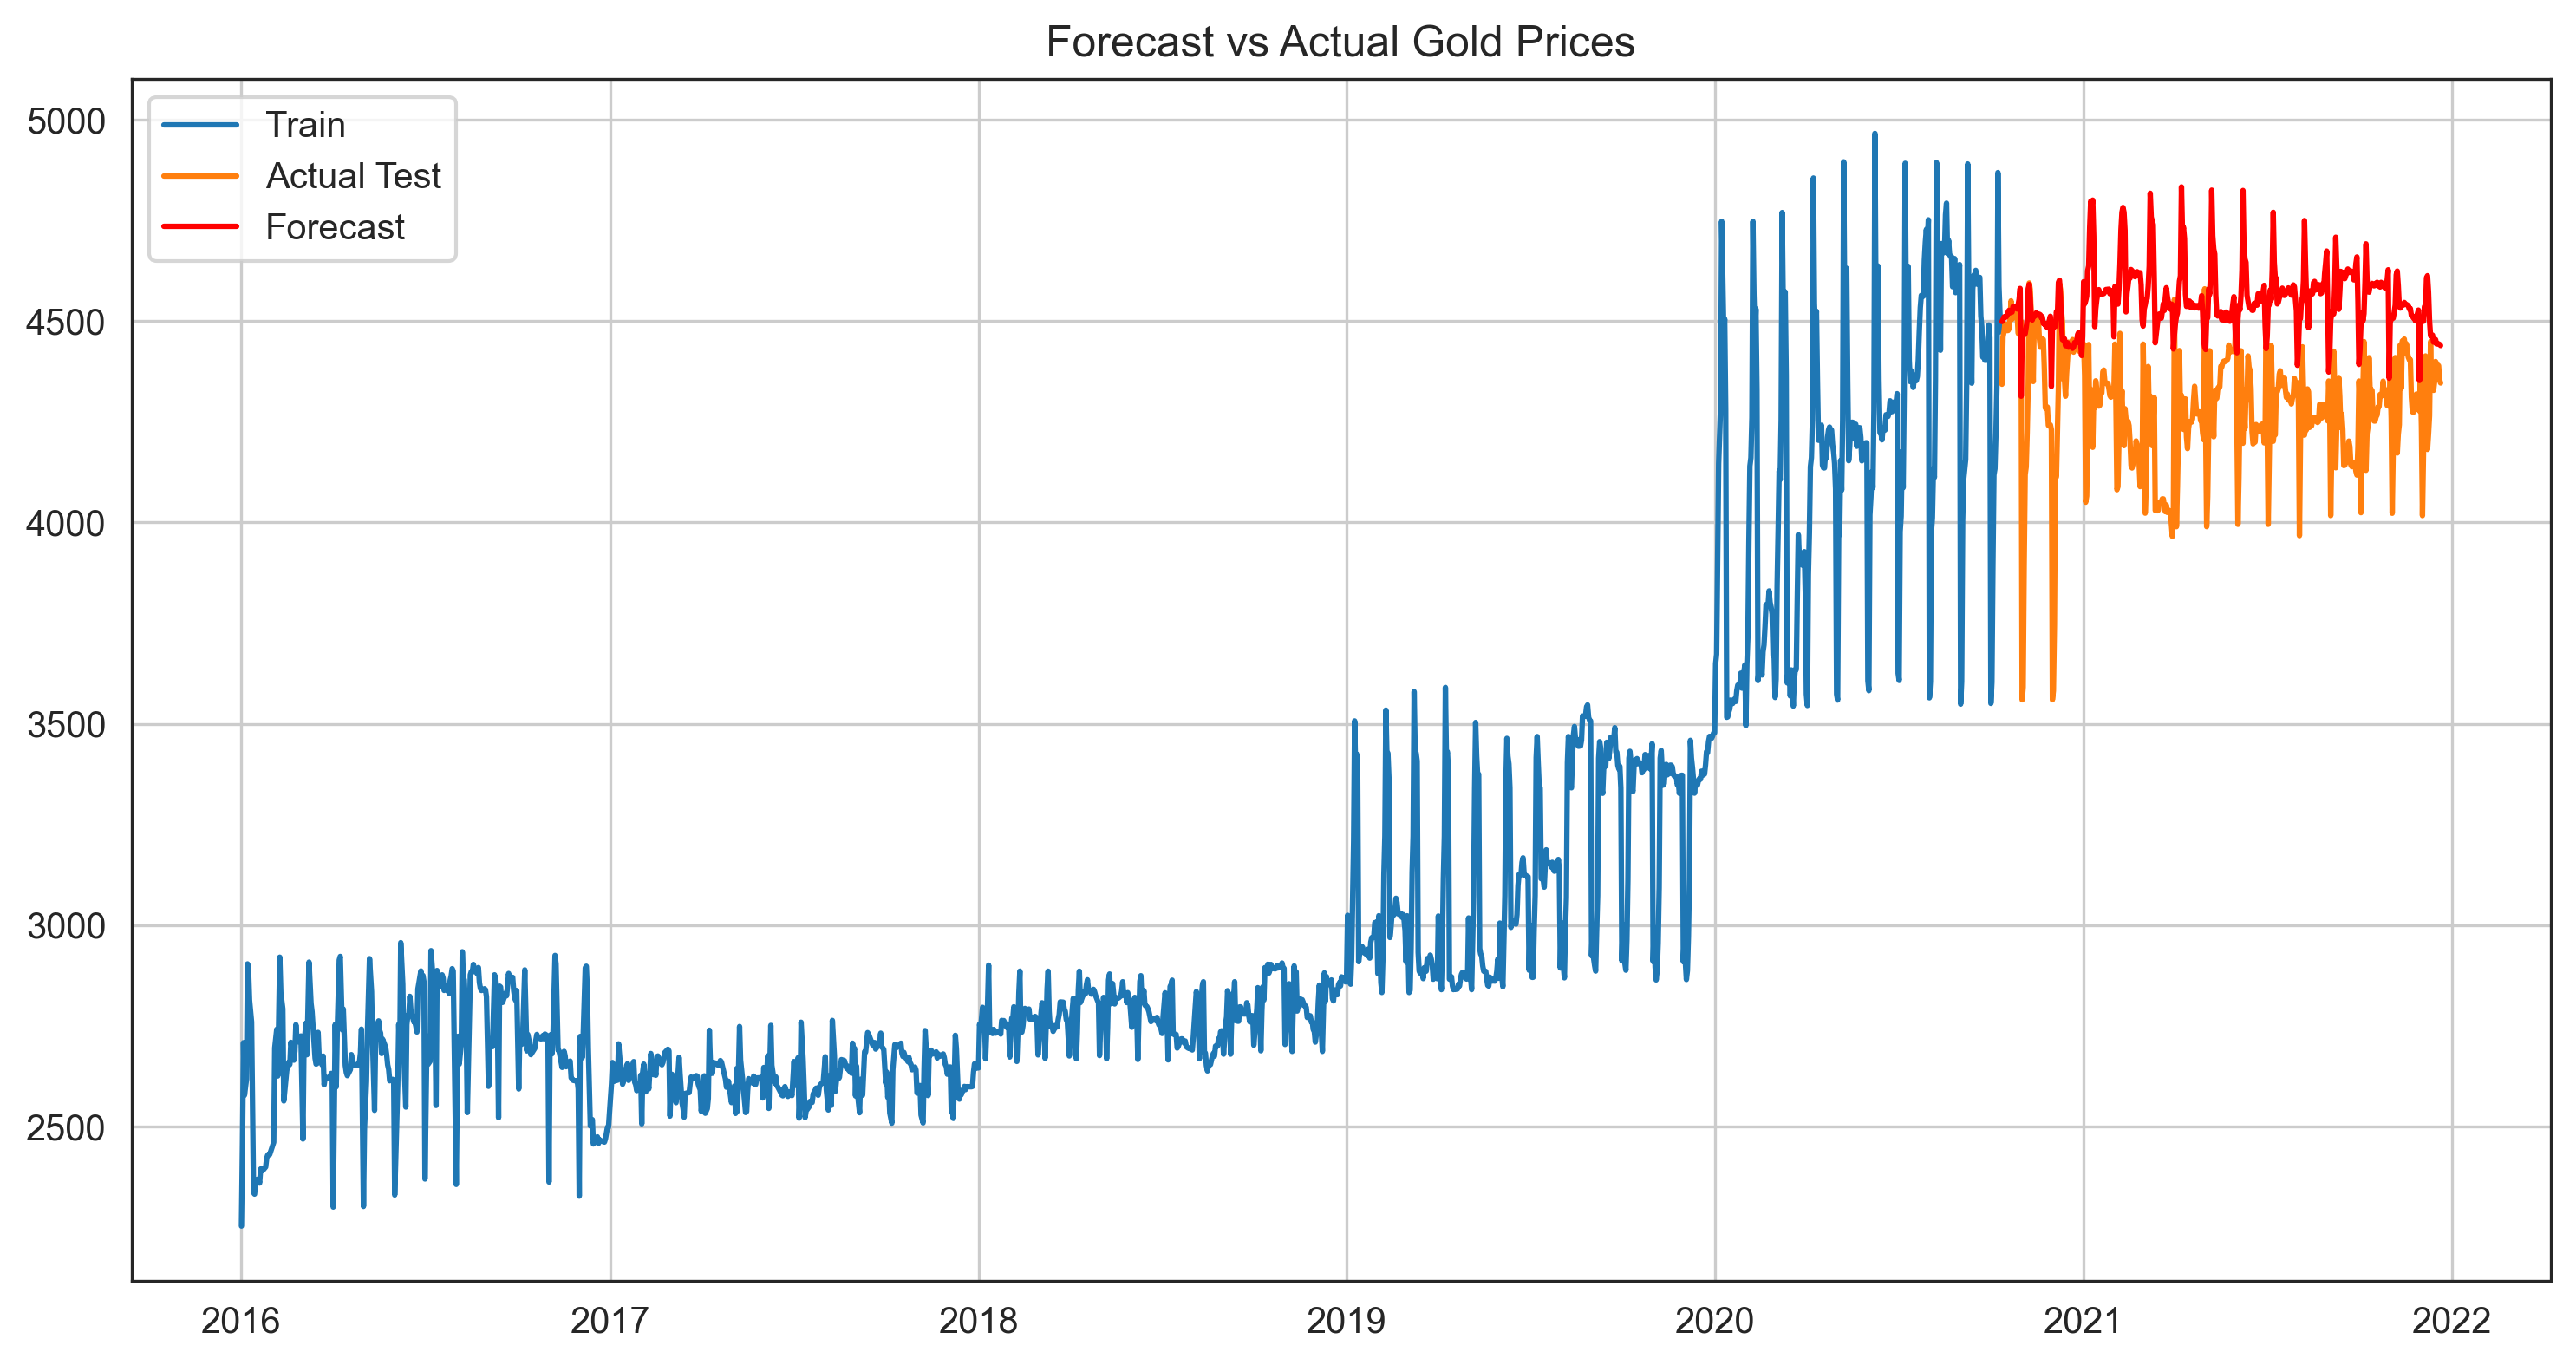

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Actual Test')
plt.plot(test.index, forecast_2, label='Forecast', color='red')
plt.title("Forecast vs Actual Gold Prices")
plt.legend()
plt.grid()
plt.show()

In [40]:
result_TESM1 = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], forecast_2, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], forecast_2)]},
                           index=['Holt-Winters Exponential Smoothing(trend add & seasonal add)'])
result_TESM1

RMSE Gold_price  \
Holt-Winters Exponential Smoothing(trend add & ...       319.202298   

                                                    MAE Gold_price  
Holt-Winters Exponential Smoothing(trend add & ...      271.150599

### Holt-Winters Exponential Smoothing Model:( trend='additive & seasonal='Multiplicative')

In [41]:
model_3 = ExponentialSmoothing(train['price'], trend='additive',seasonal='mul',
                              initialization_method='estimated',damped_trend=True,seasonal_periods=365)

In [42]:
# Fitting the model
fitted_model_3 = model_3.fit()

In [43]:
# Forecasting using this model for the duration of the test data
forecast_3 = fitted_model_3.forecast(len(test))
forecast_3

2020-10-12    4470.172944
2020-10-13    4457.781818
2020-10-14    4472.953268
2020-10-15    4464.764711
2020-10-16    4456.785787
                 ...     
2021-12-17    4228.548079
2021-12-18    4222.504353
2021-12-19    4229.668301
2021-12-20    4230.103747
2021-12-21    4227.712498
Freq: D, Length: 436, dtype: float64

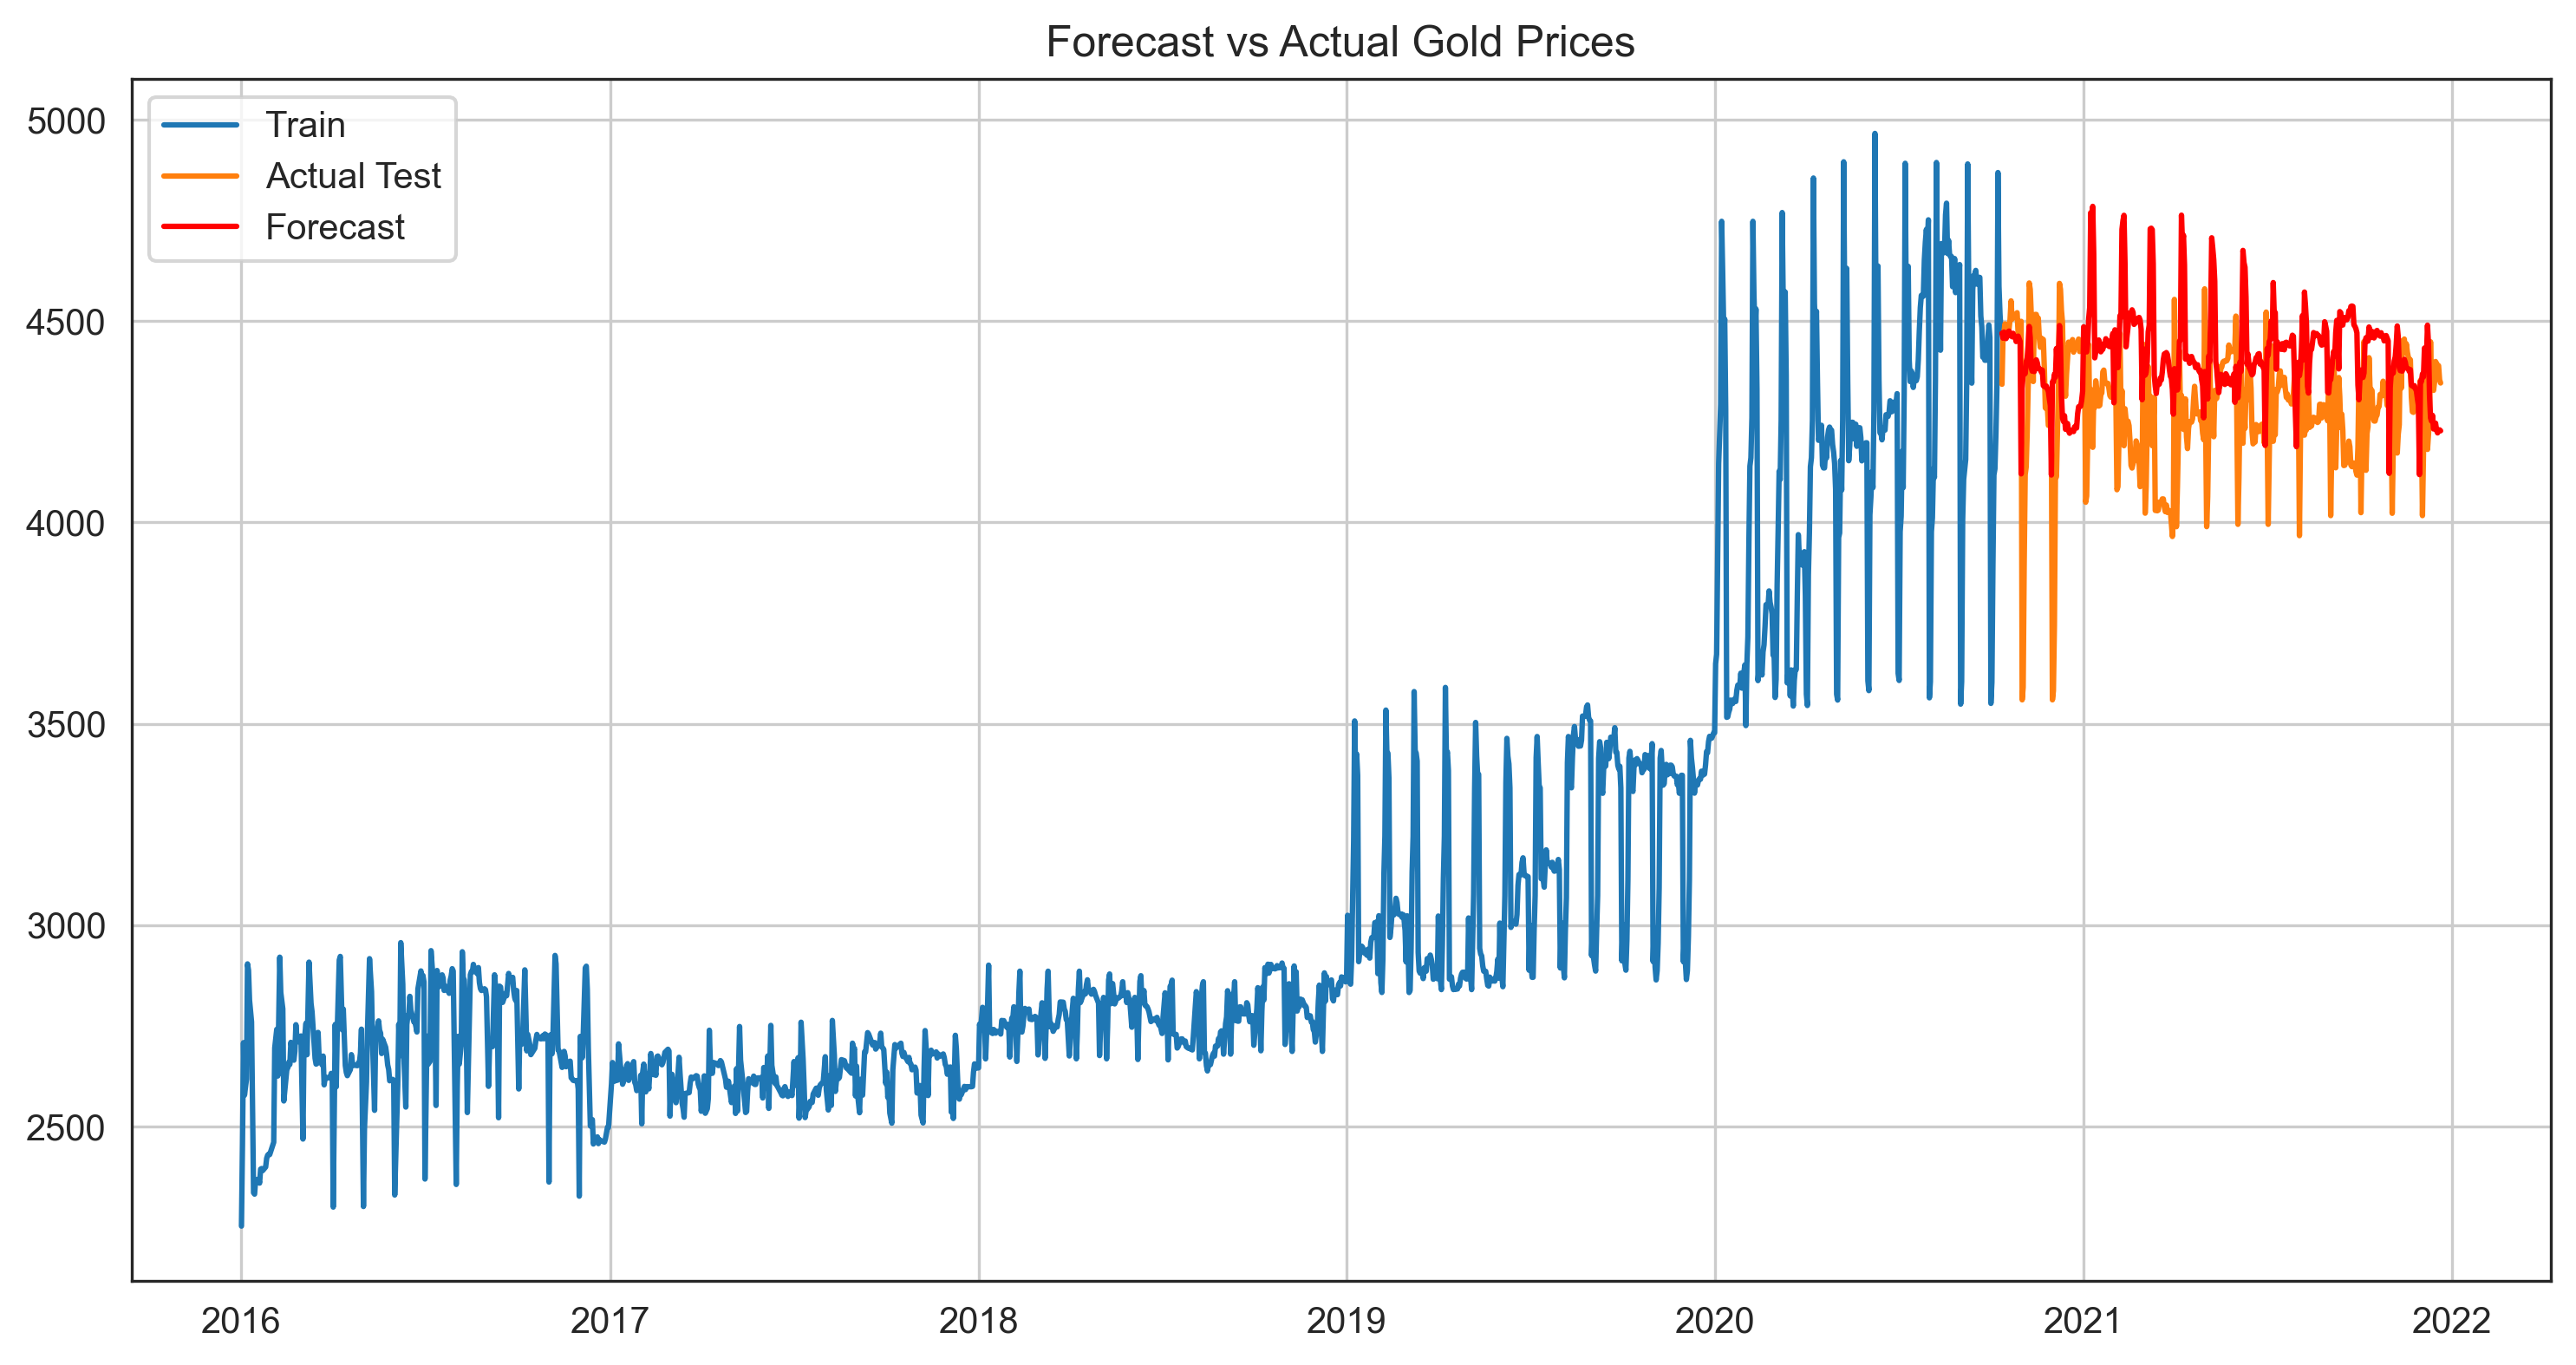

In [44]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Actual Test')
plt.plot(test.index, forecast_3, label='Forecast', color='red')
plt.title("Forecast vs Actual Gold Prices")
plt.legend()
plt.grid()
plt.show()

In [45]:
result_TESM2 = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], forecast_3, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], forecast_3)]},
                           index=[' Holt-Winters Exponential Smoothing(trend add & seasonal multi)'])
result_TESM2

RMSE Gold_price  \
Holt-Winters Exponential Smoothing(trend add & ...       227.231556   

                                                    MAE Gold_price  
Holt-Winters Exponential Smoothing(trend add & ...      181.297231

### Holt-Winters Exponential Smoothing Model:( trend='Multiplicative & seasonal='Multiplicative')

In [46]:
model_4 = ExponentialSmoothing(train['price'], trend='mul',seasonal='mul',
                              initialization_method='estimated',damped_trend=True,seasonal_periods=365)

In [47]:
# Fitting the model
fitted_model_4 = model_4.fit()

In [48]:
# Forecasting using this model for the duration of the test data
forecast_4 = fitted_model_4.forecast(len(test))
forecast_4

2020-10-12    4470.231856
2020-10-13    4457.892045
2020-10-14    4473.115006
2020-10-15    4464.976684
2020-10-16    4457.047320
                 ...     
2021-12-17    4233.425497
2021-12-18    4227.375443
2021-12-19    4234.548295
2021-12-20    4234.984873
2021-12-21    4232.591490
Freq: D, Length: 436, dtype: float64

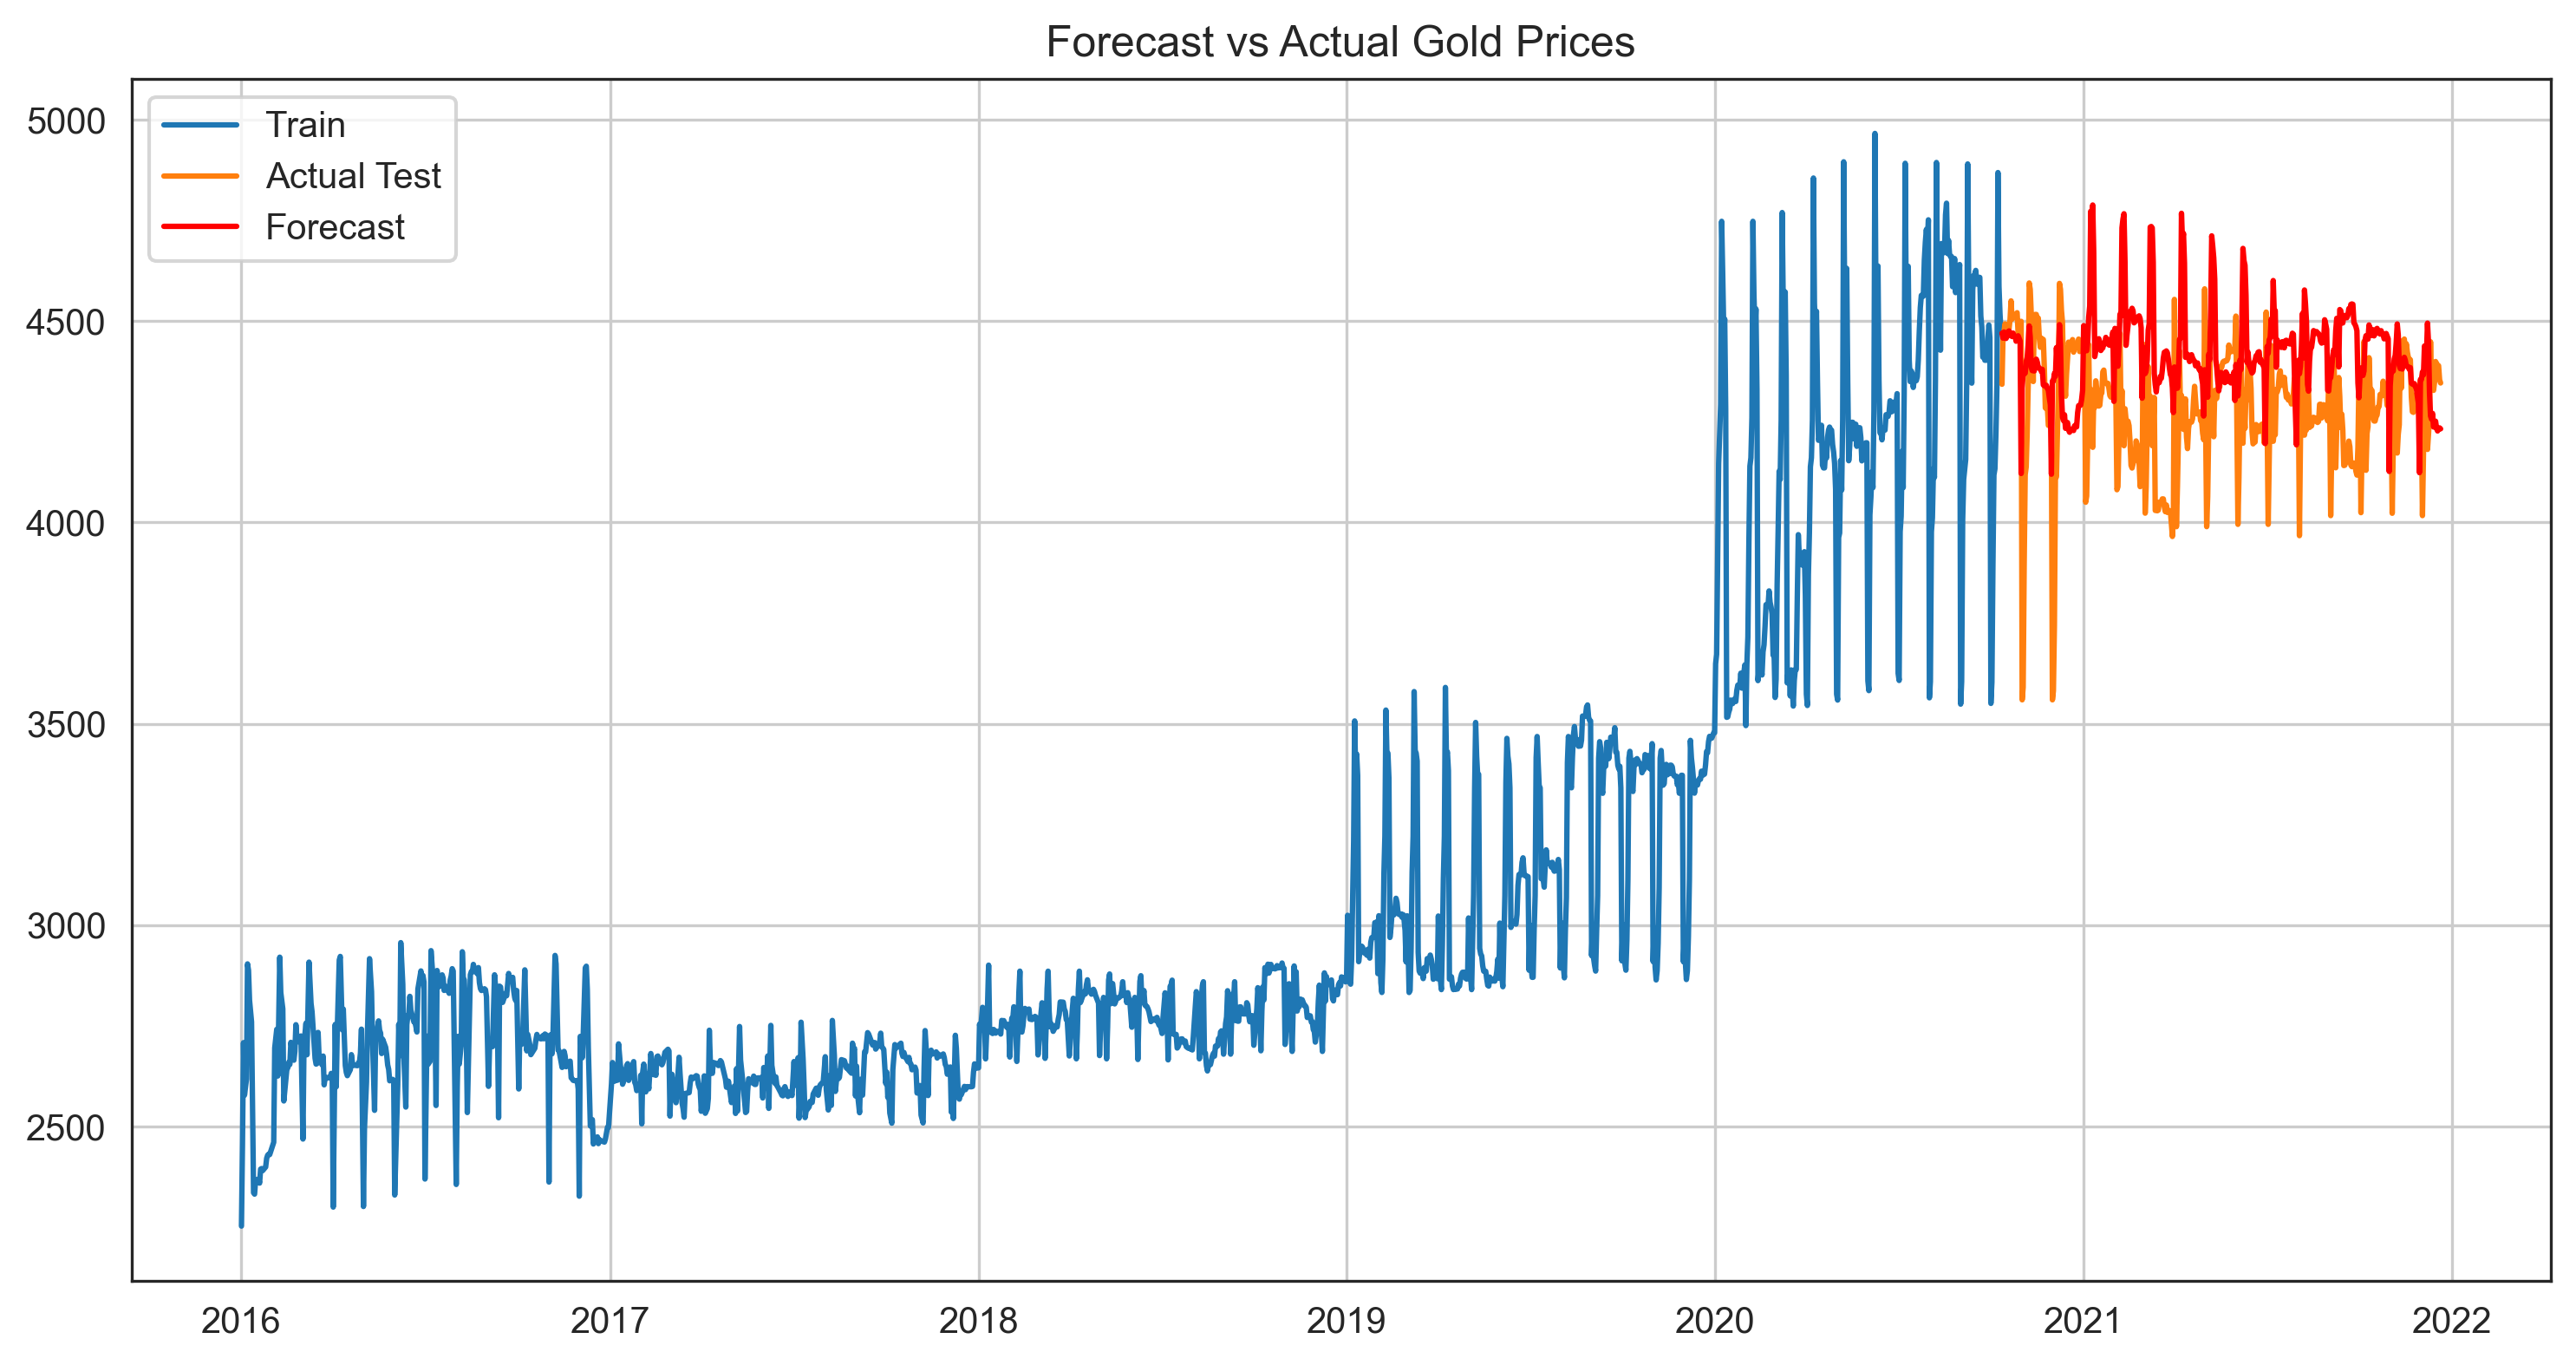

In [49]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Actual Test')
plt.plot(test.index, forecast_4, label='Forecast', color='red')
plt.title("Forecast vs Actual Gold Prices")
plt.legend()
plt.grid()
plt.show()

In [50]:
result_TESM3 = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], forecast_4, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], forecast_4)]},
                           index=[' Holt-Winters Exponential Smoothing(trend Multi & seasonal Multi)'])
result_TESM3

RMSE Gold_price  \
Holt-Winters Exponential Smoothing(trend Multi ...       229.798261   

                                                    MAE Gold_price  
Holt-Winters Exponential Smoothing(trend Multi ...      183.594002

### Holt-Winters Exponential Smoothing Model:( trend='Multiplicative & seasonal='Additive')

In [51]:
model_5 = ExponentialSmoothing(train['price'], trend='Mul',seasonal='add',
                              initialization_method='estimated',damped_trend=True,seasonal_periods=365)

In [52]:
# Fitting the model
fitted_model_5 = model_5.fit()

In [53]:
# Forecasting using this model for the duration of the test data
forecast_5 = fitted_model_5.forecast(len(test))
forecast_5

2020-10-12    4470.802817
2020-10-13    4463.346898
2020-10-14    4473.065316
2020-10-15    4467.716961
2020-10-16    4463.155466
                 ...     
2021-12-17    4328.632596
2021-12-18    4324.788994
2021-12-19    4329.776168
2021-12-20    4329.744423
2021-12-21    4328.268760
Freq: D, Length: 436, dtype: float64

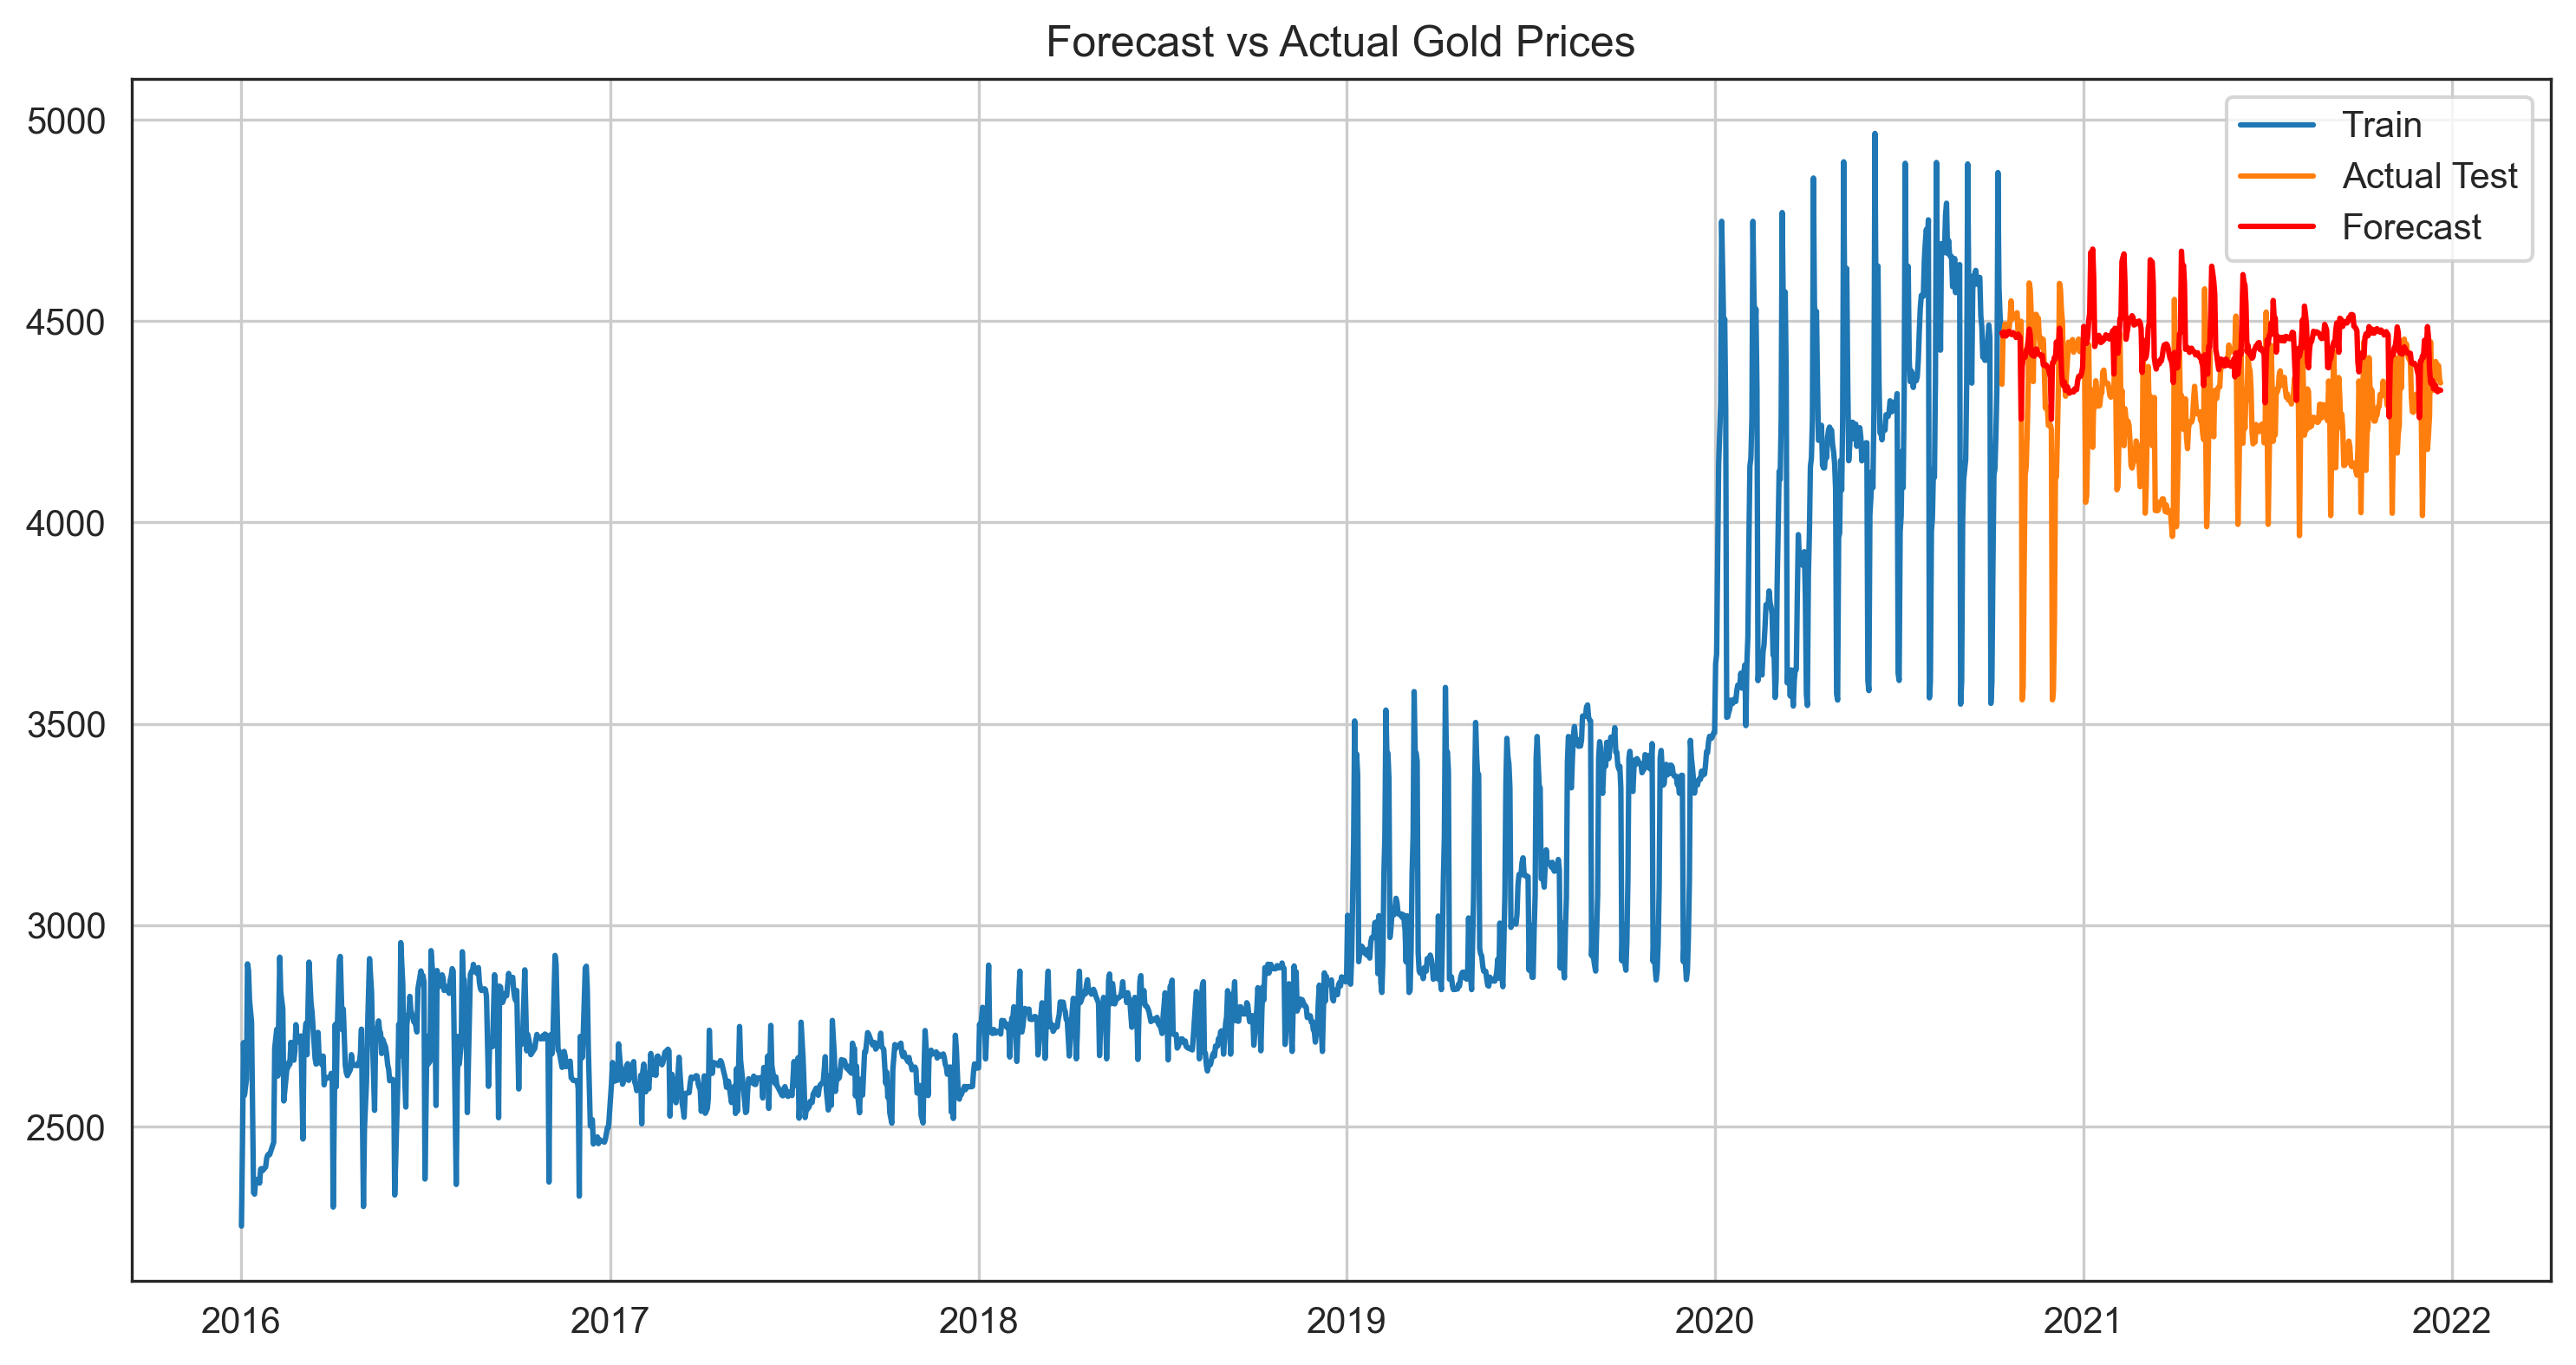

In [54]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Actual Test')
plt.plot(test.index, forecast_5, label='Forecast', color='red')
plt.title("Forecast vs Actual Gold Prices")
plt.legend()
plt.grid()
plt.show()

In [55]:
result_TESM4 = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], forecast_5, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], forecast_5)]},
                           index=[' Holt-Winters Exponential Smoothing(trend Multi & seasonal Add)'])
result_TESM4

RMSE Gold_price  \
Holt-Winters Exponential Smoothing(trend Multi ...       228.043095   

                                                    MAE Gold_price  
Holt-Winters Exponential Smoothing(trend Multi ...      181.138118

# ============================================================

### ARIMA Model

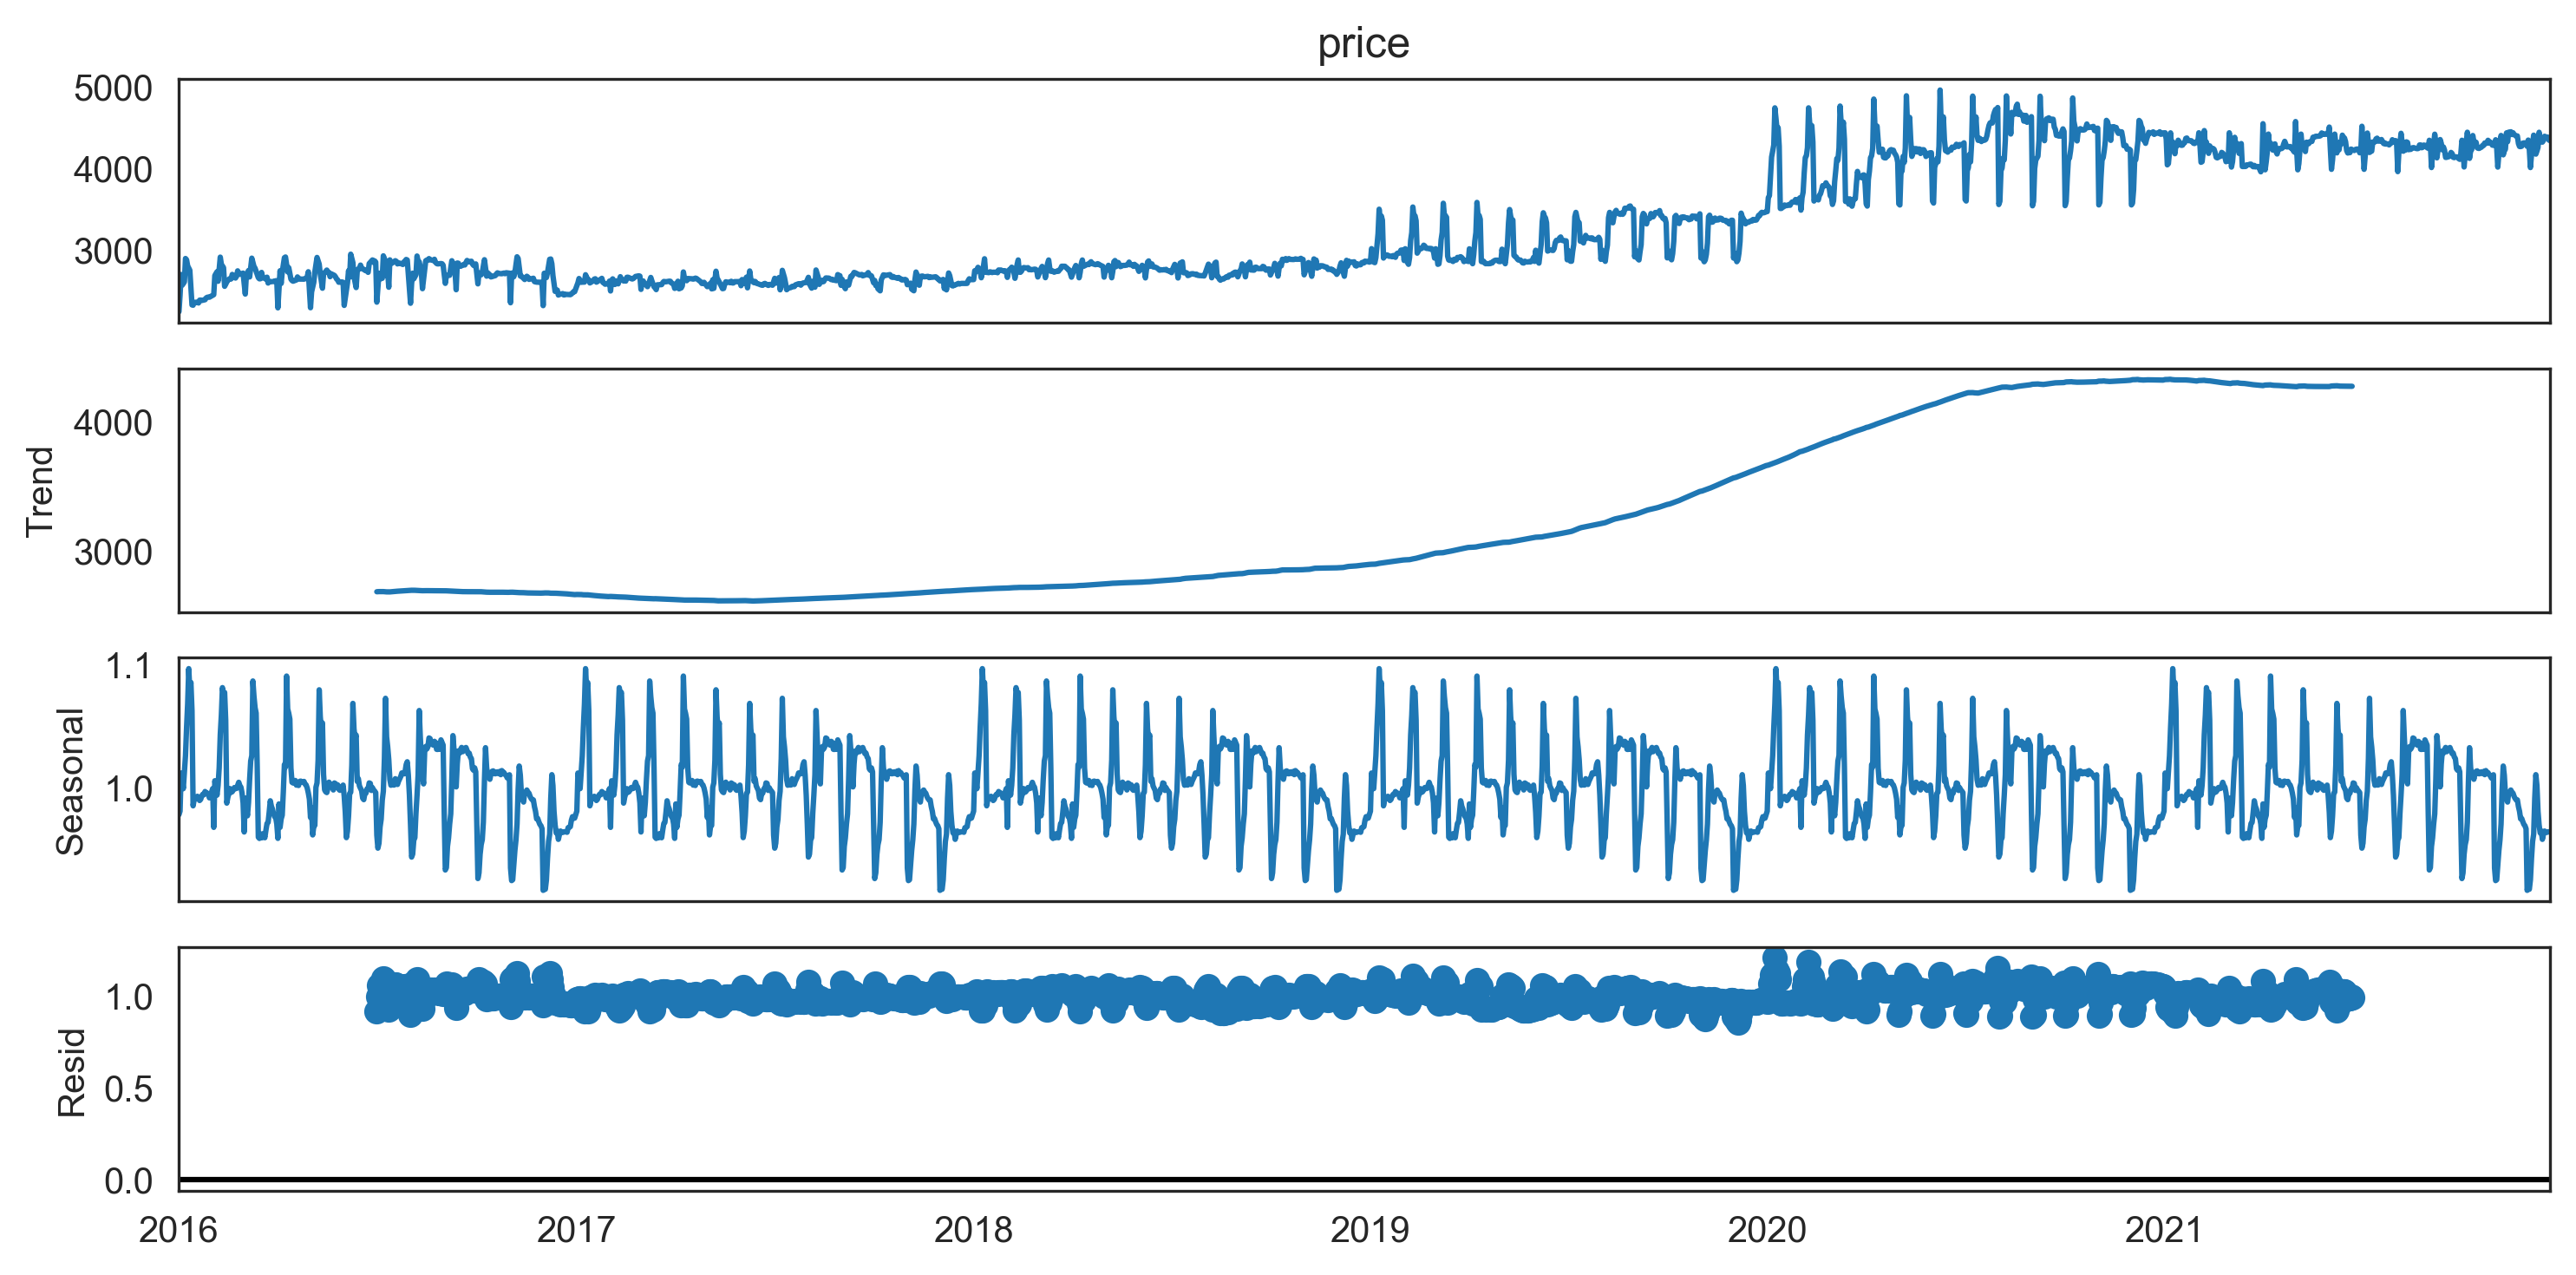

In [56]:
result = seasonal_decompose(df['price'], model='multiplicative',period=365)
result.plot()
plt.show()

In [57]:
def stationarity_check(timeseries):
    result=adfuller(timeseries,autolag="AIC")
    print("ADF statistics:",result[0])
    print("p-value:", result[1])

In [58]:
stationarity_check(df['price'])

ADF statistics: -0.3099036570504783
p-value: 0.9240899189079186


#### from the above result we can say that data is not stationary

##### to make data stationary we will transform data to make it stationary by diffrenciation

In [59]:

df_log=df['price']-result.seasonal
df_diff= df_log.diff().dropna()

### to see seasonality remain or not in data

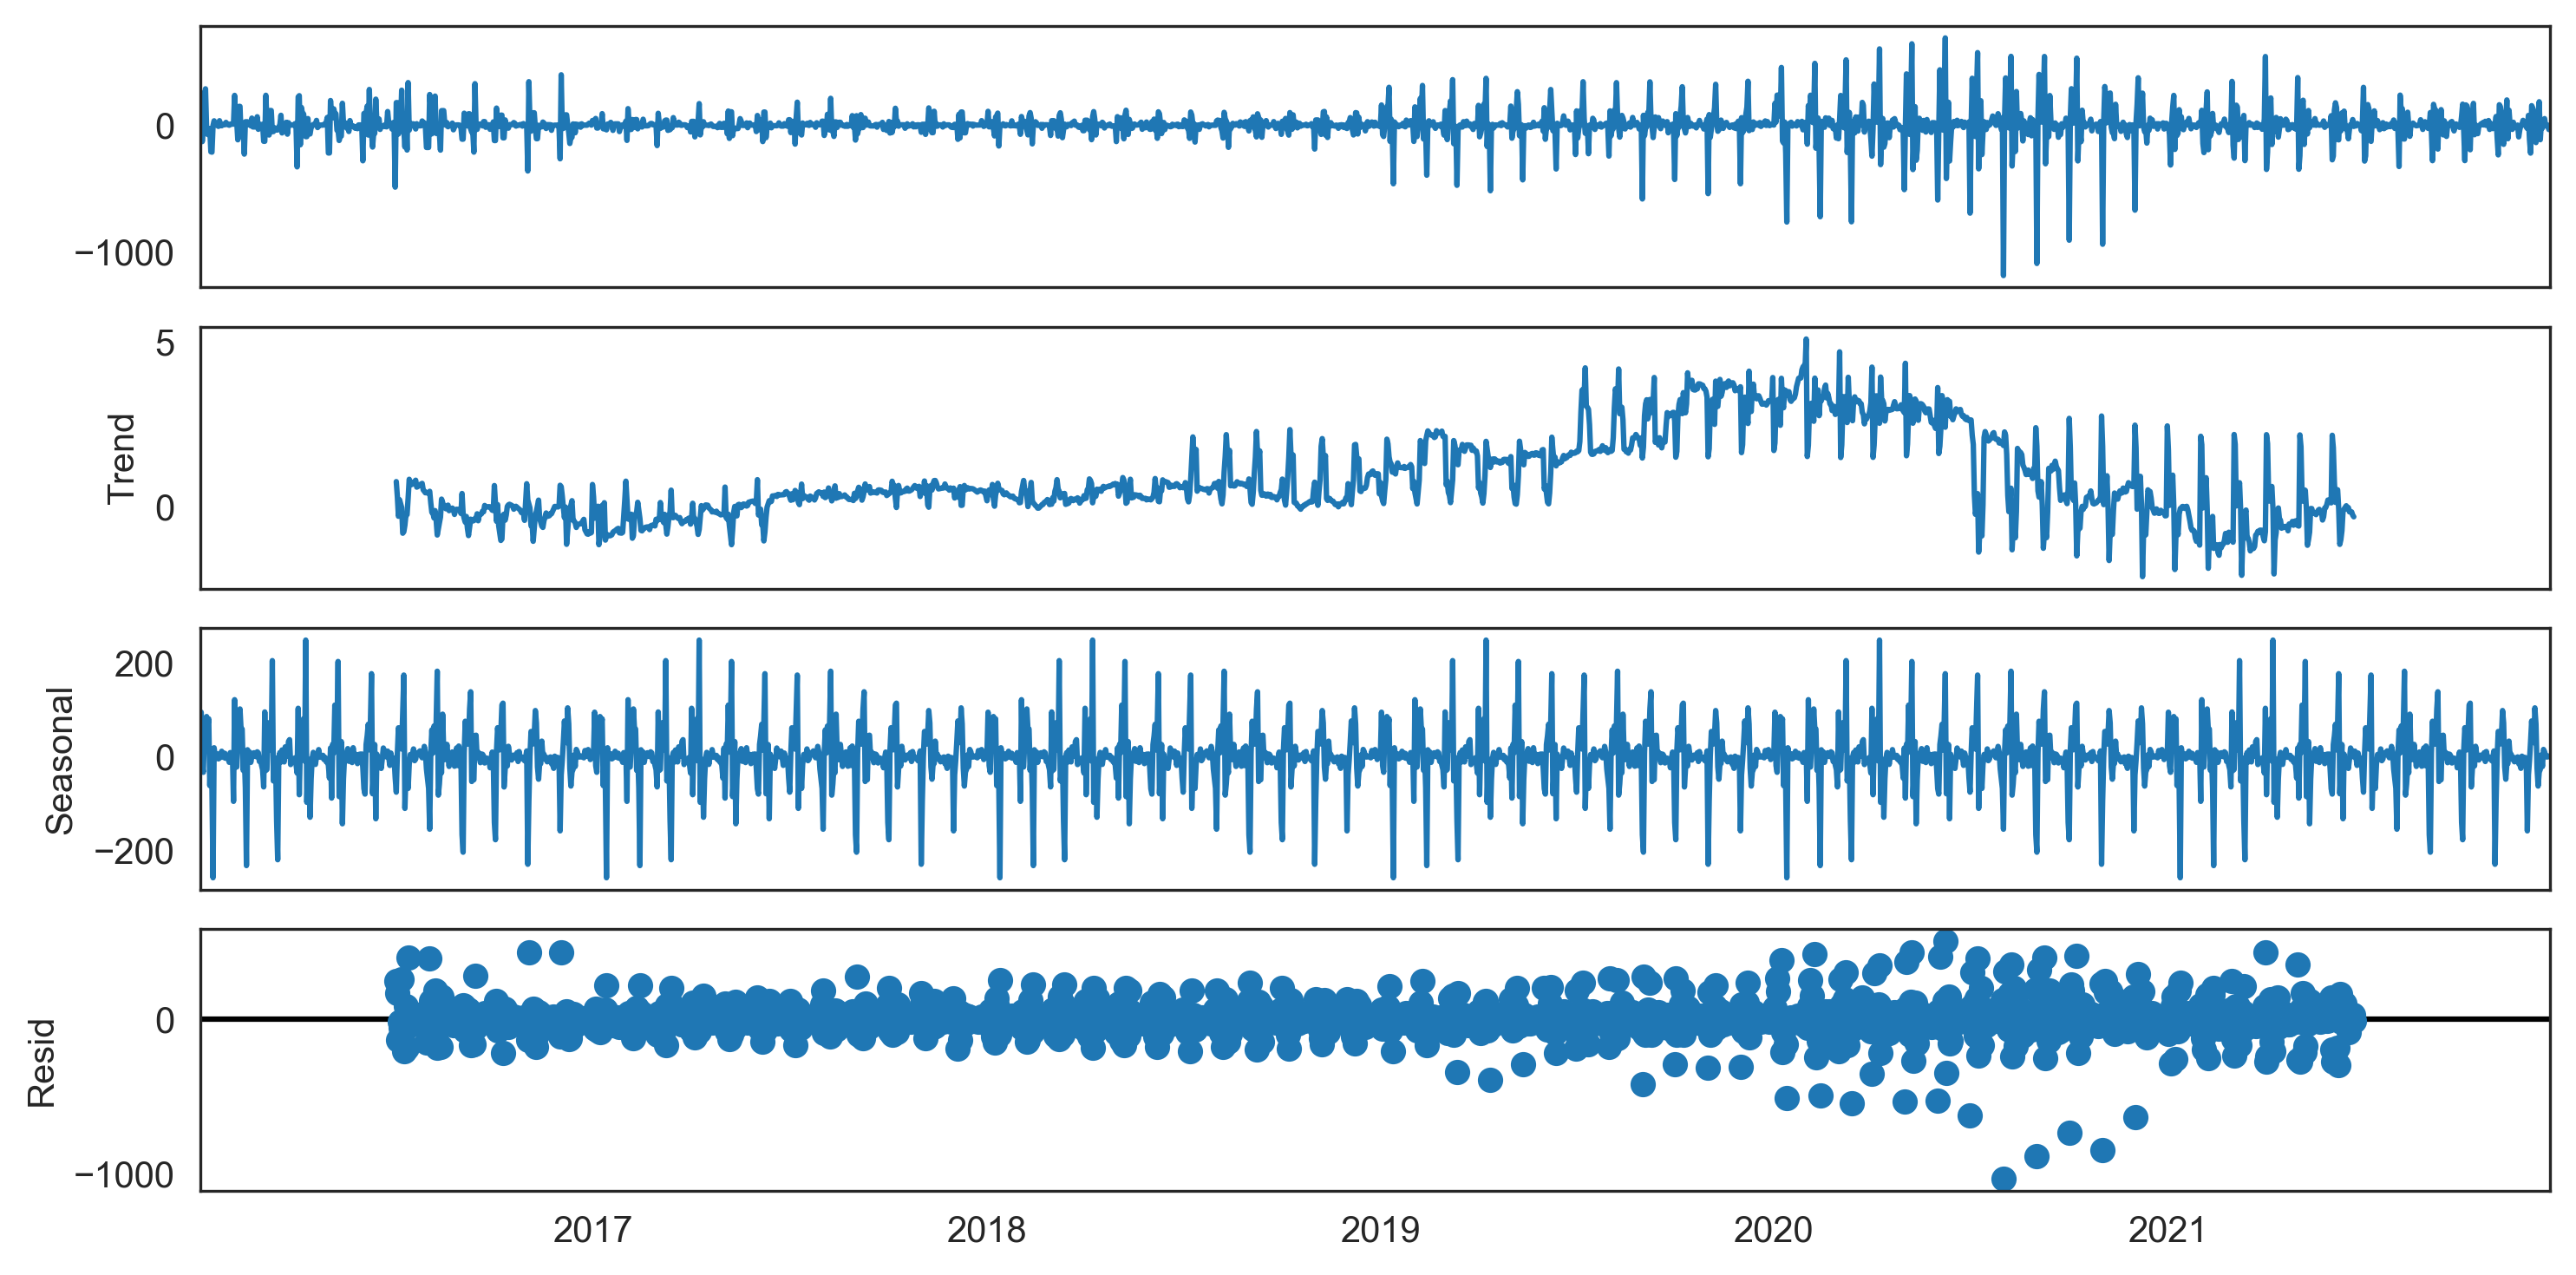

In [60]:
result1 = seasonal_decompose(df_diff, model='additive',period=365)
result1.plot()
plt.show()

In [61]:
df_diff.name='price'

In [62]:
stationarity_check(df_diff)

ADF statistics: -21.66355655311388
p-value: 0.0


#### from the above data we can say that data is stationary becaouse p-value is less than 0.05

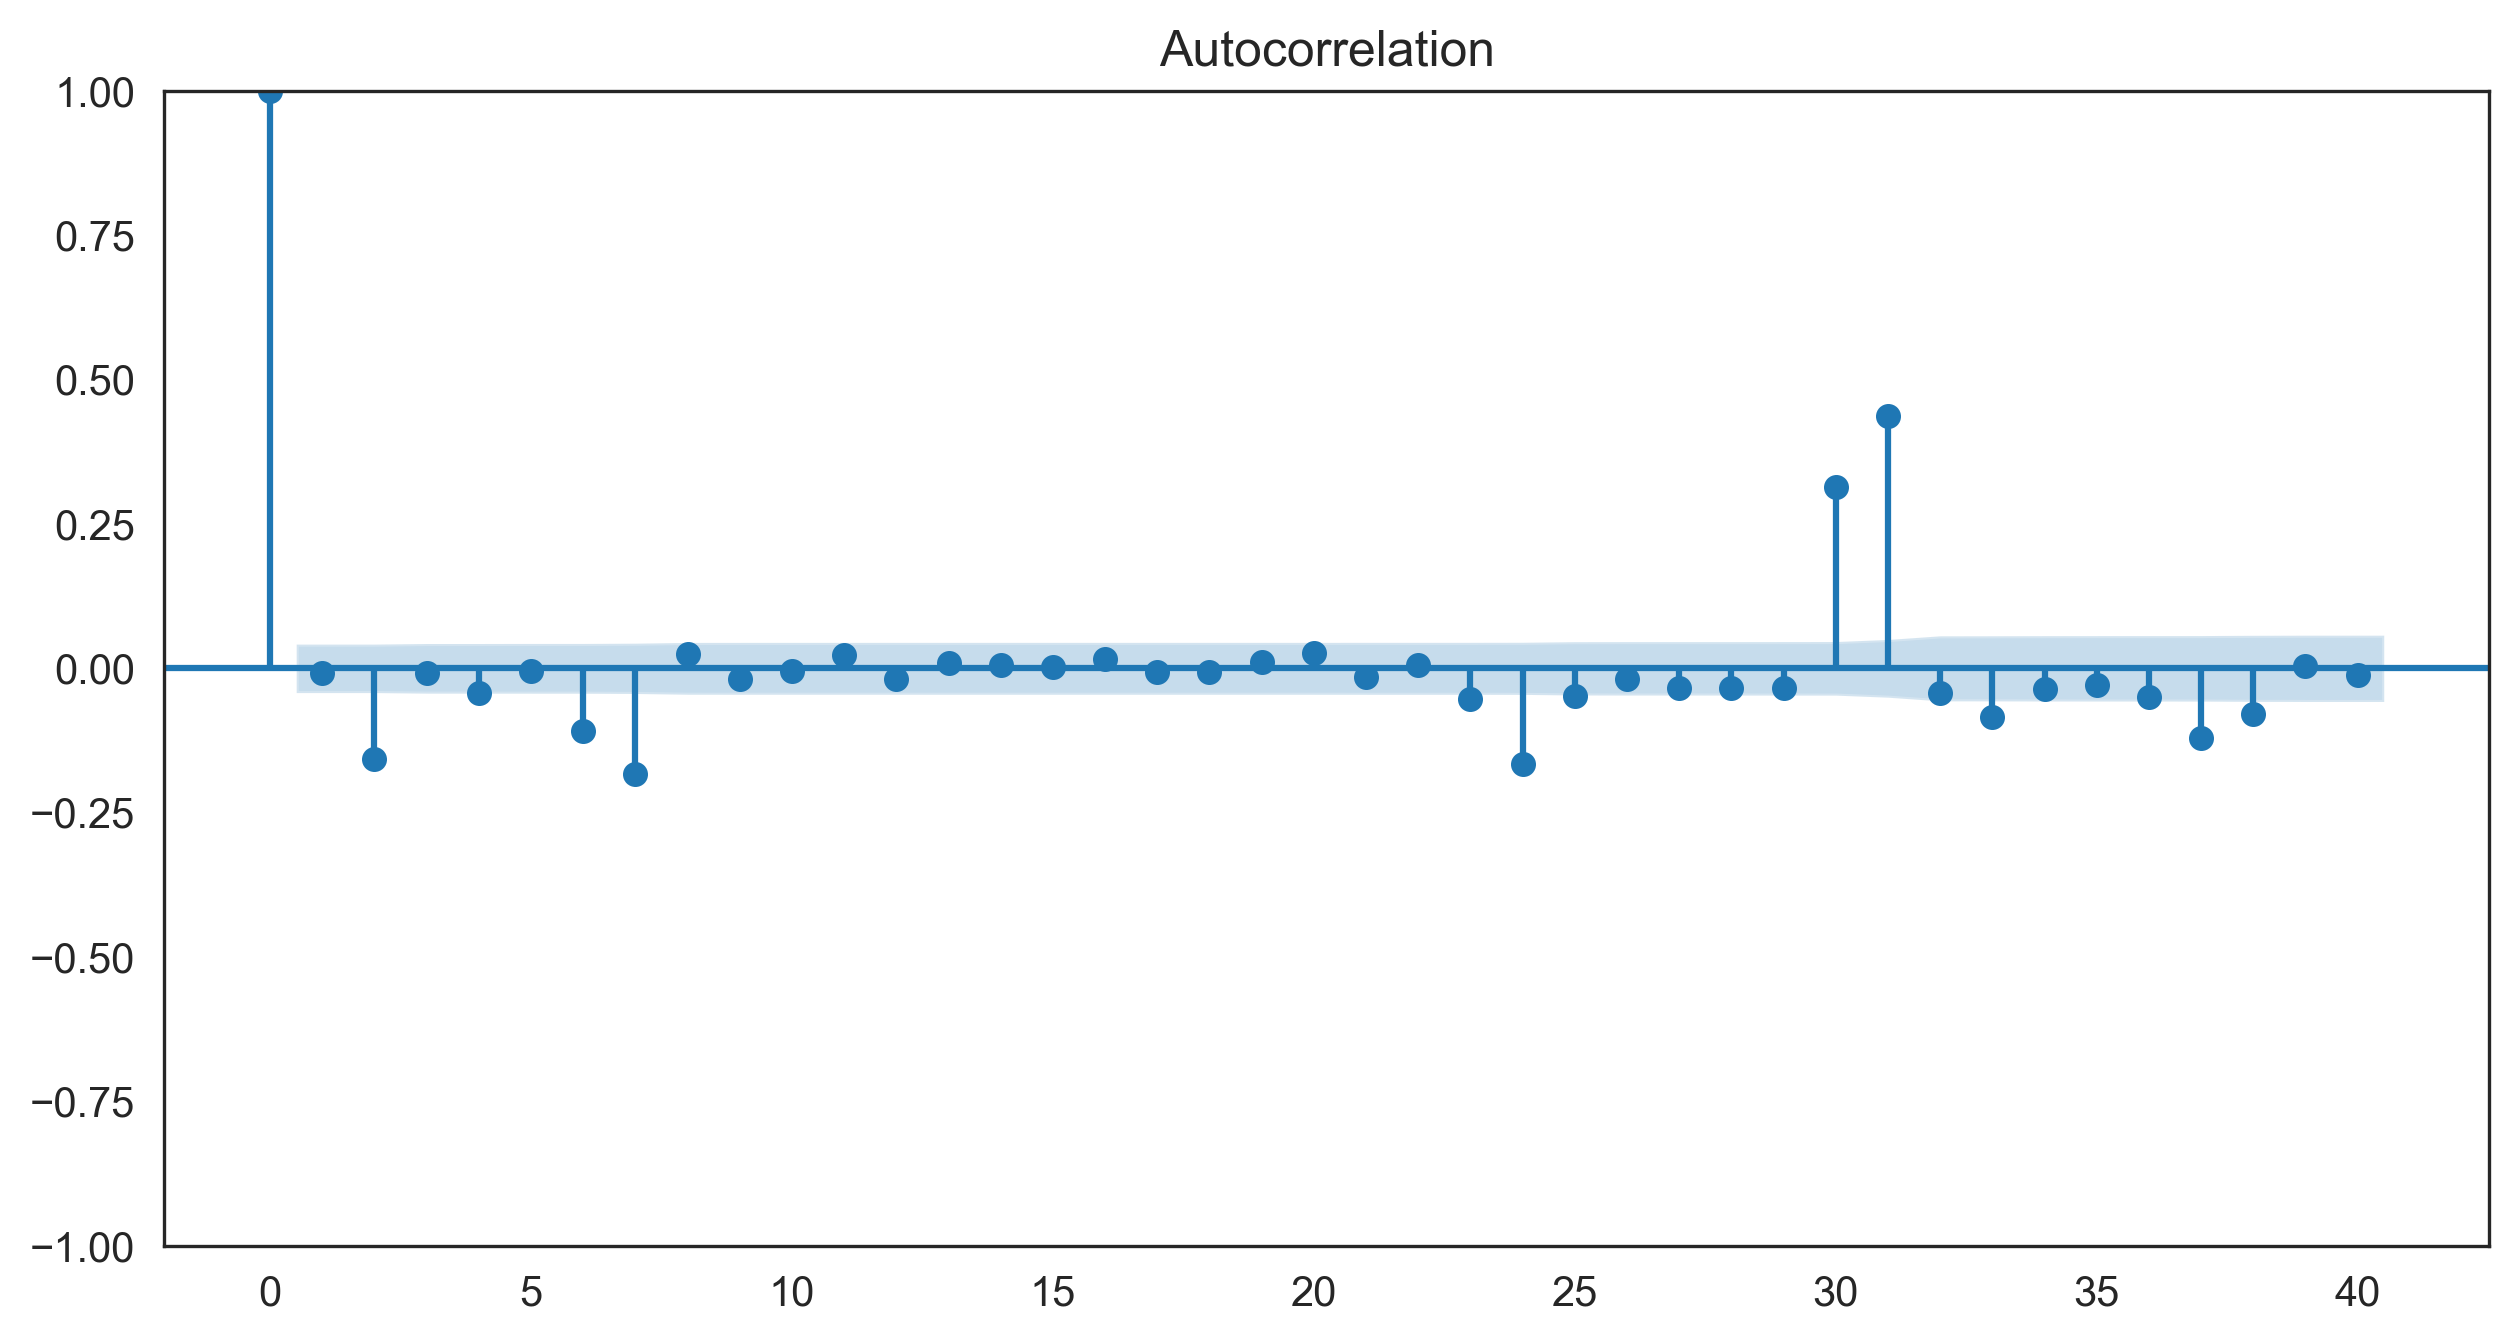

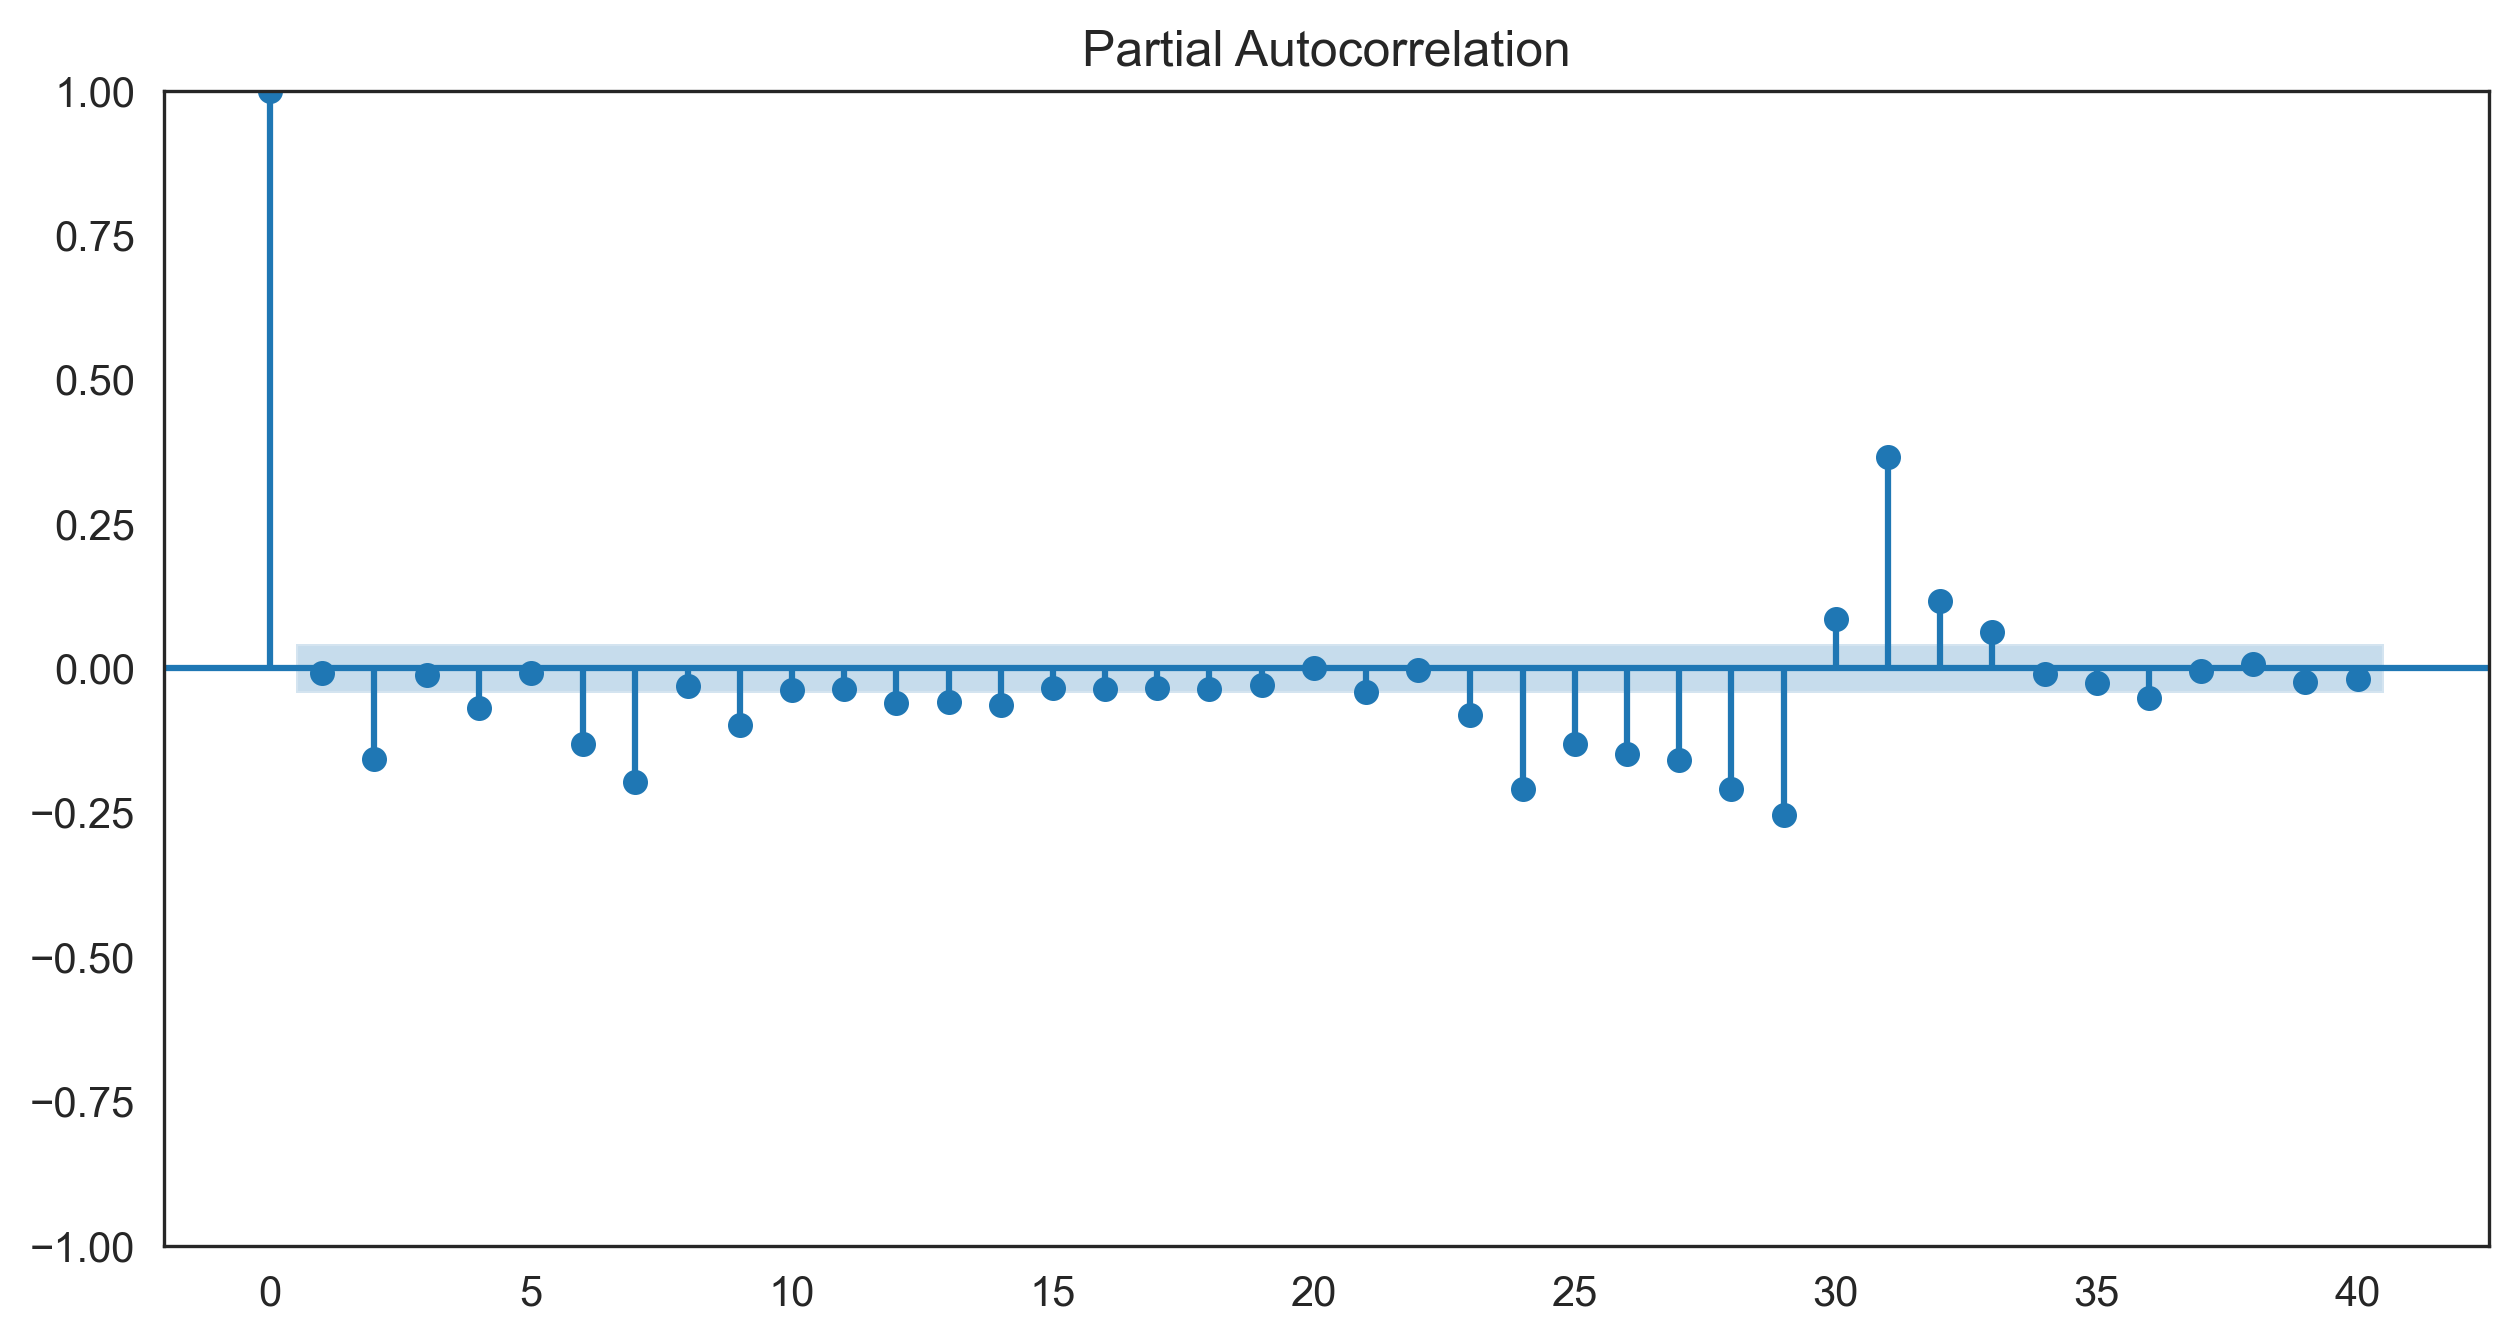

In [63]:
plot_acf(df_diff,lags=40)
plot_pacf(df_diff,lags=40)
plt.show()

In [64]:
model= ARIMA(train['price'],order=(31,2,31))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1746
Model:               ARIMA(31, 2, 31)   Log Likelihood              -10203.035
Date:                Fri, 23 May 2025   AIC                          20532.071
Time:                        11:14:39   BIC                          20876.299
Sample:                    01-01-2016   HQIC                         20659.341
                         - 10-11-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3213      0.259     -5.107      0.000      -1.828      -0.814
ar.L2         -1.5043      0.217     -6.920      0.000      -1.930      -1.078
ar.L3         -1.4789      0.284     -5.206      0.0

In [65]:
pred=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)

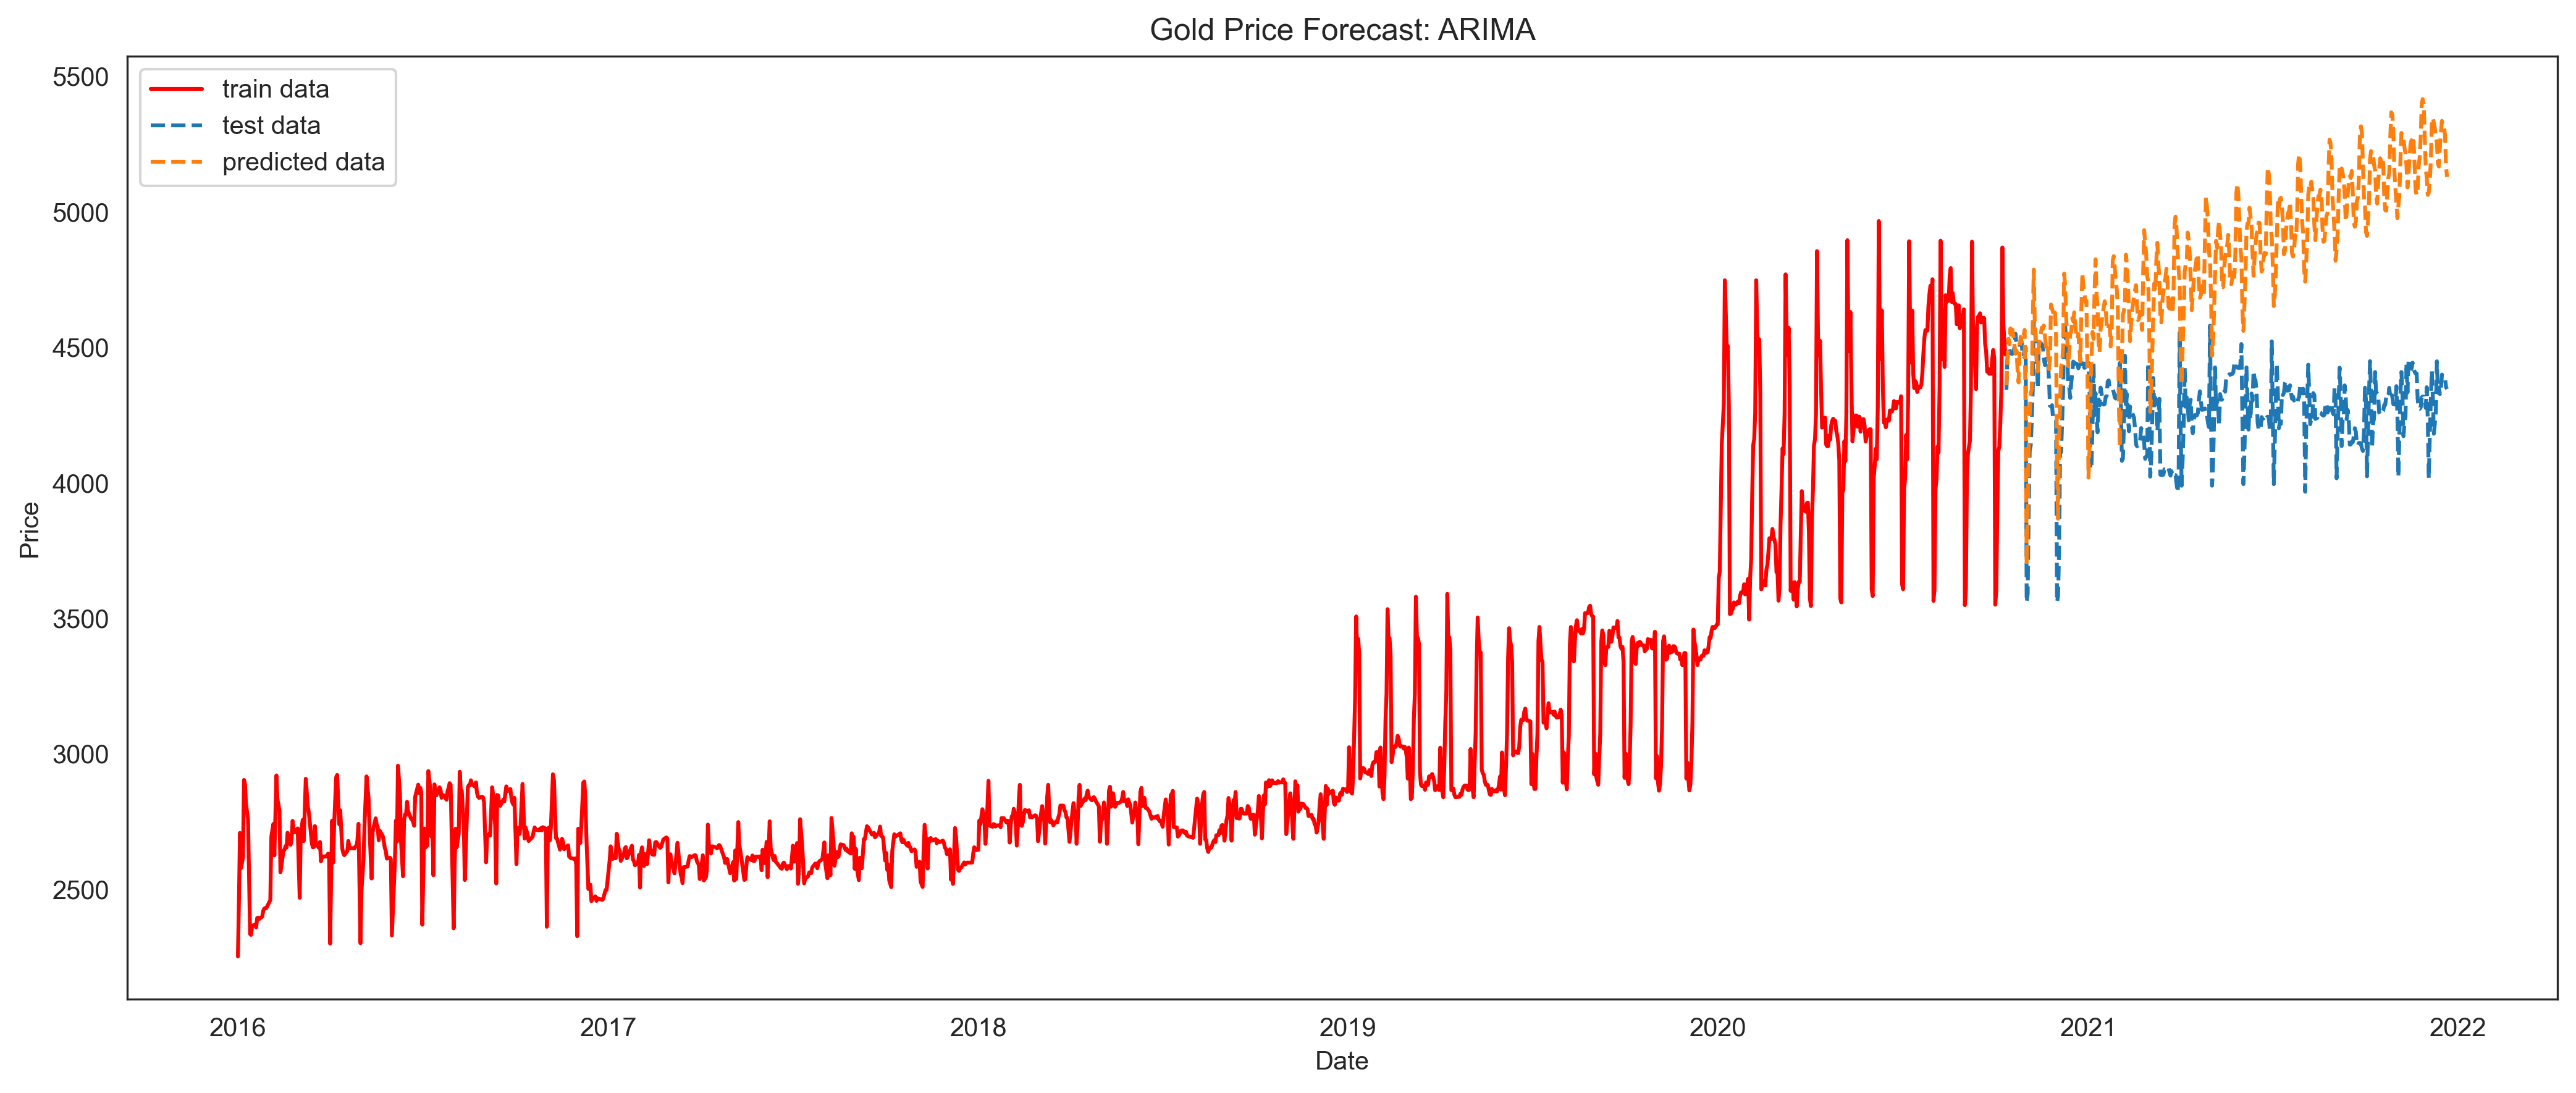

In [66]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['price'], label='train data', color='red')

plt.plot( test.index,test['price'], label='test data', linestyle='--')
plt.plot( test.index,pred, label='predicted data', linestyle='--')
plt.title("Gold Price Forecast: ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
# Calculate RMSE
result_ARIMA = pd.DataFrame({'RMSE Gold_price': [mean_squared_error(test['price'], pred, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(test['price'], pred)]},
                           index=[' ARIMA'])
print("RMSE:", result_ARIMA)

RMSE:        RMSE Gold_price  MAE Gold_price
ARIMA       626.453767      554.718848


## XGBRegressor Model

In [68]:
import joblib

In [69]:
prices = df["price"].values
n_lags = 30
X, y = [], []

In [70]:
for i in range(n_lags, len(prices)):
    X.append(prices[i - n_lags:i])
    y.append(prices[i])

In [71]:
X = np.array(X)                # shape: (samples, 30)
y = np.array(y)  

In [72]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [73]:
param_grid = {
    'n_estimators': [50, 100,500],
    'learning_rate': [0.05, 0.1,0.15],
    'max_depth': [3, 5,4]
}

In [74]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 4],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [75]:
best_model = grid_search.best_estimator_

In [76]:
# Predict and calculate RMSE
y_pred = best_model.predict(X_test)
rmse_XGB =pd.DataFrame({'RMSE Gold_price': [mean_squared_error(y_test, y_pred, squared=False)],
                            'MAE Gold_price':[ mean_absolute_error(y_test, y_pred)]},
                           index=[' XGBRegressor'])
print("RMSE:", rmse_XGB)

RMSE:               RMSE Gold_price  MAE Gold_price
XGBRegressor       135.063086      103.281673


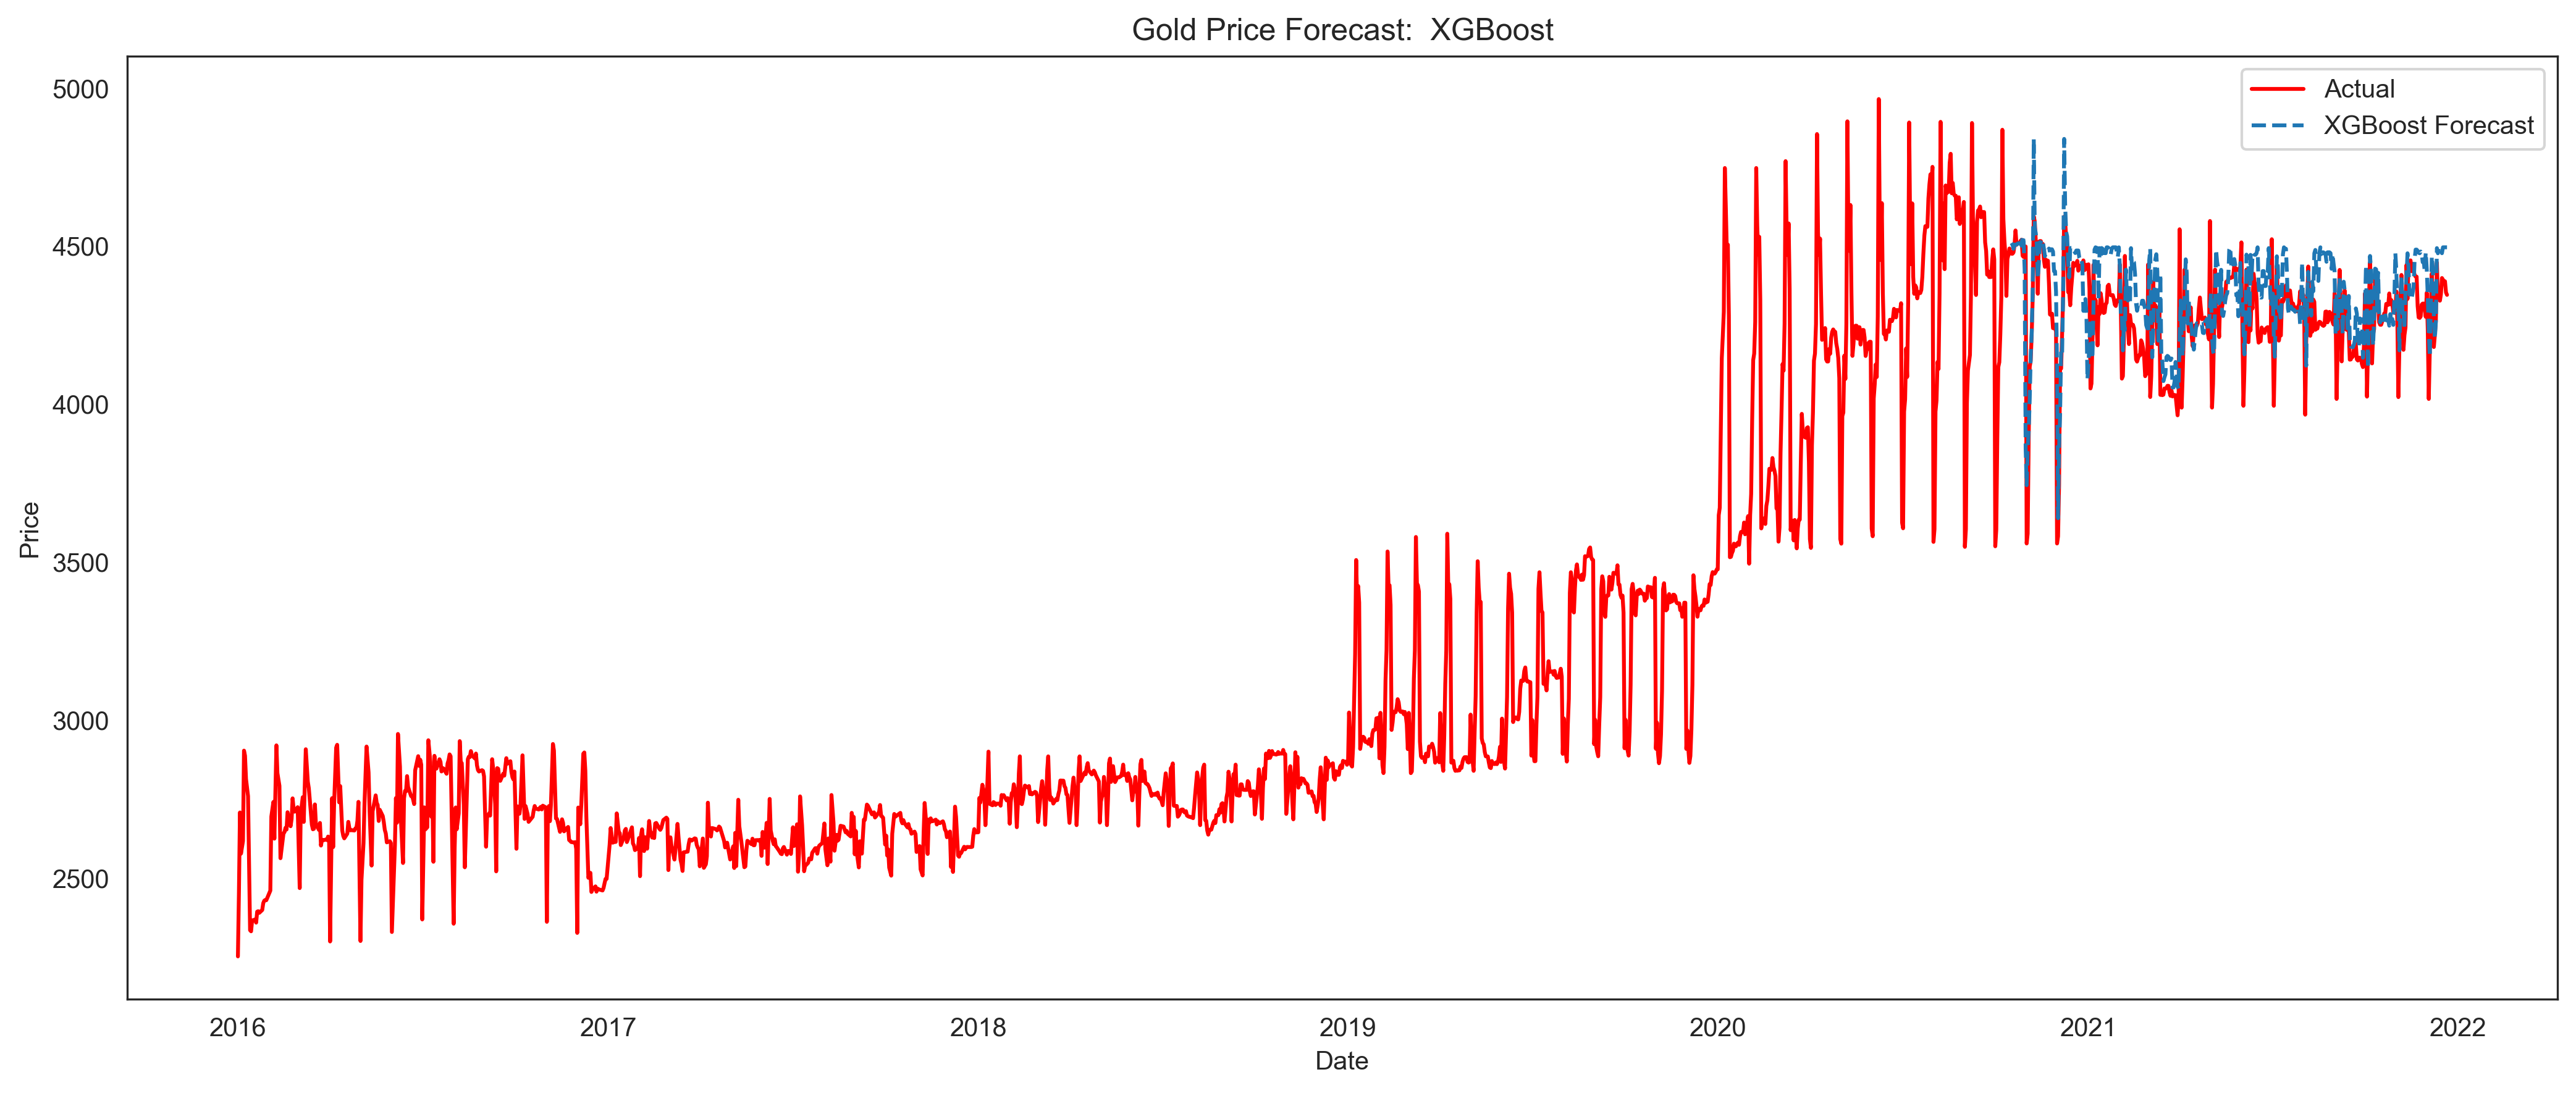

In [79]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['price'], label='Actual', color='red')

plt.plot( df[-431:].index,y_pred, label='XGBoost Forecast', linestyle='--')
plt.title("Gold Price Forecast:  XGBoost")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

## Model Evaluation:

In [80]:
results = pd.concat([result_DESM,result_TESM1, result_TESM2,result_TESM3,result_TESM4,result_ARIMA,rmse_XGB], axis=0)
results

RMSE Gold_price  \
Double Exponential Smoothing                             740.557856   
Holt-Winters Exponential Smoothing(trend add & ...       319.202298   
 Holt-Winters Exponential Smoothing(trend add &...       227.231556   
 Holt-Winters Exponential Smoothing(trend Multi...       229.798261   
 Holt-Winters Exponential Smoothing(trend Multi...       228.043095   
 ARIMA                                                   626.453767   
 XGBRegressor                                            135.063086   

                                                    MAE Gold_price  
Double Exponential Smoothing                            668.042904  
Holt-Winters Exponential Smoothing(trend add & ...      271.150599  
 Holt-Winters Exponential Smoothing(trend add &...      181.297231  
 Holt-Winters Exponential Smoothing(trend Multi...      183.594002  
 Holt-Winters Exponential Smoothing(trend Multi...      181.138118  
 ARIMA                                                  554.718848  
 XGBRegressor                                           103.281673

### FROM above table we can clearly say that XGBRegressor has less Root Mean Squared Error, so we choose XGBRegressor as our ideal model

In [ ]:
# Save model and last input
joblib.dump(best_model, "xgb_model.pkl")
np.save("last_input.npy", X[-1])

In [83]:
joblib.dump(fitted_model_3 ,"hw_model.pkl")

['hw_model.pkl']